# Main code for LWB used to make figures

Make sure to run :

- lwb_weighting and
- lwb_weighting_pairwise 

before running this notebook.

In [21]:
# Baseline weight type
weight_type = "_wtot"

In [22]:
import matplotlib.pyplot as plt
from   matplotlib.pyplot import *
import sys
import pylab as pl
import numpy as np
from   copy import copy
import pandas
from astropy.io import fits
from astropy.table import Table, Column
import os.path                                                                                                                                                                       
from numpy import genfromtxt
from math import *
from astropy.coordinates import SkyCoord
import pandas as pd  
import scipy.stats
from scipy import stats

from scipy import optimize

import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


In [23]:
# Wtot files are used as the baseline

# Amplitude files are in this order
# row 1: small R, row2: large R, row3: all R

# Amplitude arrays
amparray_wtot=[]
amparray_wtot.append("LOWZ_0.15_0.31_amplitudes_wtot.txt")
amparray_wtot.append("LOWZ_0.31_0.43_amplitudes_wtot.txt")
amparray_wtot.append("CMASS_0.43_0.54_amplitudes_wtot.txt")
amparray_wtot.append("CMASS_0.54_0.7_amplitudes_wtot.txt")

amparray_errs_wtot=[]
amparray_errs_wtot.append("LOWZ_0.15_0.31_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("LOWZ_0.31_0.43_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("CMASS_0.43_0.54_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("CMASS_0.54_0.7_amplitudes_errs_wtot.txt")

amparray_now=[]
amparray_now.append("LOWZ_0.15_0.31_amplitudes_now.txt")
amparray_now.append("LOWZ_0.31_0.43_amplitudes_now.txt")
amparray_now.append("CMASS_0.43_0.54_amplitudes_now.txt")
amparray_now.append("CMASS_0.54_0.7_amplitudes_now.txt")

amparray_errs_now=[]
amparray_errs_now.append("LOWZ_0.15_0.31_amplitudes_errs_now.txt")
amparray_errs_now.append("LOWZ_0.31_0.43_amplitudes_errs_now.txt")
amparray_errs_now.append("CMASS_0.43_0.54_amplitudes_errs_now.txt")
amparray_errs_now.append("CMASS_0.54_0.7_amplitudes_errs_now.txt")

# Internal Nstar test with HSC
amparray_hscnstar=[]
amparray_hscnstar.append("HSC_CMASS_0.54_0.70_nstartests_amplitudes.txt")

amparray_errs_hscnstar=[]
amparray_errs_hscnstar.append("HSC_CMASS_0.54_0.70_nstartests_amplitudes_errs.txt")

# Pairwise Amplitude arrays
pamparraykids=[]
pamparraykids.append("LOWZ_0.15_0.31_KIDS_SDSSref_amplitudes_wtot.txt")
pamparraykids.append("LOWZ_0.31_0.43_KIDS_SDSSref_amplitudes_wtot.txt")
pamparraykids.append("CMASS_0.43_0.54_KIDS_HSCref_amplitudes_wtot.txt")
pamparraykids.append("CMASS_0.54_0.7_KIDS_HSCref_amplitudes_wtot.txt")

pamparray_errs_kids=[]
pamparray_errs_kids.append("LOWZ_0.15_0.31_KIDS_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_kids.append("LOWZ_0.31_0.43_KIDS_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_kids.append("CMASS_0.43_0.54_KIDS_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_kids.append("CMASS_0.54_0.7_KIDS_HSCref_amplitudes_errs_wtot.txt")

pamparraydes=[]
pamparraydes.append("LOWZ_0.15_0.31_DES_SDSSref_amplitudes_wtot.txt")
pamparraydes.append("LOWZ_0.31_0.43_DES_SDSSref_amplitudes_wtot.txt")
pamparraydes.append("CMASS_0.43_0.54_DES_HSCref_amplitudes_wtot.txt")
pamparraydes.append("CMASS_0.54_0.7_DES_HSCref_amplitudes_wtot.txt")

pamparray_errs_des=[]
pamparray_errs_des.append("LOWZ_0.15_0.31_DES_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_des.append("LOWZ_0.31_0.43_DES_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_des.append("CMASS_0.43_0.54_DES_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_des.append("CMASS_0.54_0.7_DES_HSCref_amplitudes_errs_wtot.txt")

pamparraycfht=[]
pamparraycfht.append("LOWZ_0.15_0.31_CFHT_SDSSref_amplitudes_wtot.txt")
pamparraycfht.append("LOWZ_0.31_0.43_CFHT_SDSSref_amplitudes_wtot.txt")
pamparraycfht.append("CMASS_0.43_0.54_CFHT_HSCref_amplitudes_wtot.txt")
pamparraycfht.append("CMASS_0.54_0.7_CFHT_HSCref_amplitudes_wtot.txt")

pamparray_errs_cfht=[]
pamparray_errs_cfht.append("LOWZ_0.15_0.31_CFHT_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cfht.append("LOWZ_0.31_0.43_CFHT_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cfht.append("CMASS_0.43_0.54_CFHT_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_cfht.append("CMASS_0.54_0.7_CFHT_HSCref_amplitudes_errs_wtot.txt")

pamparraycs82=[]
pamparraycs82.append("LOWZ_0.15_0.31_CS82_SDSSref_amplitudes_wtot.txt")
pamparraycs82.append("LOWZ_0.31_0.43_CS82_SDSSref_amplitudes_wtot.txt")
pamparraycs82.append("CMASS_0.43_0.54_CS82_HSCref_amplitudes_wtot.txt")
pamparraycs82.append("CMASS_0.54_0.7_CS82_HSCref_amplitudes_wtot.txt")

pamparray_errs_cs82=[]
pamparray_errs_cs82.append("LOWZ_0.15_0.31_CS82_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cs82.append("LOWZ_0.31_0.43_CS82_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cs82.append("CMASS_0.43_0.54_CS82_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_cs82.append("CMASS_0.54_0.7_CS82_HSCref_amplitudes_errs_wtot.txt")

pamparrayhsc=[]
pamparrayhsc.append("LOWZ_0.15_0.31_HSC_SDSSref_amplitudes_wtot.txt")
pamparrayhsc.append("LOWZ_0.31_0.43_HSC_SDSSref_amplitudes_wtot.txt")

pamparray_errs_hsc=[]
pamparray_errs_hsc.append("LOWZ_0.15_0.31_HSC_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_hsc.append("LOWZ_0.31_0.43_HSC_SDSSref_amplitudes_errs_wtot.txt")

# Useful Routines

In [24]:
# Provide data and errors, and sigma_sys, return reduced chi2-1 with weighed mean
# Data and errors passed as globals
def computechi2minus1(sigs):
    
    global data2
    global errs2
    
    n=len(data2)
    
    # inverse variance mean
    w = np.zeros(n)
    for i in range(0, n):
        w[i]=1.0/(errs2[i]**2)
    
    wmean = np.average(data2, weights=w)
    
    #Compute reduced chi2
    chi2=0.0

    for i in range(0, n):
        chi2+=((data2[i]-wmean)**2)/(errs2[i]**2+sigs**2)
    
    rchi2 = chi2/(n-1)

    # Reduced chi2 -1
    return rchi2-1

In [25]:
# function to fit
def linfunc(x, a, b):
    return a*x + b

# Plots Related to Homogeneity Effects

In [26]:
# read in systematics files
# Order of these files should match ones from amplitudes :
# DES, CFHT, HSC,CS82,KiDS,SDSS 

file="lowzstar_ordered.txt"
Lstar = np.loadtxt(file)

file="lowzsee_ordered.txt"
Lsee = np.loadtxt(file)

file="cmassstar_ordered.txt"
Cstar = np.loadtxt(file)

file="cmasssee_ordered.txt"
Csee = np.loadtxt(file)

# These are the medians in the paper table
# DES, CFHT, HSC,CS82,KiDS,SDSS 
zsource = [0.59,0.7,0.8,0.57,0.67,0.39]   

# DES zL =  0.23, zL = 0.36, zL = 0.49, zL = 0.59.
# CFHTLENs   zL = 0.23, zL = 0.36, zL = 0.49, zL = 0.60.
# HSC : 0.23, zL = 0.36, zL = 0.49, zL = 0.59
# Cs82 : z = 0.227, z = 0.362, z = 0.488,  z = 0.586. 
# Kids: zL =0.23,zL =0.36,zL =0.49,zL =0.58.

# DES, CFHT, HSC,CS82,KiDS,SDSS 
c1zeff = [0.49,0.49,0.49,0.488,0.49]
c2zeff = [0.59,0.60,0.59,0.586, 0.58]

# DES, KIDS, HSC, CFHT, CS82, SDSS
file="BOSSN_overlap.txt"
area_n = np.loadtxt(file)
print("area north",area_n)

file="BOSSS_overlap.txt"
area_s = np.loadtxt(file)
print("\n area south",area_s)

frac_area = area_n/(area_n+area_s)
print("frac area",frac_area)

area north [5.81932117e+00 2.04044252e+02 1.07734486e+02 4.45415760e+01
 0.00000000e+00 6.74996669e+03]

 area south [ 154.12431145    0.           58.22271815   73.43901358  143.99705337
 1608.76855031]
frac area [0.03638358 1.         0.64917029 0.37753309 0.         0.80753445]
area north [5.81932117e+00 2.04044252e+02 1.07734486e+02 4.45415760e+01
 0.00000000e+00 6.74996669e+03]

 area south [ 154.12431145    0.           58.22271815   73.43901358  143.99705337
 1608.76855031]
frac area [0.03638358 1.         0.64917029 0.37753309 0.         0.80753445]


#  Plot source redshift versus Nstar 

[147.81213167  93.2037415  129.35085293 115.04135786 135.23726594
 109.83687811]
[0.59, 0.7, 0.8, 0.57, 0.67, 0.39]
[147.81213167  93.2037415  129.35085293 115.04135786 135.23726594
 109.83687811]
[0.59, 0.7, 0.8, 0.57, 0.67, 0.39]


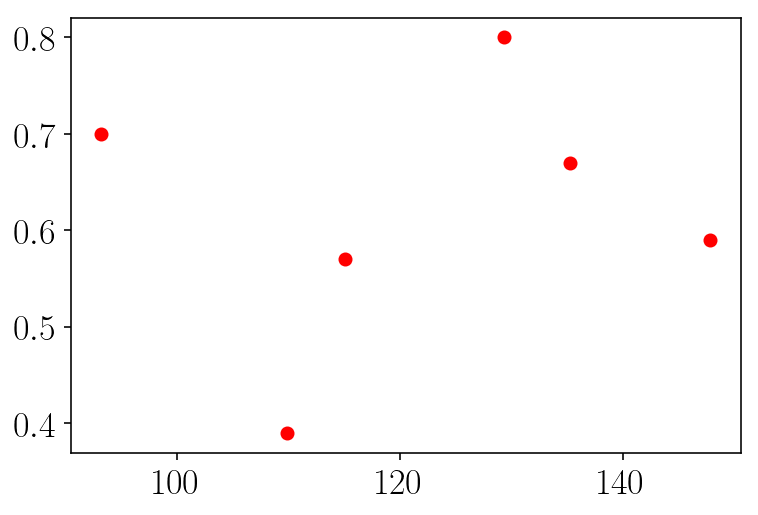

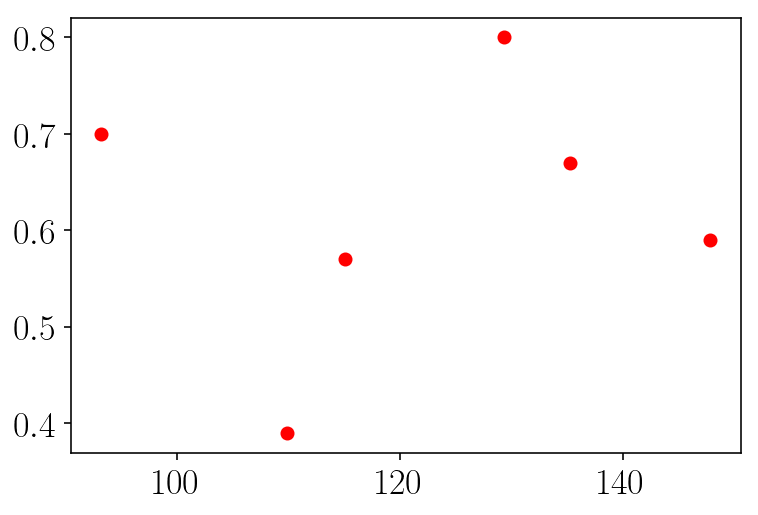

In [27]:
print(Cstar)
print(zsource)

plot(Cstar,zsource,'ro')

# Variations in Nstar

--------
data sample 0 radial range 0
beta -0.0021
betaerr 0.0009
beta sig 2.333333333333333
--------
data sample 0 radial range 1
beta -0.0015
betaerr 0.0015
beta sig 1.0
--------
data sample 0 radial range 2
beta -0.0023
betaerr 0.0008
beta sig 2.875
--------
data sample 1 radial range 0
beta -0.0002
betaerr 0.0012
beta sig 0.16666666666666669
--------
data sample 1 radial range 1
beta -0.0003
betaerr 0.0017
beta sig 0.1764705882352941
--------
data sample 1 radial range 2
beta -0.0005
betaerr 0.001
beta sig 0.5
--------
data sample 2 radial range 0
beta 0.0014
betaerr 0.0012
beta sig 1.1666666666666667
--------
data sample 2 radial range 1
beta -0.0011
betaerr 0.0015
beta sig 0.7333333333333334
--------
data sample 2 radial range 2
beta 0.0006
betaerr 0.0009
beta sig 0.6666666666666666
--------
data sample 0 radial range 0
beta -0.0021
betaerr 0.0009
beta sig 2.333333333333333
--------
data sample 0 radial range 1
beta -0.0015
betaerr 0.0015
beta sig 1.0
--------
data sample 0 radia

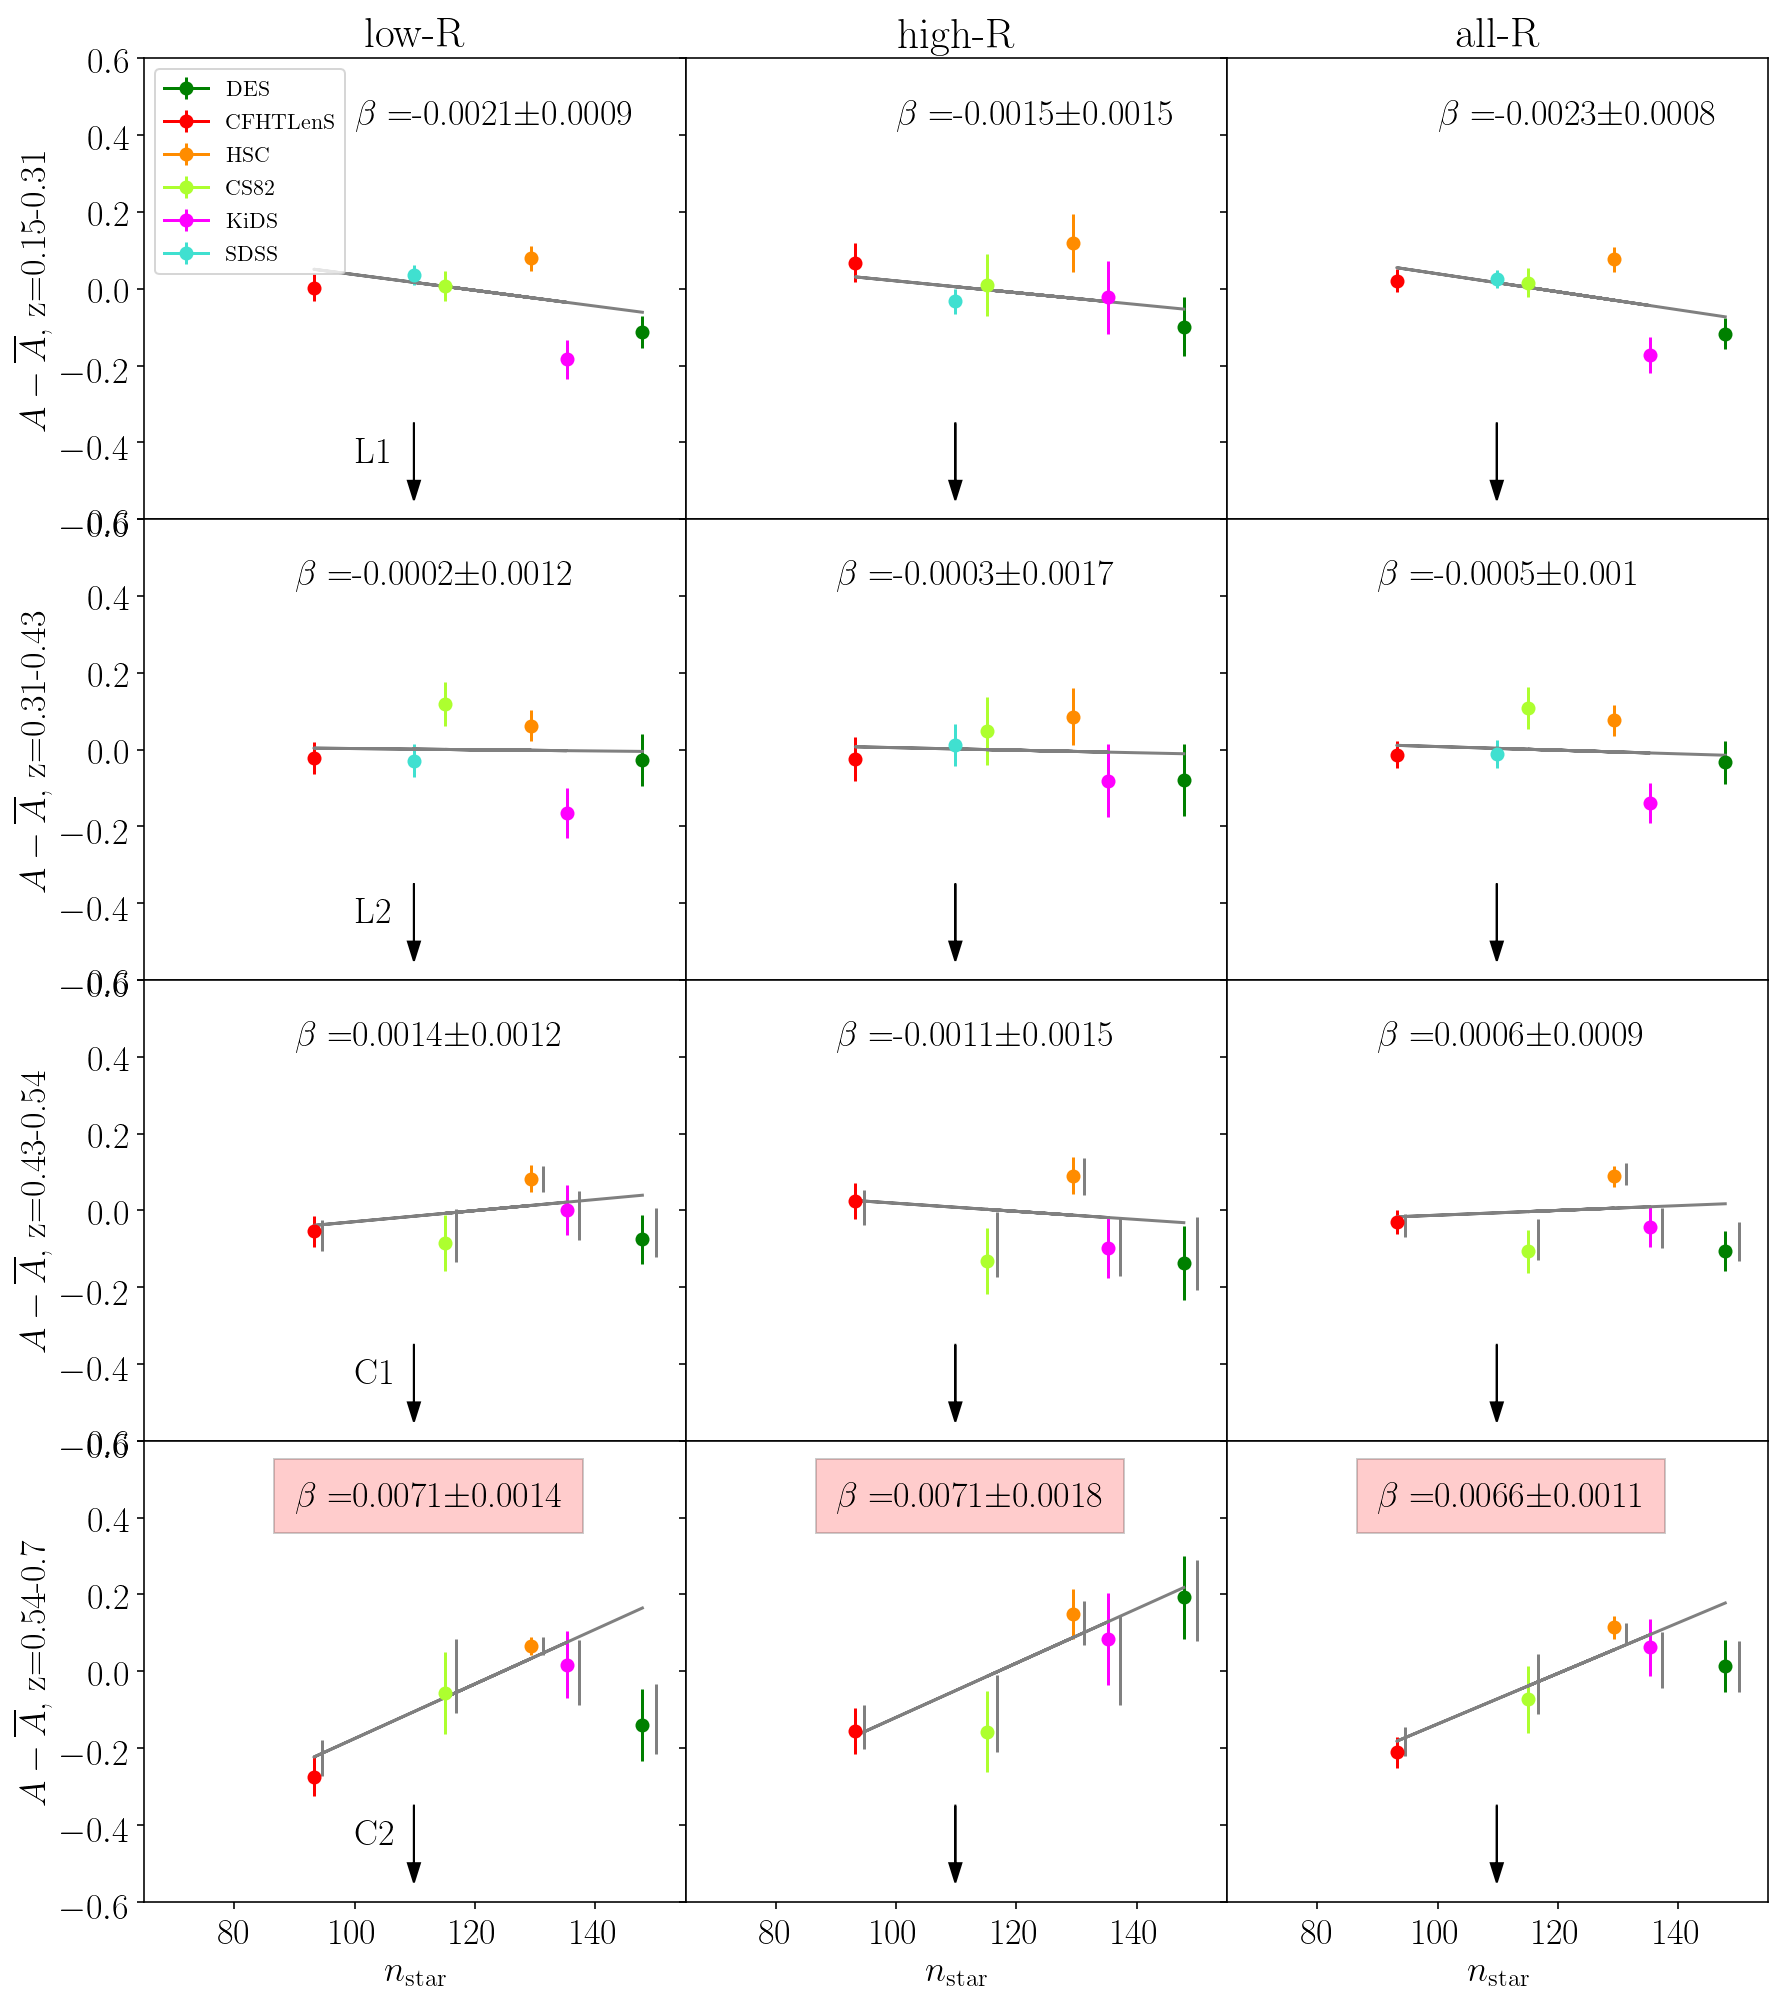

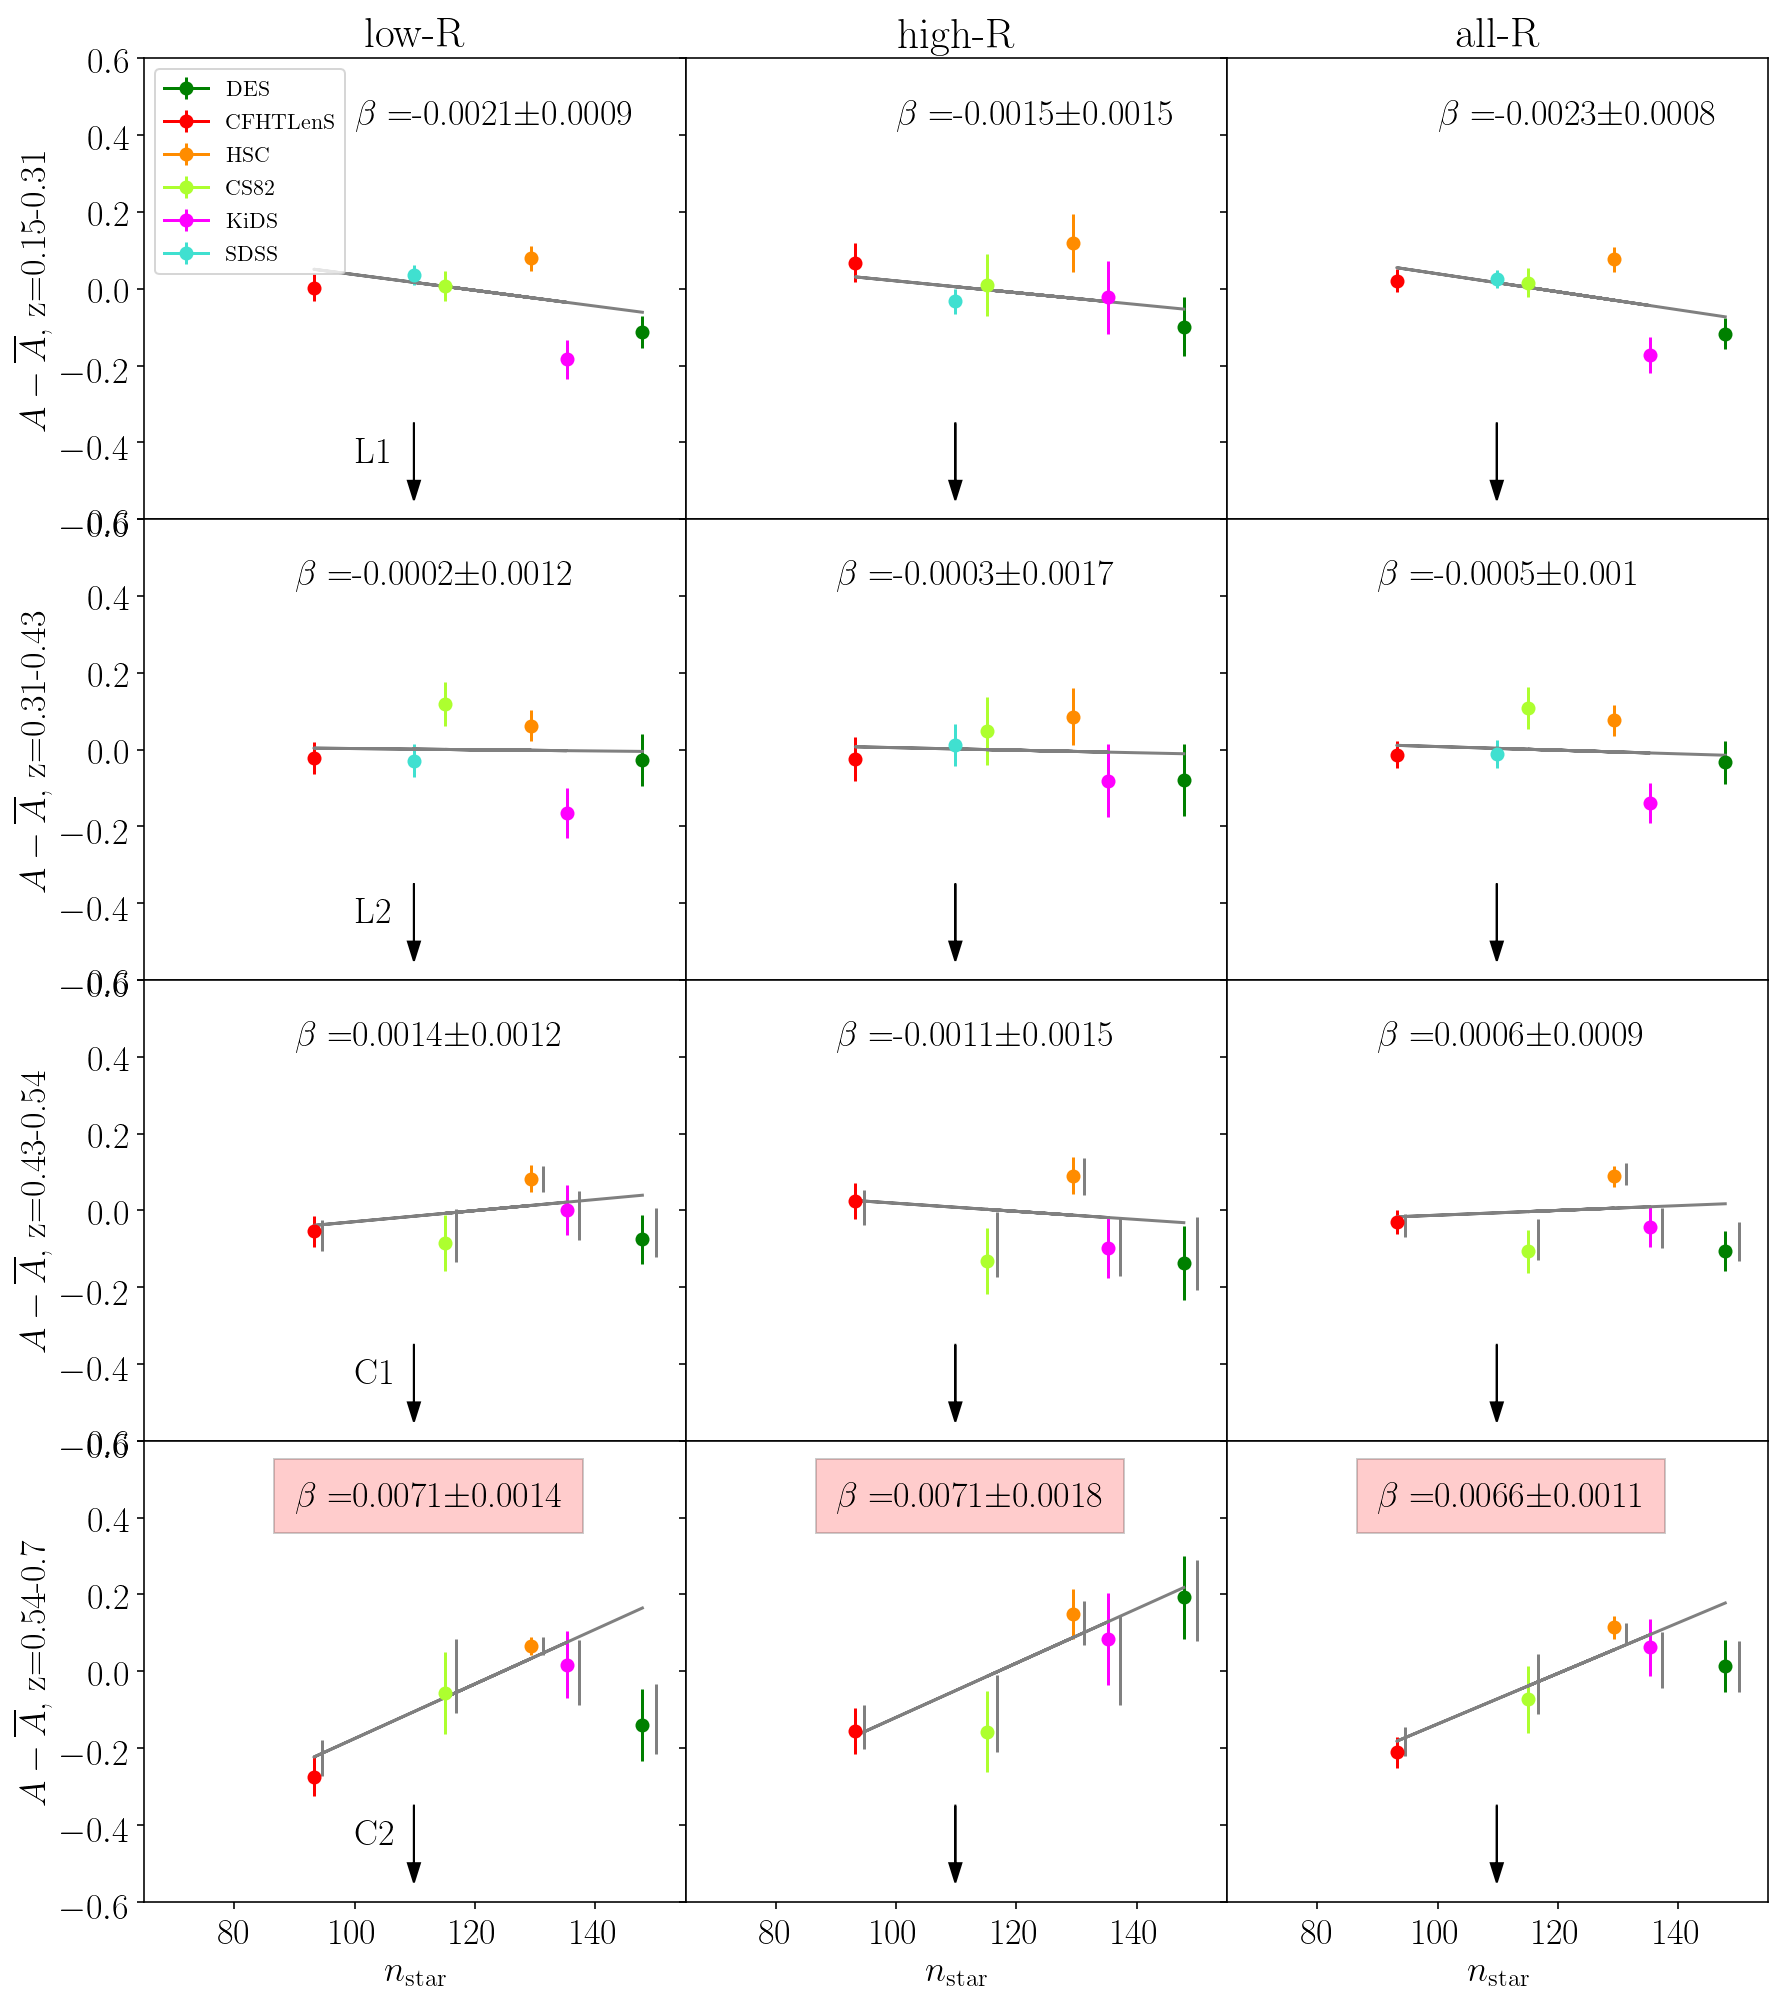

In [28]:
# Subtract weighed mean from the y-axis

plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
  
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
        
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(Cstar[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(Cstar[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(Cstar[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(Cstar[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(Cstar[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(Cstar[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
        
        # Plot arrow for SDSS
        ax.arrow(Cstar[5], -0.35, 0, -0.15,head_width=2.0, head_length=0.05, fc='k', ec='k')
          
        # Add the plots for UNWEIGHTED Signals
        # Only for CMASS
        dd=1.015
        if(r > 1):
            ax.errorbar(Cstar[0]*dd,allamp_now[c,0]-meanamp_now,yerr=allamp_errs_now[c,0],color="grey") 
            ax.errorbar(Cstar[1]*dd,allamp_now[c,1]-meanamp_now,yerr=allamp_errs_now[c,1],color="grey")
            ax.errorbar(Cstar[2]*dd,allamp_now[c,2]-meanamp_now,yerr=allamp_errs_now[c,2],color="grey")
            ax.errorbar(Cstar[3]*dd,allamp_now[c,3]-meanamp_now,yerr=allamp_errs_now[c,3],color="grey")
            ax.errorbar(Cstar[4]*dd,allamp_now[c,4]-meanamp_now,yerr=allamp_errs_now[c,4],color="grey")

        # Test removing the edges for the last bin
        if(r==3):
            print("---- C2 Redshift bin -----")
            print("---- Removing low edge - CFHTLENS -----")
            # DES, CFHT, HSC, CS82, KiDS, SDSS 
            thisset=[allamp[c,0],allamp[c,2],allamp[c,3],allamp[c,4]]   
            thisseterr=[allamp_errs[c,0],allamp_errs[c,2],allamp_errs[c,3],allamp_errs[c,4]]  
            x=[Cstar[0],Cstar[2],Cstar[3],Cstar[4]]

            # Important to use absolute_sigma=True here, default is False
            popt, pcov = optimize.curve_fit(linfunc,x , thisset-meanamp, sigma=thisseterr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))
        
            p = np.poly1d(popt)
            beta= np.round(popt[0], 4)
            betaerr=np.round(perr[0], 4)
        
            print("beta",beta)
            print("betaerr",betaerr)
            betasig = np.abs(beta/betaerr)
            print("beta sig",betasig)
            
            print("---- Removing high edge DES -----")
            thisset=[allamp[c,1],allamp[c,2],allamp[c,3],allamp[c,4]]   
            thisseterr=[allamp_errs[c,1],allamp_errs[c,2],allamp_errs[c,3],allamp_errs[c,4]]  
            x=[Cstar[1],Cstar[2],Cstar[3],Cstar[4]]
        
            popt, pcov = optimize.curve_fit(linfunc,x , thisset-meanamp, sigma=thisseterr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))
        
            p = np.poly1d(popt)
           
            beta= np.round(popt[0], 4)
            betaerr=np.round(perr[0], 4)
        
            print("beta",beta)
            print("betaerr",betaerr)
            betasig = np.abs(beta/betaerr)
            print("beta sig",betasig)
            print("---- R -----")  

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, Cstar[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(Cstar[:5],p(Cstar[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, Cstar , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(Cstar,p(Cstar),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------")
        print("data sample", r, "radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(100, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(100, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
        if (r>=1):        
            if (betasig < 3):
                ax.text(90, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(90, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(100, -0.45, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(100, -0.45, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(100, -0.45, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(100, -0.45, 'C2', fontsize=18)
            
        if(r==3):
            ax.set_xlabel(r'$n_{\rm star}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(65,155)
        ax.set_ylim(-0.6,0.6)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_nstar.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# Post blinding internal survey test

---- Adding HSC tests -----
x [71.3087, 149.431]
y [0.922, 0.9939]
yerr: [0.0507, 0.0294]
---- Adding HSC tests -----
x [71.3087, 149.431]
y [0.9647, 1.0232]
yerr: [0.1742, 0.0804]
---- Adding HSC tests -----
x [71.3087, 149.431]
y [0.9434, 1.0088]
yerr: [0.0751, 0.043]
---- Adding HSC tests -----
x [71.3087, 149.431]
y [0.922, 0.9939]
yerr: [0.0507, 0.0294]
---- Adding HSC tests -----
x [71.3087, 149.431]
y [0.9647, 1.0232]
yerr: [0.1742, 0.0804]
---- Adding HSC tests -----
x [71.3087, 149.431]
y [0.9434, 1.0088]
yerr: [0.0751, 0.043]


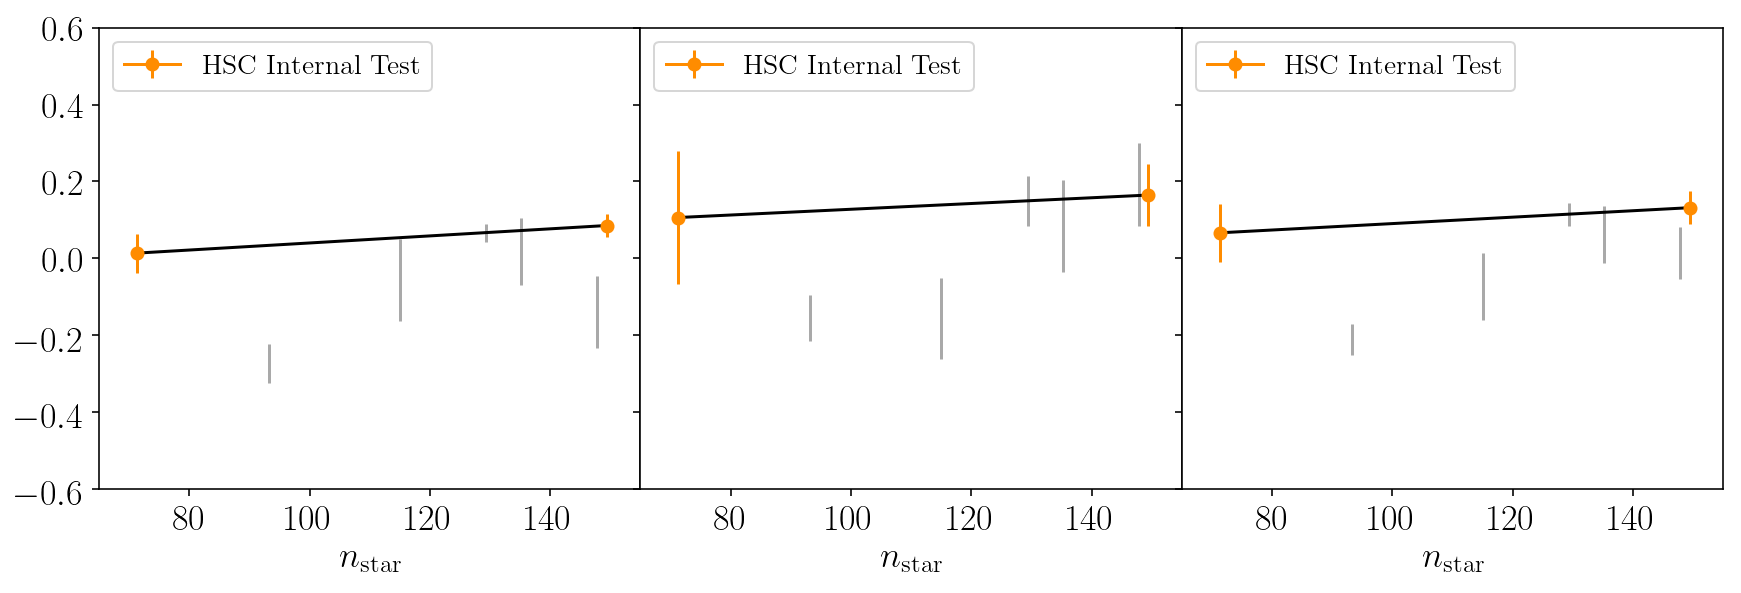

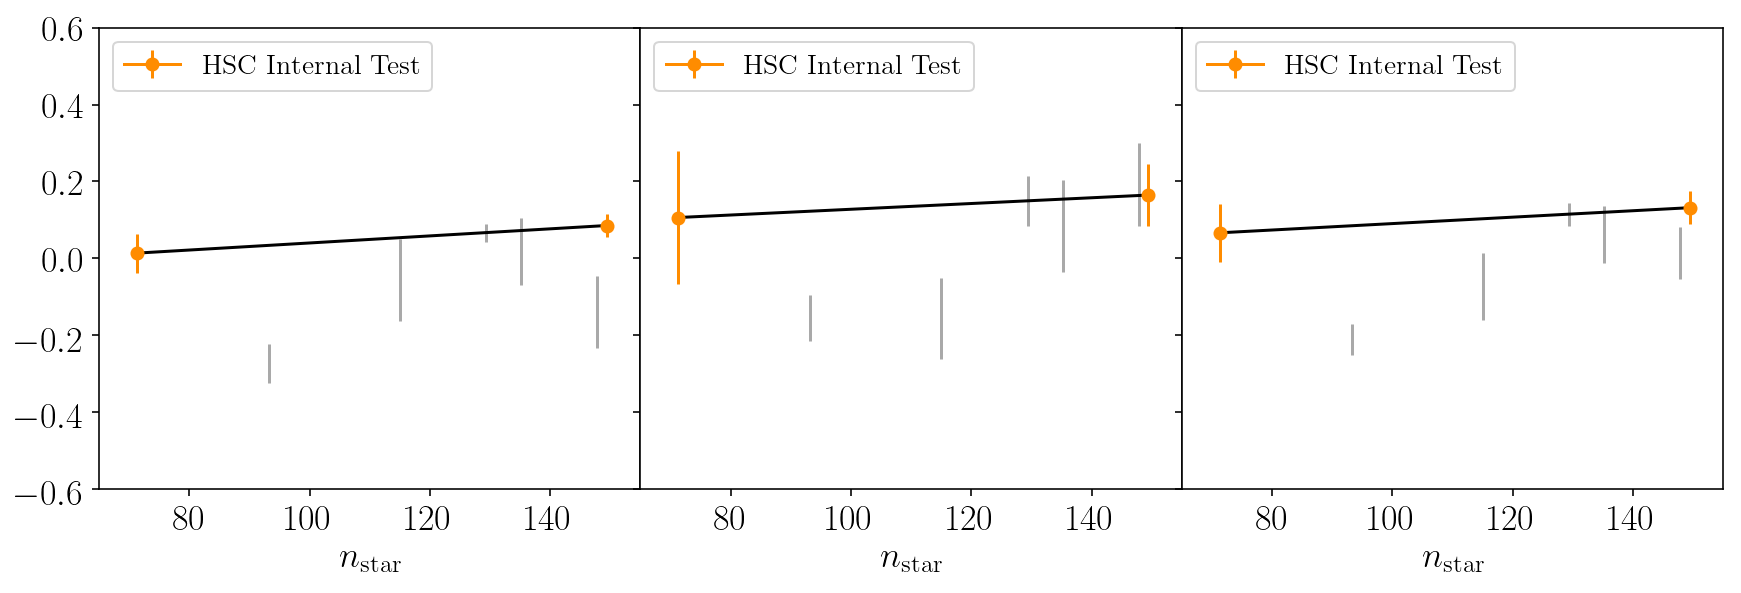

In [29]:
# Subtract weighed mean from the y-axis

plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(1,3,figsize=(12,4))

# CMASS and LOWZ
for r in range(3,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[c]
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(Cstar[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="darkgrey")
        ax.errorbar(Cstar[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="darkgrey") 
        ax.errorbar(Cstar[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkgrey")
        ax.errorbar(Cstar[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="darkgrey")
        ax.errorbar(Cstar[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="darkgrey")
        
        # Adding extra test with HSC data only
        # Divided HSC into two fields with different values of mean Ns
        if(r==3):
            print("---- Adding HSC tests -----")
            #mean values of ns   71.3087
            #mean values of ns   149.431

            # Amplitudes 
            # cols: low nstar, high nstar, all 
            # row 1: small R, row2: large R, row3: all R 

            hsctestamp = np.loadtxt(amparray_hscnstar[0])
            hsctestamperr = np.loadtxt(amparray_errs_hscnstar[0])
            
            eb1=ax.errorbar(71.3087,hsctestamp[c,0]-meanamp,yerr=hsctestamperr[c,0],color="darkorange",label="HSC Internal Test",marker='o') 
            eb1[-1][0].set_linestyle('solid')
            
            eb1=ax.errorbar(149.431,hsctestamp[c,1]-meanamp,yerr=hsctestamperr[c,1],color="darkorange",marker='o') 
            eb1[-1][0].set_linestyle('solid')  

            # This is the overall one, but we don't need it here because
            # this is already plotted in grey.
            #eb1=ax.errorbar(Cstar[2],hsctestamp[c,2]-meanamp,yerr=hsctestamperr[c,2],color="darkorange") 
            #eb1[-1][0].set_linestyle('solid')
              
            x=[71.3087,149.431]
            y=[hsctestamp[c,0],hsctestamp[c,1]]
            yerr=[hsctestamperr[c,0],hsctestamperr[c,1]]
            print("x",x)
            print("y",y)
            print("yerr:",yerr)
            
            # ---- Why is error on beta not working?
            # Figure this out before putting on repo
            # Although not critical
            # !!!!!!!!!!!!!!
            
            popt, pcov = optimize.curve_fit(linfunc, x , y-meanamp, sigma=yerr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(x,p(x),'black')
            
            #beta= np.round(popt[0], 4)
            #betaerr=np.round(perr[0], 4)
            #betasig = np.abs(beta/betaerr)
        
            #print("--------")
            #print("data sample", r, "radial range",c)
            #print("beta",beta)
            #print("betaerr",betaerr)
            #print("beta sig",betasig)
                
            #if (betasig < 3):
            #    ax.text(100, 0.4, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            #else:
            #    ax.text(100, 0.4,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
            #            bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
 
            # Adding a test in which C2 is divded into z sub bins in HSC
            #hsctestamp = np.loadtxt(amparray_hscc2[0])
            #hsctestamperr = np.loadtxt(amparray_errs_hscc2[0])
            
            #eb1=ax.errorbar(100,hsctestamp[c,0]-meanamp,yerr=hsctestamperr[c,0],color="purple") 
            #eb1[-1][0].set_linestyle('solid')
            
            #eb1=ax.errorbar(110,hsctestamp[c,1]-meanamp,yerr=hsctestamperr[c,1],color="purple") 
            #eb1[-1][0].set_linestyle('solid')
             
        if(c==3):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(100, -0.45, 'C2', fontsize=18)
            
        if(r==3):
            ax.set_xlabel(r'$n_{\rm star}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(65,155)
        ax.set_ylim(-0.6,0.6)
        
        
        ax.legend(fontsize=14,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_nstar_hsc_internal.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

In [30]:
# ----- Subtract the Trend with Nstar, make equal to overal value for SDSS ------
# Use one beta value for all radii
# Since no real evidence of variation in beta with R
# Cstar[5] is SDSS
# DES, CFHT, HSC,CS82,KiDS,SDSS

beta = 0.007

print("-------- Subtract this number to remove Nstar trend \n")
print("DES")
des_nstardelta = beta*(Cstar[0]-Cstar[5])
print(des_nstardelta)

print("CFHT")
cfht_nstardelta =  beta*(Cstar[1]-Cstar[5])
print(cfht_nstardelta)

print("HSC")
hsc_nstardelta = beta*(Cstar[2]-Cstar[5])
print(hsc_nstardelta)

print("CS82")
cs82_nstardelta = beta*(Cstar[3]-Cstar[5])
print(cs82_nstardelta)

print("KiDS")
kids_nstardelta = beta*(Cstar[4]-Cstar[5])
print(kids_nstardelta)

-------- Subtract this number to remove Nstar trend 

DES
0.2658267749831778
CFHT
-0.11643195626216274
HSC
0.1365978237549617
CS82
0.03643135831476934
KiDS
0.17780271485651397
-------- Subtract this number to remove Nstar trend 

DES
0.2658267749831778
CFHT
-0.11643195626216274
HSC
0.1365978237549617
CS82
0.03643135831476934
KiDS
0.17780271485651397


# SDSS PSF FWHM

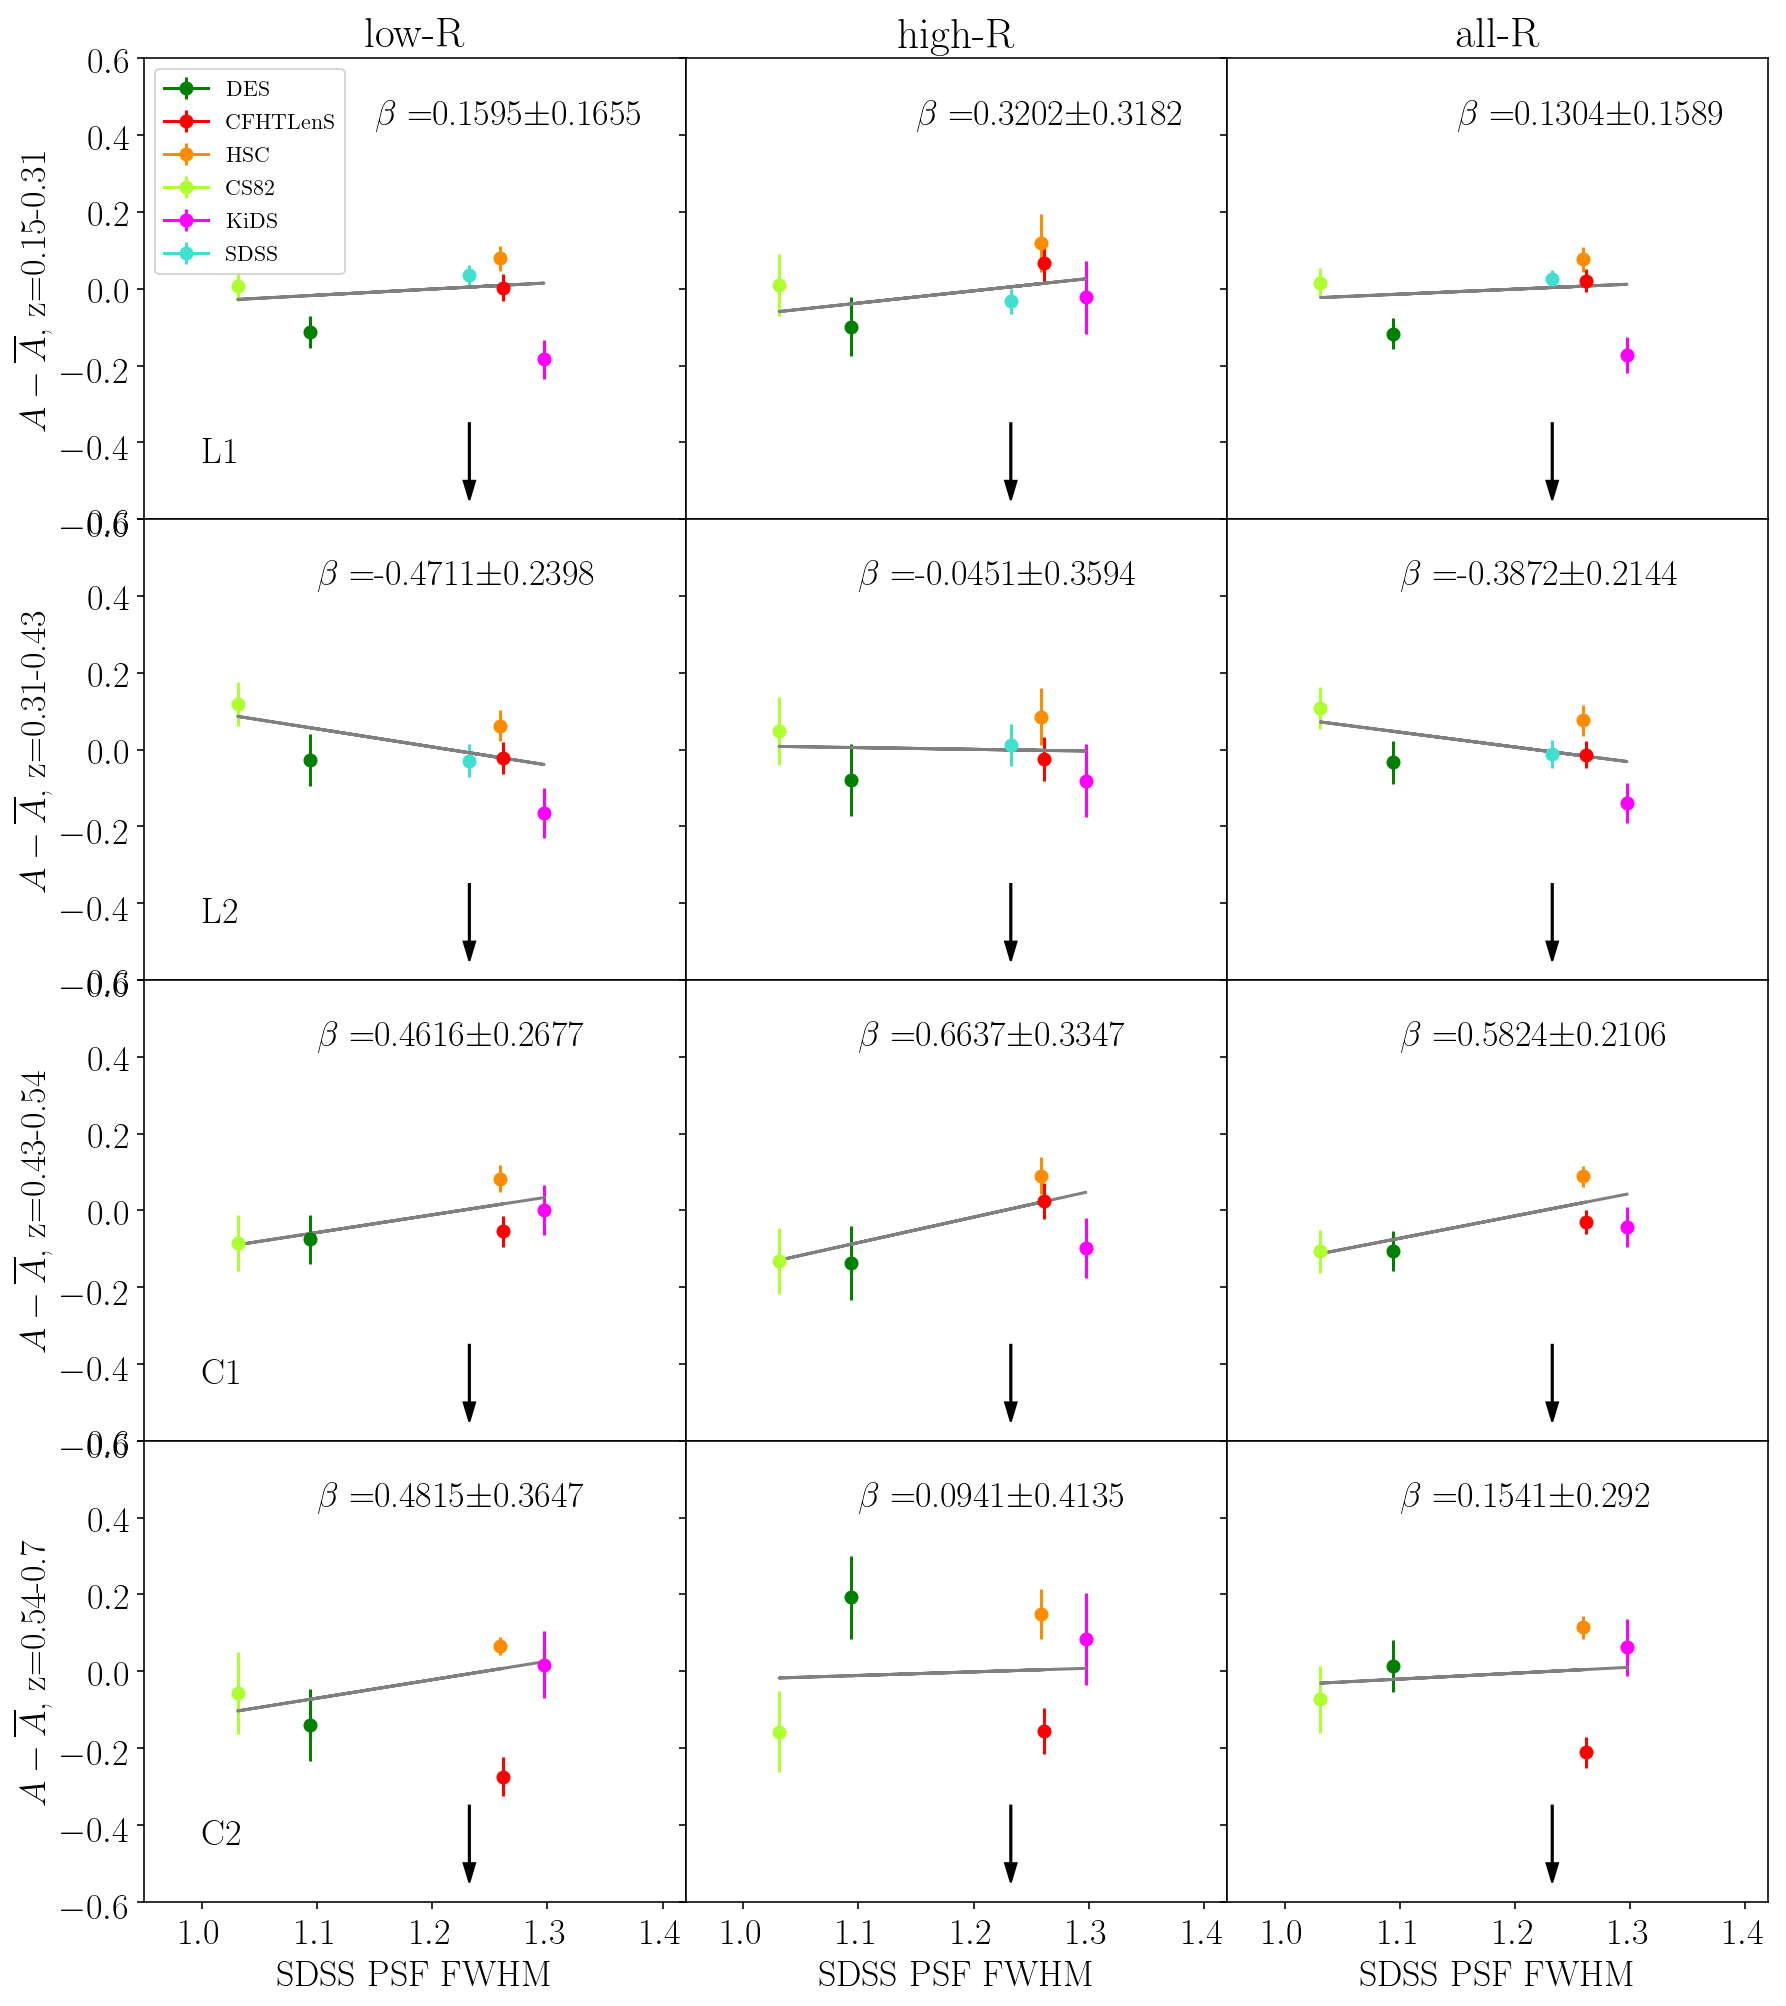

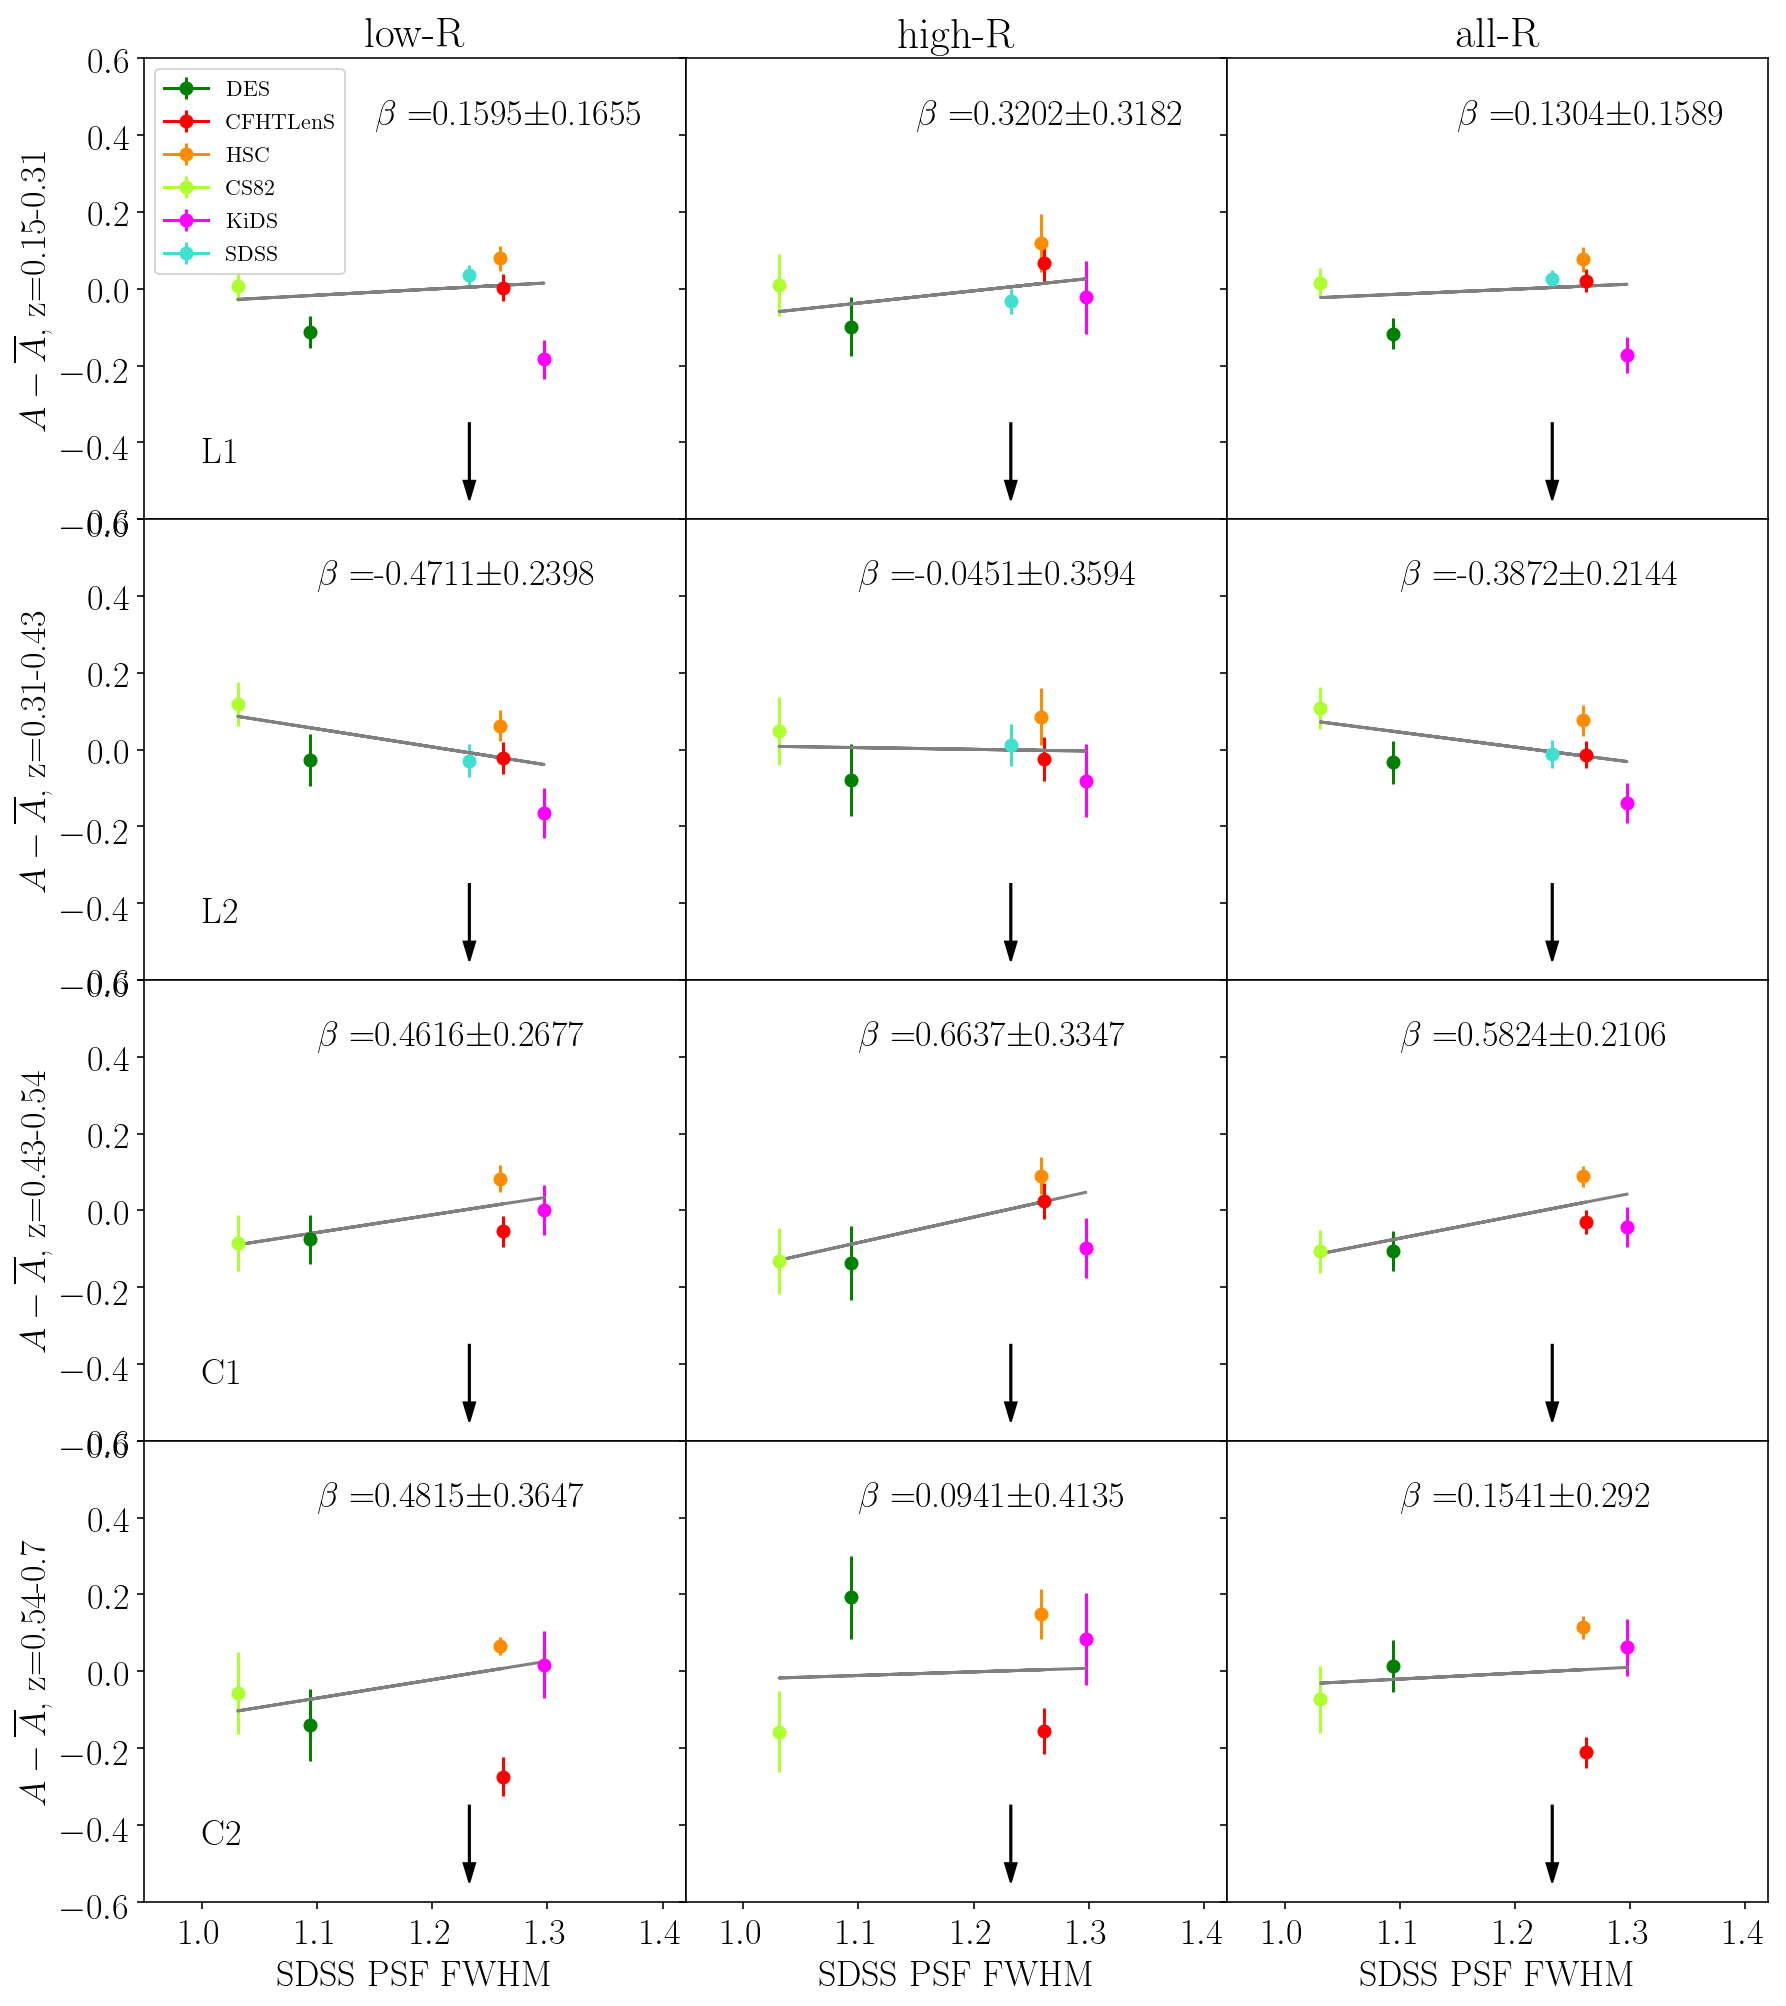

In [31]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(Csee[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(Csee[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(Csee[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(Csee[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(Csee[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(Csee[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
        
        # Plot arrow for SDSS
        ax.arrow(Csee[5], -0.35, 0, -0.15,head_width=0.01, head_length=0.05, fc='k', ec='k')
          
        # Add the plots for UNWEIGHTED Signals
        # Only for CMASS
        #dd=1.015
        #if(r > 1):
        #    ax.errorbar(Csee[0]*dd,allamp_now[c,0]-meanamp_now,yerr=allamp_errs_now[c,0],color="grey") 
        #    ax.errorbar(Csee[1]*dd,allamp_now[c,1]-meanamp_now,yerr=allamp_errs_now[c,1],color="grey")
        #    ax.errorbar(Csee[2]*dd,allamp_now[c,2]-meanamp_now,yerr=allamp_errs_now[c,2],color="grey")
        #    ax.errorbar(Csee[3]*dd,allamp_now[c,3]-meanamp_now,yerr=allamp_errs_now[c,3],color="grey")
        #    ax.errorbar(Csee[4]*dd,allamp_now[c,4]-meanamp_now,yerr=allamp_errs_now[c,4],color="grey")

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, Csee[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(Csee[:5],p(Csee[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, Csee , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(Csee,p(Csee),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        #print("")
        #print("data sample", r, "radial range",c)
        #print("beta",beta)
        #print("betaerr",betaerr)
        #print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(1.15, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(1.15, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r>=1):
            if (betasig < 3):
                ax.text(1.1, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(1.1, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
        
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(1.0, -0.45, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(1.0, -0.45, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(1.0, -0.45, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(1.0, -0.45, 'C2', fontsize=18)
            
        if(r==3):
            ax.set_xlabel('SDSS PSF FWHM')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.95,1.42)
        ax.set_ylim(-0.6,0.6)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_psf.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# Z source (including detrend for Nstar)

  
--------------
Data Sample 0
--------------
radial range 0
beta 0.0007
betaerr 0.0932
beta sig 0.007510729613733905
--------------
radial range 1
beta 0.2912
betaerr 0.1487
beta sig 1.9583053127101548
--------------
radial range 2
beta 0.0095
betaerr 0.089
beta sig 0.10674157303370786
  
--------------
Data Sample 1
--------------
radial range 0
beta 0.1098
betaerr 0.138
beta sig 0.7956521739130433
--------------
radial range 1
beta 0.0318
betaerr 0.1965
beta sig 0.1618320610687023
--------------
radial range 2
beta 0.0793
betaerr 0.123
beta sig 0.6447154471544715
  
--------------
Data Sample 2
   ---- C1 Samples -----
   ---- Removing low edge - CS82 -----
   beta 0.8243
   betaerr 0.3158
   beta sig 2.610196326789107
   ---- Removing high edge HSC  -----
   beta 0.2767
   betaerr 0.526
   beta sig 0.5260456273764258
   ---- R -----
--------------
radial range 0
beta 0.7609
betaerr 0.2672
beta sig 2.847679640718563
   ---- C1 Samples -----
   ---- Removing low edge - CS82 -----
  

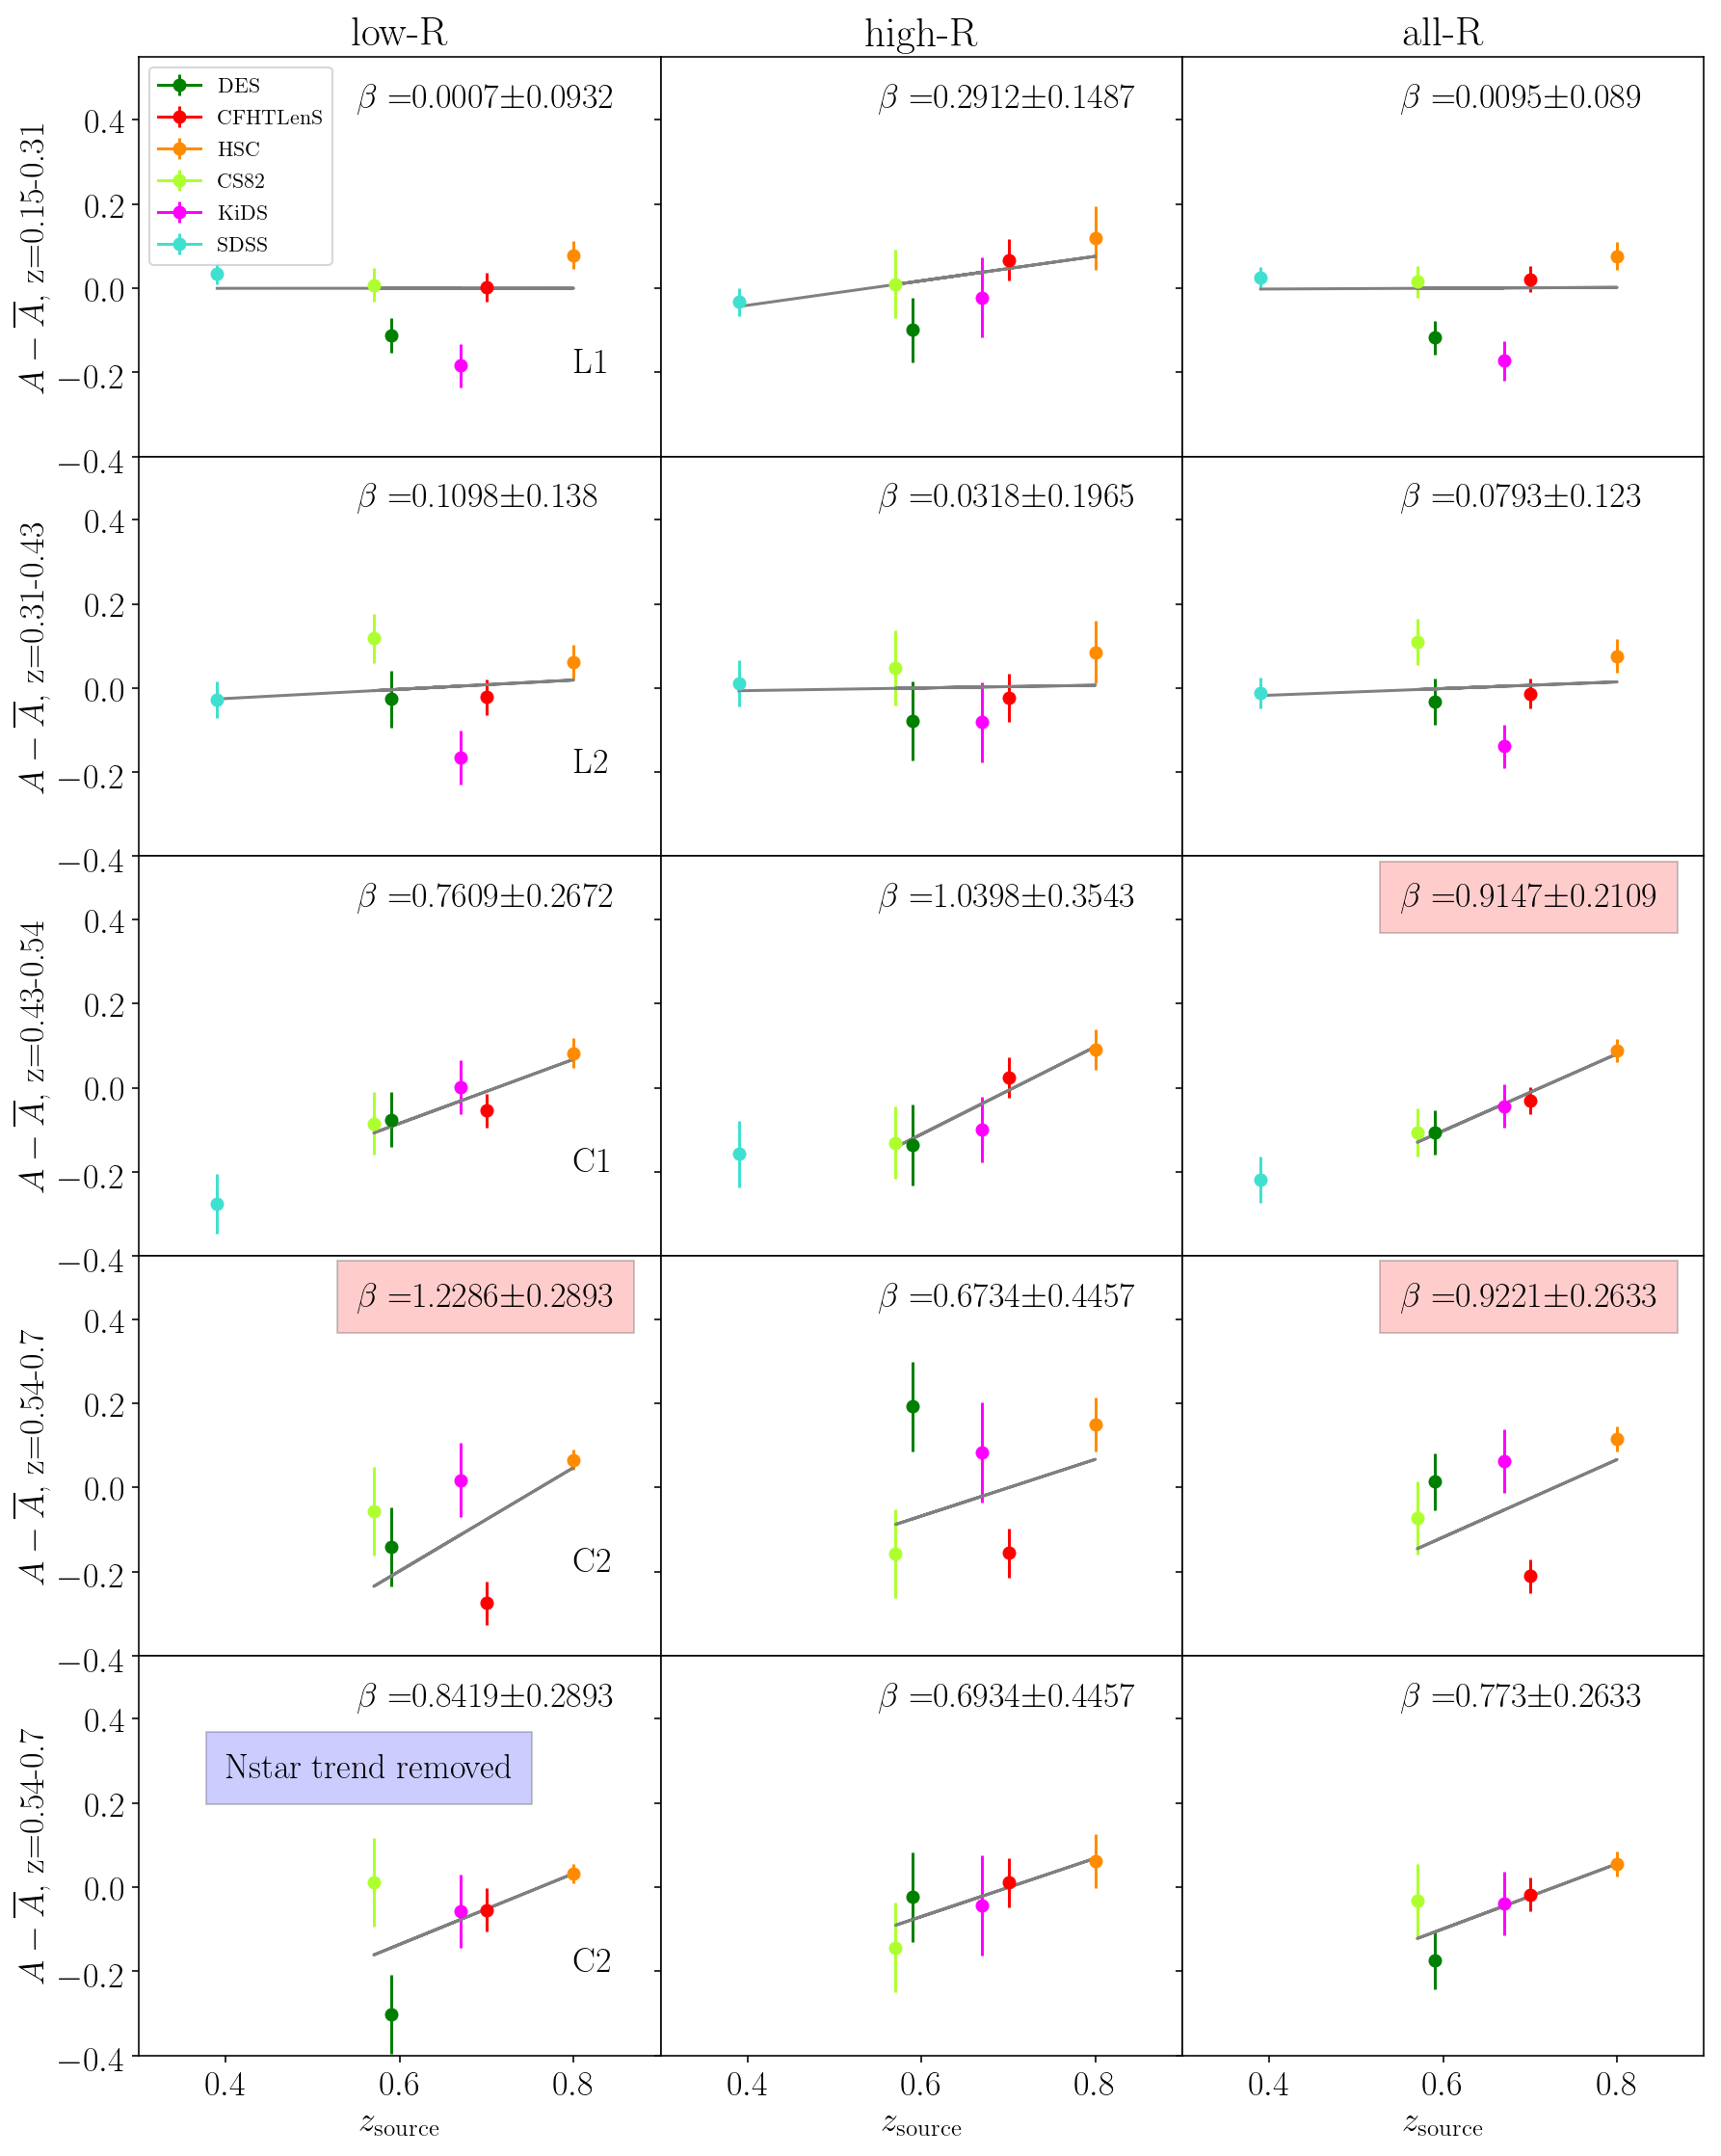

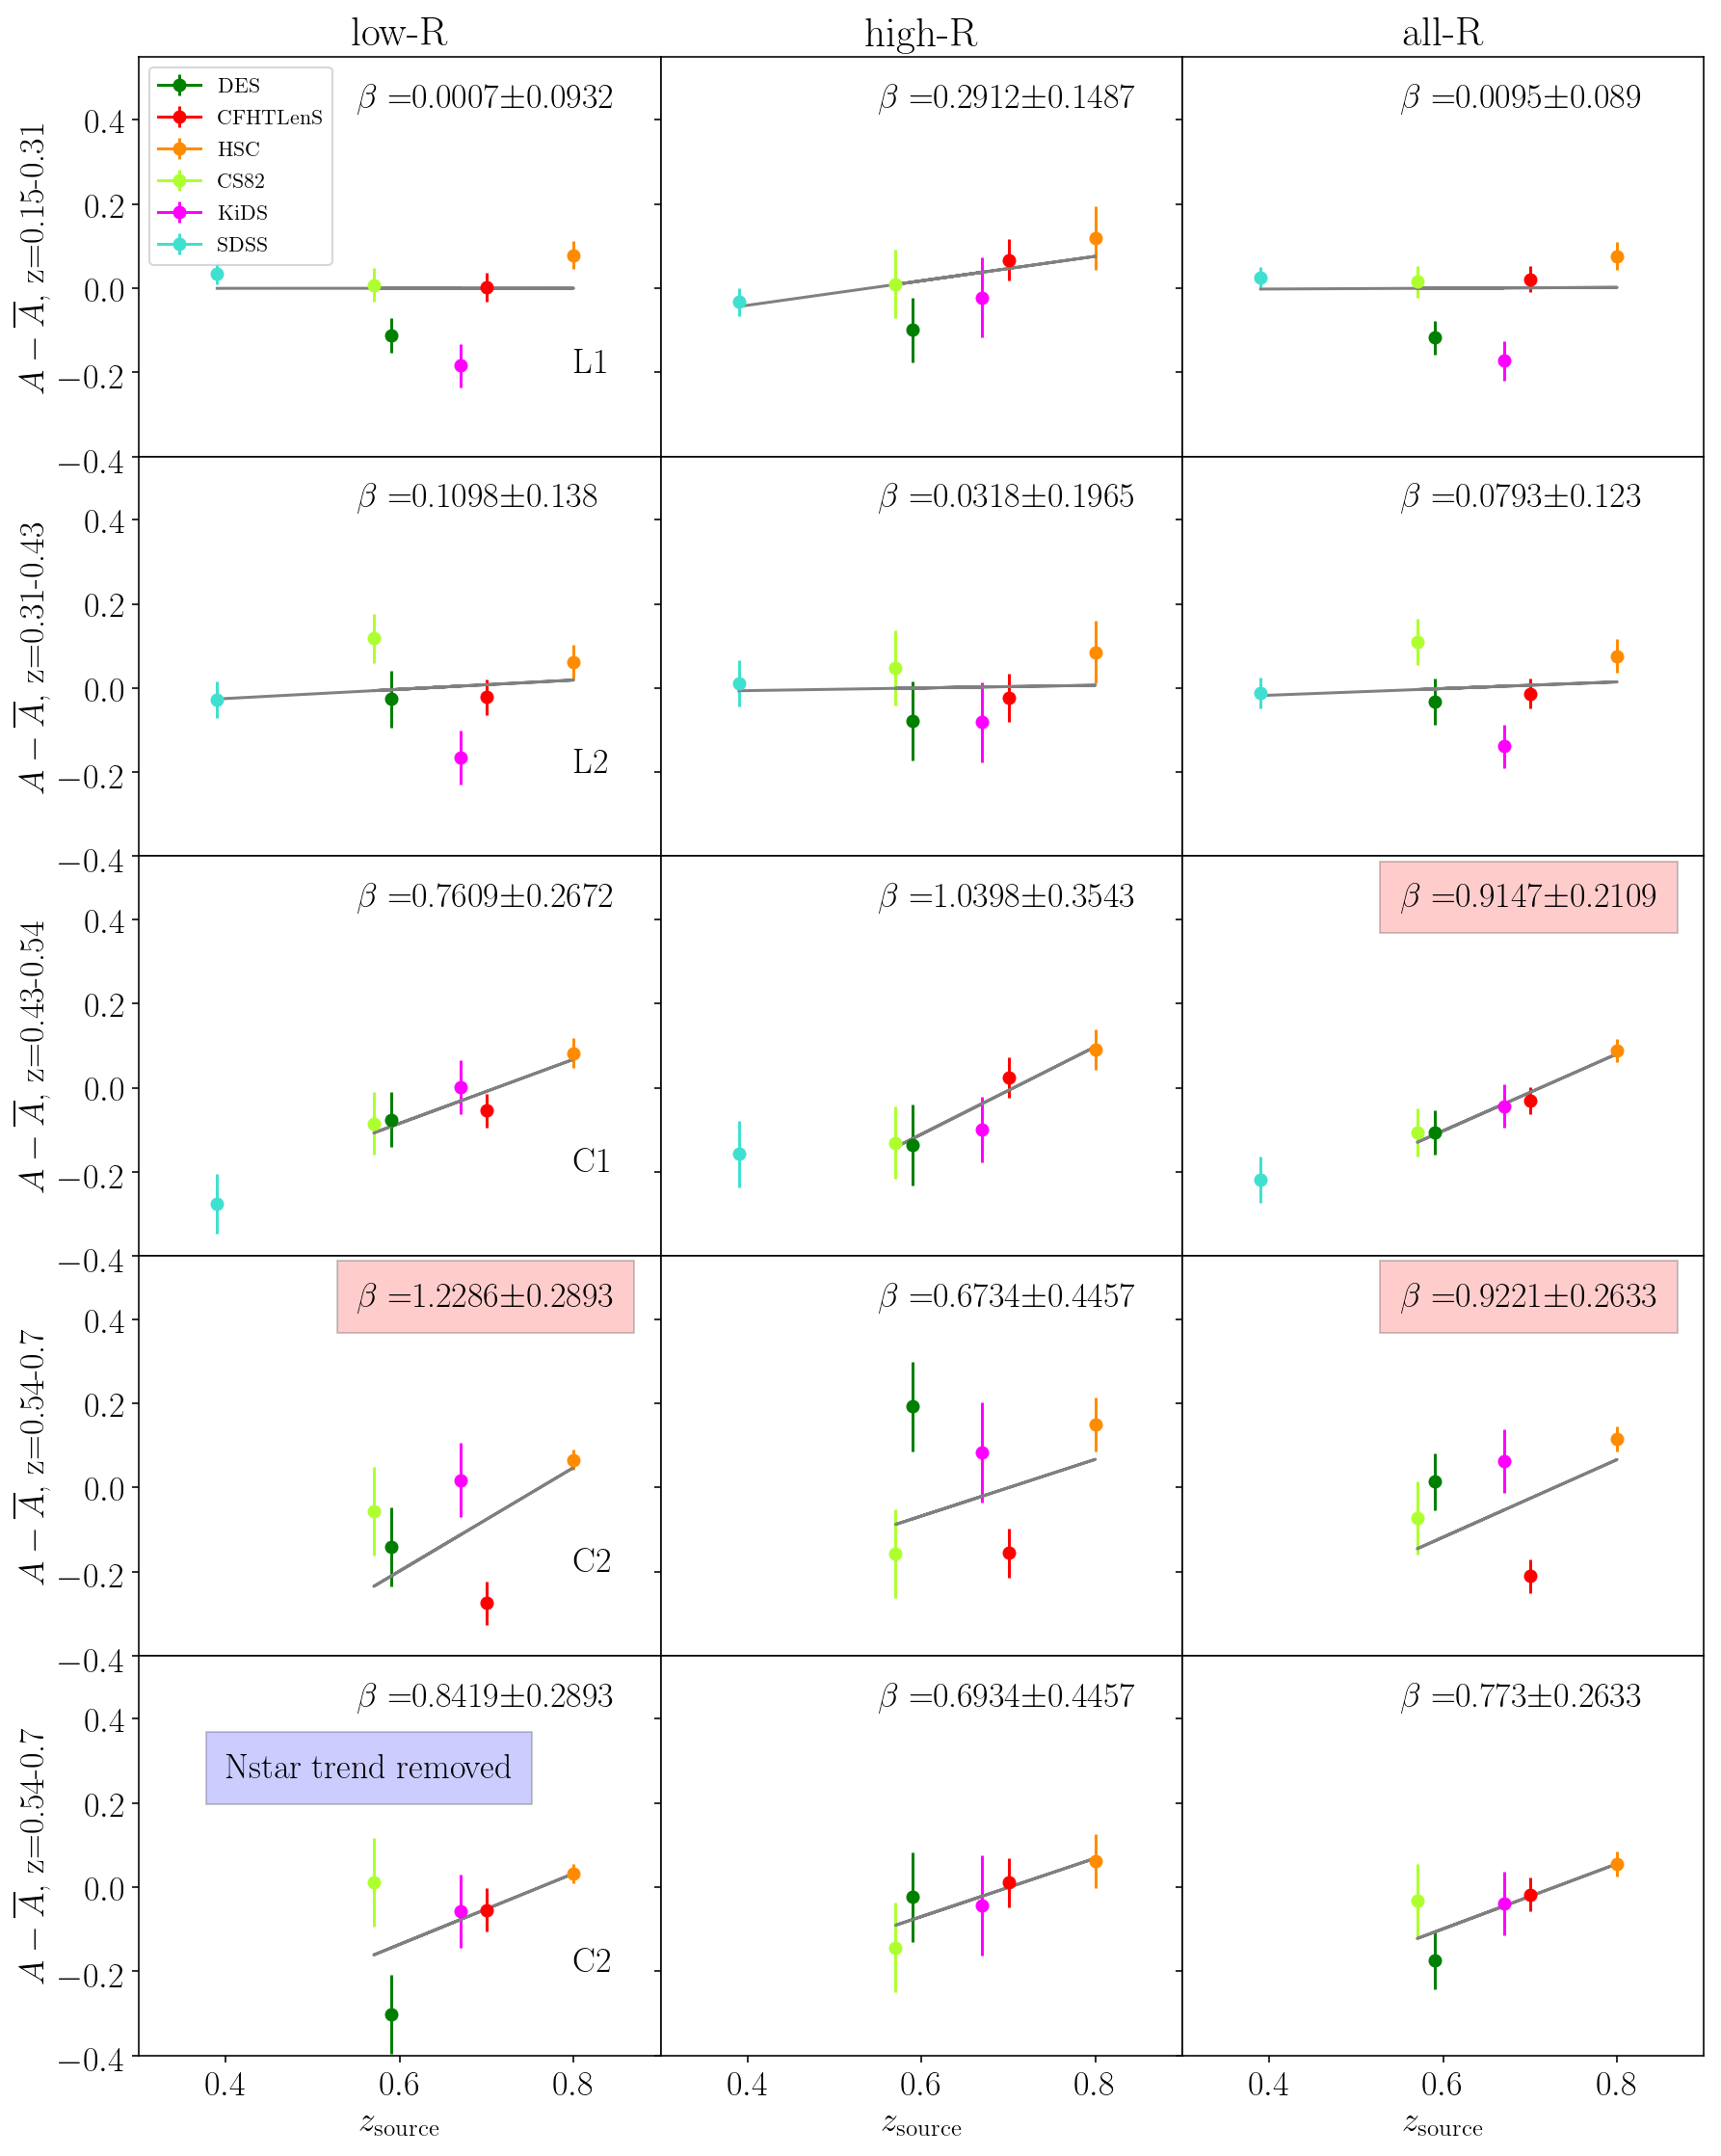

In [32]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(5,3,figsize=(12,18))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    
    print("  ")
    print("--------------")
    print("Data Sample",r)
        
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        #if (r==2):
            #Differece between CS82 and HSC is (extremities of the trend):
            # For C1

            #print("Difference between HSC and CS82 for C1 is for radial range ",r)
            #print((allamp[c,2]-allamp[c,3])/meanamp)
            
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(zsource[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(zsource[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(zsource[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(zsource[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(zsource[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(zsource[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
                     
        # Postblinding test adding in back SDSS, only for C1
        if(r == 2):
            sdssamp = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes.txt")
            sdssamperr = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes_errs.txt")
            ax.errorbar(zsource[5],sdssamp[c]-meanamp,yerr=sdssamperr[c],color="turquoise",label="SDSS",marker='o') 
         
        # Test removing the edges for the C1 and C2 bin
        if(r>=2):
            if(r==2):
                print("   ---- C1 Samples -----")
            if(r==3):
                print("   ---- C2 Samples -----")
            print("   ---- Removing low edge - CS82 -----")
            # DES, CFHT, HSC,CS82,KiDS,SDSS 
            thisset=[allamp[c,0],allamp[c,1],allamp[c,2],allamp[c,4]]   
            thisseterr=[allamp_errs[c,0],allamp_errs[c,1],allamp_errs[c,2],allamp_errs[c,4]]  
            x=[zsource[0],zsource[1],zsource[2],zsource[4]]

            popt, pcov = optimize.curve_fit(linfunc,x , thisset-meanamp, sigma=thisseterr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))
        
            p = np.poly1d(popt)
            beta= np.round(popt[0], 4)
            betaerr=np.round(perr[0], 4)
        
            print("   beta",beta)
            print("   betaerr",betaerr)
            betasig = np.abs(beta/betaerr)
            print("   beta sig",betasig)
            
            print("   ---- Removing high edge HSC  -----")
            thisset=[allamp[c,0],allamp[c,1],allamp[c,3],allamp[c,4]]   
            thisseterr=[allamp_errs[c,0],allamp_errs[c,1],allamp_errs[c,3],allamp_errs[c,4]]  
            x=[zsource[0],zsource[1],zsource[3],zsource[4]]
        
            popt, pcov = optimize.curve_fit(linfunc,x , thisset-meanamp, sigma=thisseterr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))
        
            p = np.poly1d(popt)
           
            beta= np.round(popt[0], 4)
            betaerr=np.round(perr[0], 4)
        
            print("   beta",beta)
            print("   betaerr",betaerr)
            betasig = np.abs(beta/betaerr)
            print("   beta sig",betasig)
            print("   ---- R -----")  

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, zsource[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(zsource[:5],p(zsource[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, zsource , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(zsource,p(zsource),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------------")
        print("radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r>=1):
            if (betasig < 3):
                ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
    
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(0.8, -0.2, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(0.8, -0.2, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(0.8, -0.2, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(0.8, -0.2, 'C2', fontsize=18) 
            
        if(r==3):
            ax.set_xlabel(r'$z_{source}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.3,0.9)
        ax.set_ylim(-0.4,0.55)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")   
                
                
# ----- Now Detrend the last bin for Nstar -----
for r in range(4,5):       # One row is one data sample
    print("--- Detrend in Nstar ---",r)
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        allamp = np.loadtxt(amparray_wtot[r-1])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r-1])
        
        # ------- Detrend the last bin for Nstar effects ------
        # Last CMASS bin
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        allamp[c,0]=allamp[c,0]-des_nstardelta
        allamp[c,1]=allamp[c,1]-cfht_nstardelta
        allamp[c,2]=allamp[c,2]-hsc_nstardelta
        allamp[c,3]=allamp[c,3]-cs82_nstardelta
        allamp[c,4]=allamp[c,4]-kids_nstardelta
              
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(zsource[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(zsource[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(zsource[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(zsource[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(zsource[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')

        # Now do the fitting and find beta
        # No SDSS for CMASS
        popt, pcov = optimize.curve_fit(linfunc, zsource[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
        perr = np.sqrt(np.diag(pcov))       
        p = np.poly1d(popt)
        ax.plot(zsource[:5],p(zsource[:5]),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------------")
        print("radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
                     
        if (betasig < 3):
            ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
        else:
            ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
          
        if (c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(0.8, -0.2, 'C2', fontsize=18)     
            #ax.text(0.4, 0.3, 'Nstar trend removed', fontsize=18,fontweight='bold')
            
            ax.text(0.4, 0.26, 'Nstar trend removed', style='italic', 
                    bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})
            
        ax.set_xlabel(r'$z_{\rm source}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.3,0.9)
        ax.set_ylim(-0.4,0.55)          
                
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_zsource_detrended.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

  
--------------
Data Sample 0
--------------
radial range 0
beta 0.0007
betaerr 0.0932
beta sig 0.007510729613733905
--------------
radial range 1
beta 0.2912
betaerr 0.1487
beta sig 1.9583053127101548
--------------
radial range 2
beta 0.0095
betaerr 0.089
beta sig 0.10674157303370786
  
--------------
Data Sample 1
--------------
radial range 0
beta 0.1098
betaerr 0.138
beta sig 0.7956521739130433
--------------
radial range 1
beta 0.0318
betaerr 0.1965
beta sig 0.1618320610687023
--------------
radial range 2
beta 0.0793
betaerr 0.123
beta sig 0.6447154471544715
  
--------------
Data Sample 2
   ---- C1 Samples -----
   ---- Removing low edge - CS82 -----
   beta 0.8243
   betaerr 0.3158
   beta sig 2.610196326789107
   ---- Removing high edge HSC  -----
   beta 0.2767
   betaerr 0.526
   beta sig 0.5260456273764258
   ---- R -----
--------------
radial range 0
beta 0.7609
betaerr 0.2672
beta sig 2.847679640718563
   ---- C1 Samples -----
   ---- Removing low edge - CS82 -----
  

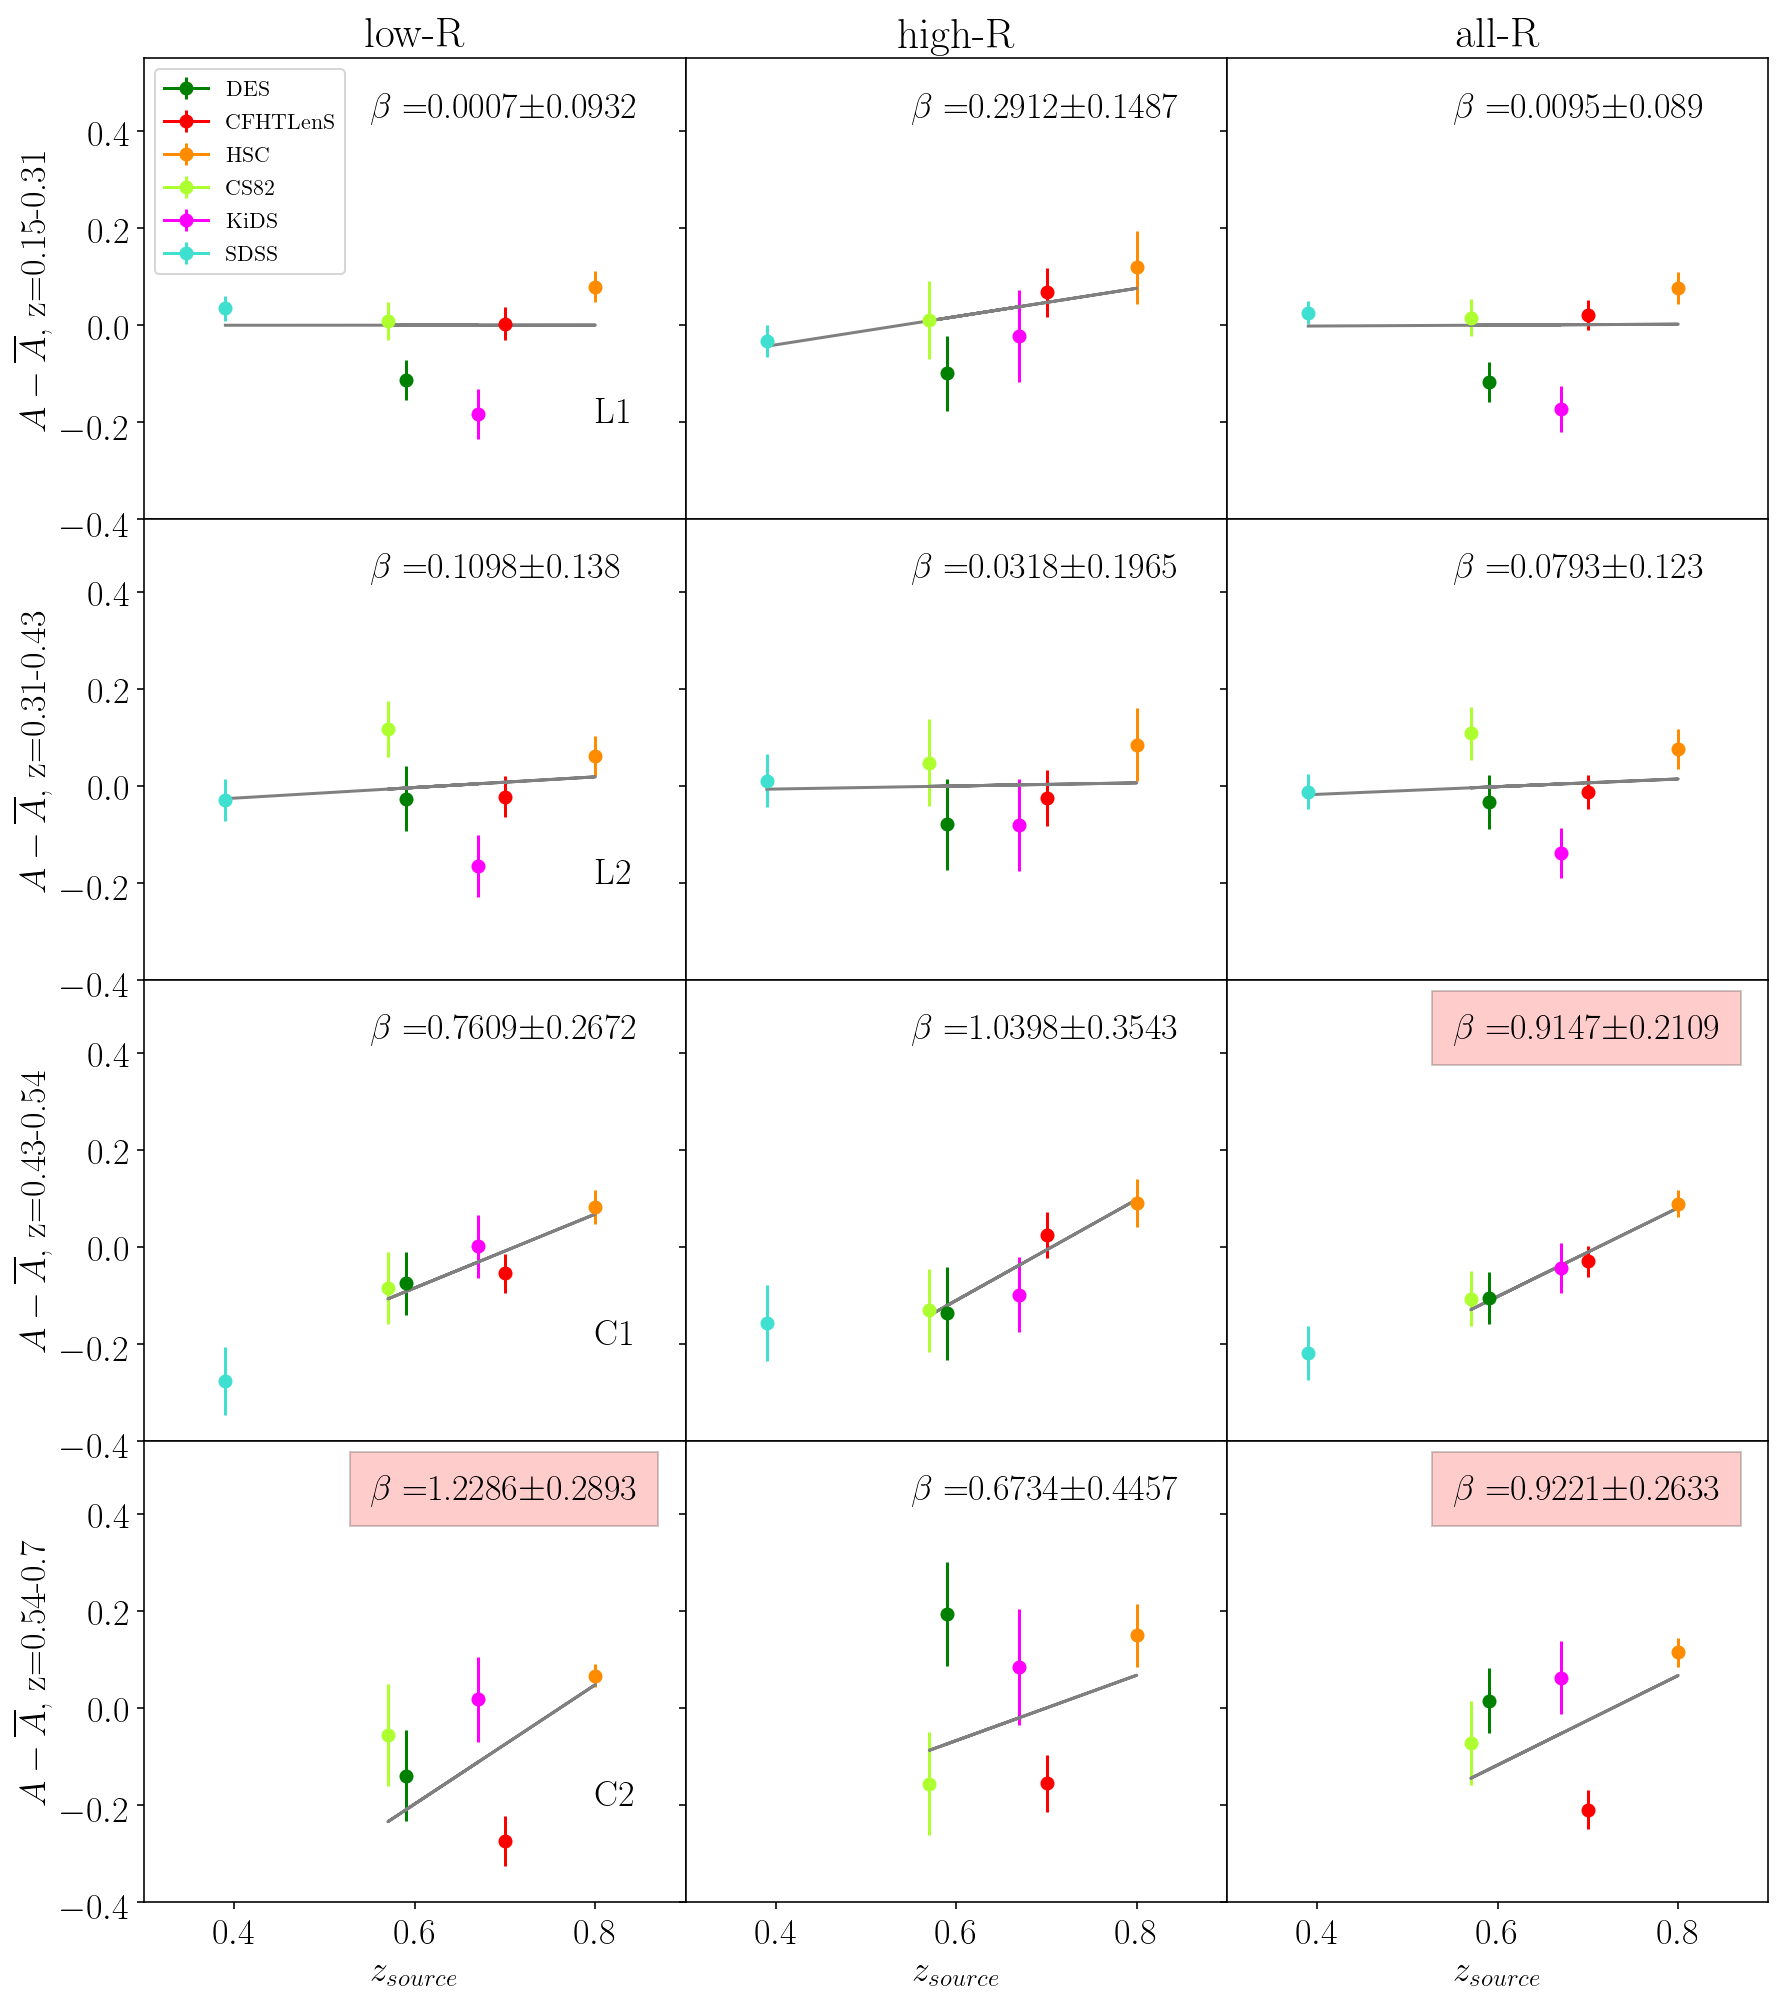

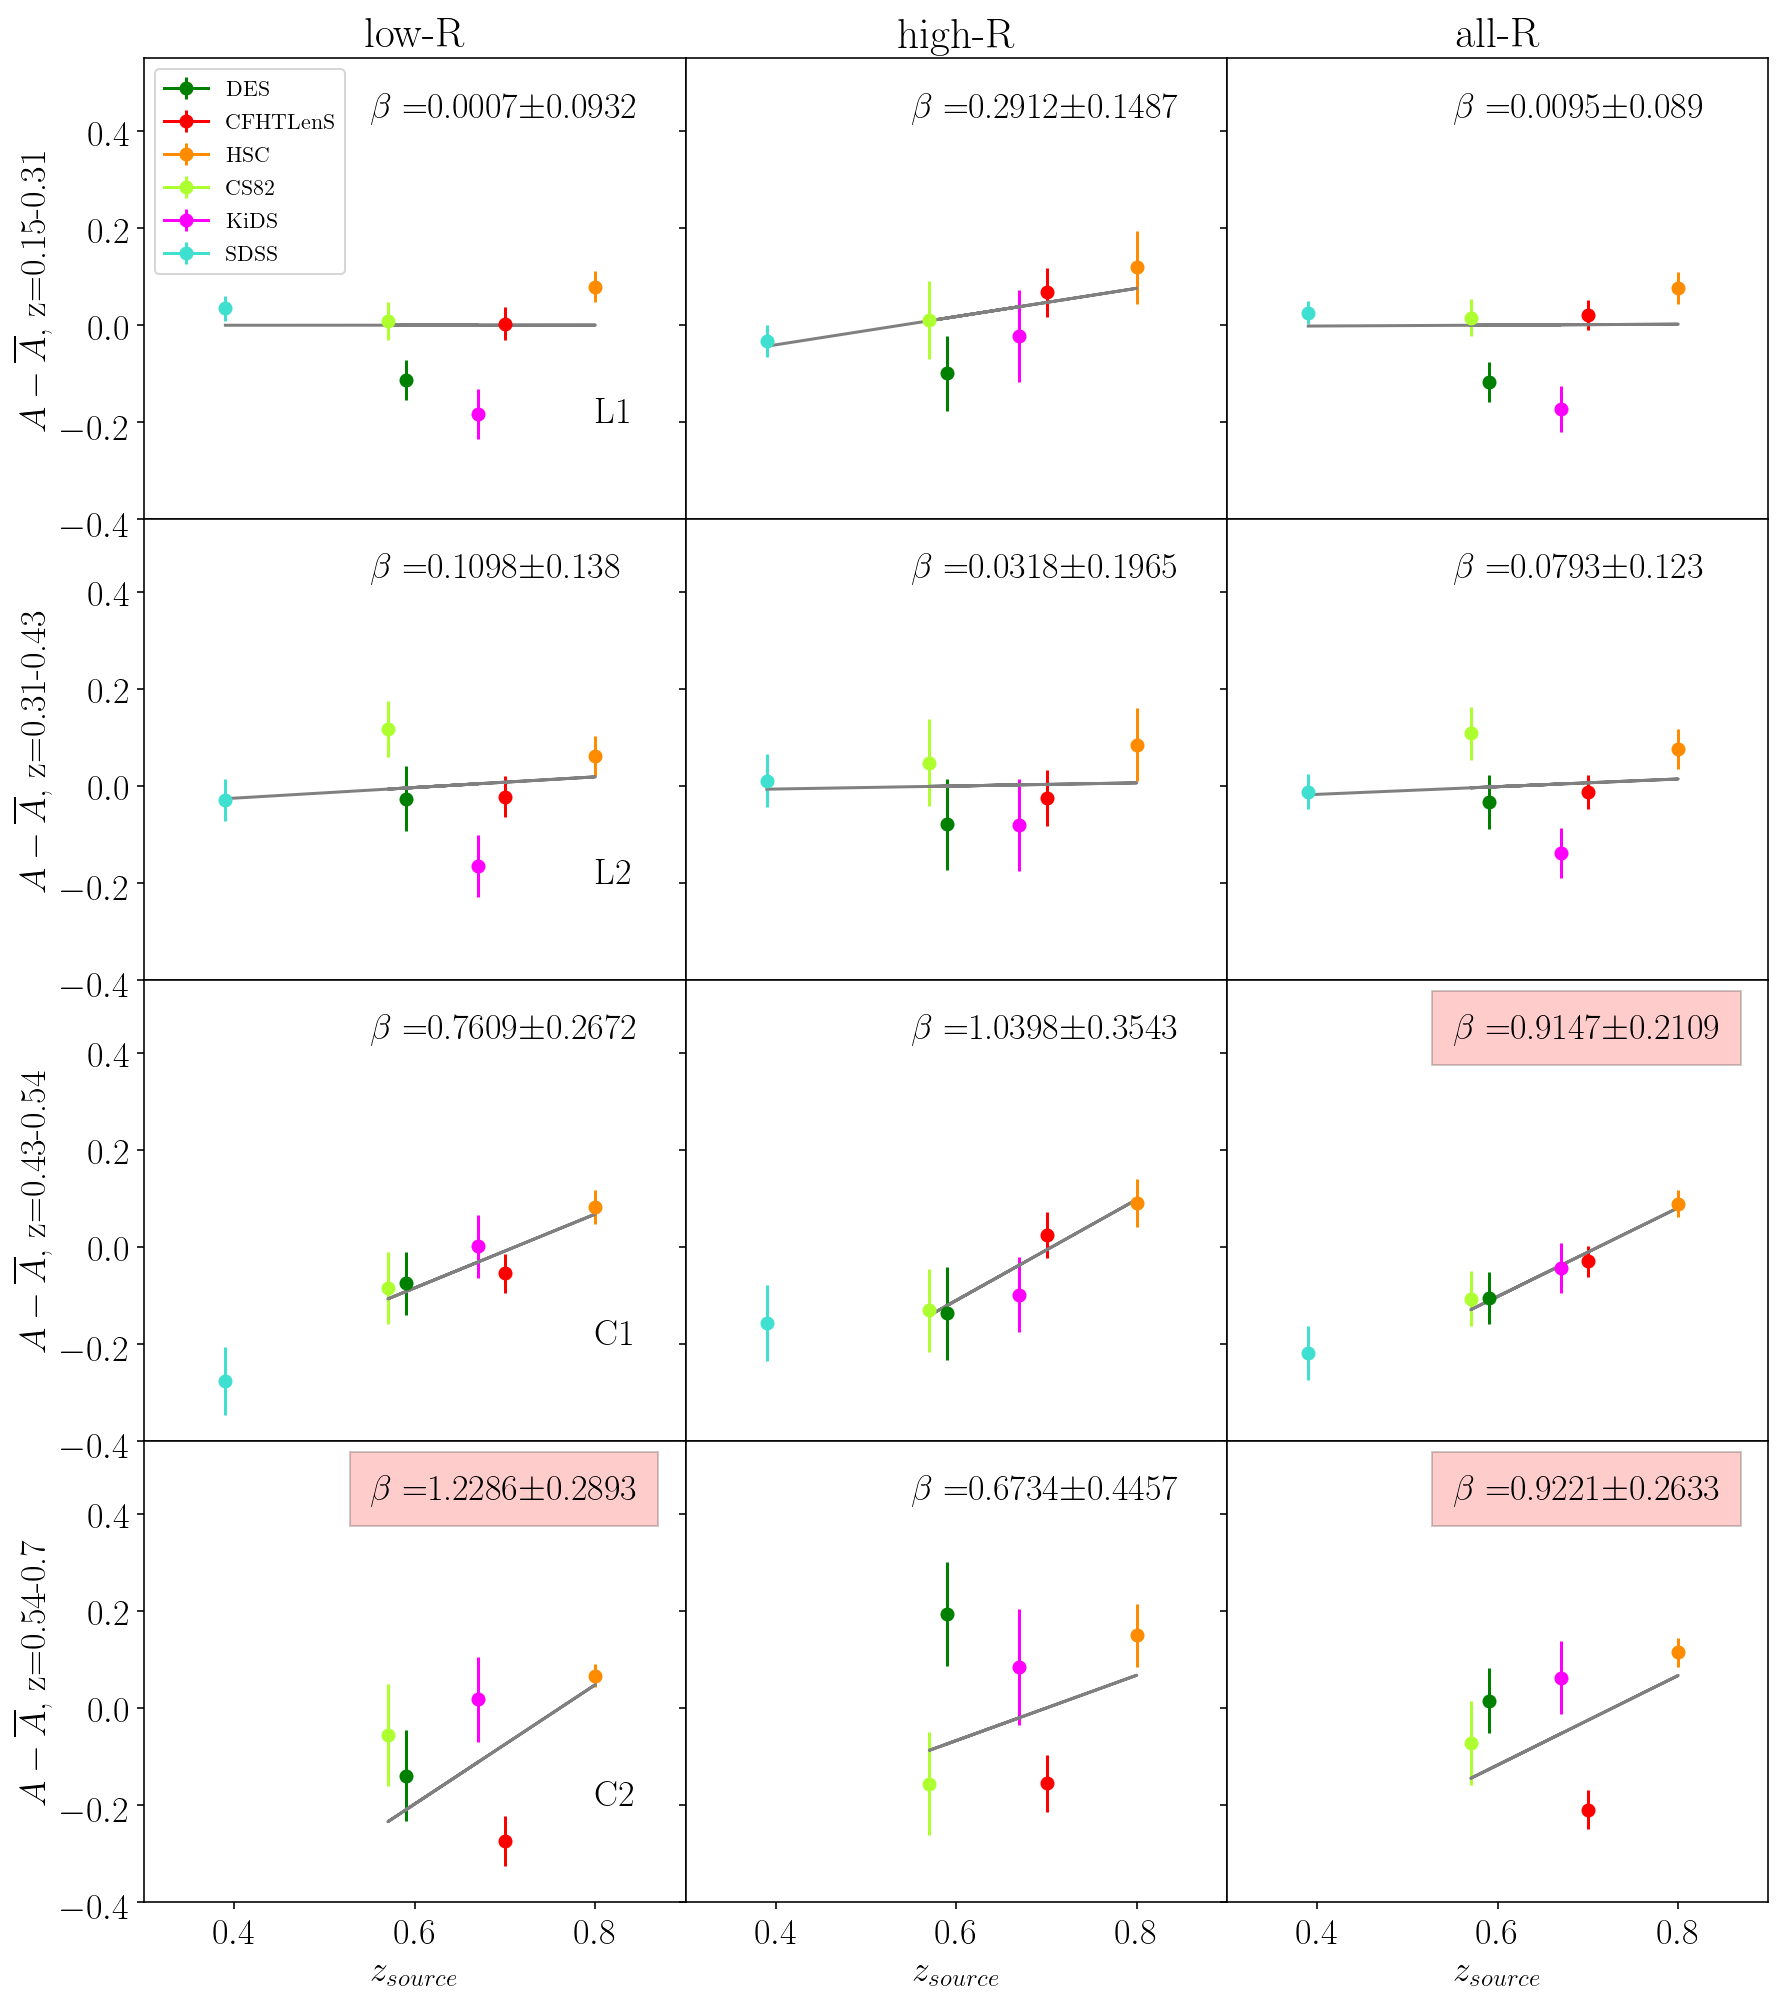

In [33]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    
    print("  ")
    print("--------------")
    print("Data Sample",r)
        
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        #if (r==2):
            #Differece between CS82 and HSC is (extremities of the trend):
            # For C1

            #print("Difference between HSC and CS82 for C1 is for radial range ",r)
            #print((allamp[c,2]-allamp[c,3])/meanamp)
            
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(zsource[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(zsource[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(zsource[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(zsource[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(zsource[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(zsource[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
                     
        # Postblinding test adding in back SDSS, only for C1
        if(r == 2):
            sdssamp = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes.txt")
            sdssamperr = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes_errs.txt")
            ax.errorbar(zsource[5],sdssamp[c]-meanamp,yerr=sdssamperr[c],color="turquoise",label="SDSS",marker='o') 
         
        # Test removing the edges for the C1 and C2 bin
        if(r>=2):
            if(r==2):
                print("   ---- C1 Samples -----")
            if(r==3):
                print("   ---- C2 Samples -----")
            print("   ---- Removing low edge - CS82 -----")
            # DES, CFHT, HSC,CS82,KiDS,SDSS 
            thisset=[allamp[c,0],allamp[c,1],allamp[c,2],allamp[c,4]]   
            thisseterr=[allamp_errs[c,0],allamp_errs[c,1],allamp_errs[c,2],allamp_errs[c,4]]  
            x=[zsource[0],zsource[1],zsource[2],zsource[4]]

            popt, pcov = optimize.curve_fit(linfunc,x , thisset-meanamp, sigma=thisseterr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))
        
            p = np.poly1d(popt)
            beta= np.round(popt[0], 4)
            betaerr=np.round(perr[0], 4)
        
            print("   beta",beta)
            print("   betaerr",betaerr)
            betasig = np.abs(beta/betaerr)
            print("   beta sig",betasig)
            
            print("   ---- Removing high edge HSC  -----")
            thisset=[allamp[c,0],allamp[c,1],allamp[c,3],allamp[c,4]]   
            thisseterr=[allamp_errs[c,0],allamp_errs[c,1],allamp_errs[c,3],allamp_errs[c,4]]  
            x=[zsource[0],zsource[1],zsource[3],zsource[4]]
        
            popt, pcov = optimize.curve_fit(linfunc,x , thisset-meanamp, sigma=thisseterr,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))
        
            p = np.poly1d(popt)
           
            beta= np.round(popt[0], 4)
            betaerr=np.round(perr[0], 4)
        
            print("   beta",beta)
            print("   betaerr",betaerr)
            betasig = np.abs(beta/betaerr)
            print("   beta sig",betasig)
            print("   ---- R -----")  

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, zsource[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(zsource[:5],p(zsource[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, zsource , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(zsource,p(zsource),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------------")
        print("radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r>=1):
            if (betasig < 3):
                ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
    
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(0.8, -0.2, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(0.8, -0.2, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(0.8, -0.2, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(0.8, -0.2, 'C2', fontsize=18) 
            
        if(r==3):
            ax.set_xlabel(r'$z_{source}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.3,0.9)
        ax.set_ylim(-0.4,0.55)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")   
                
                
        
                
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_zsource.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# Methodology type test

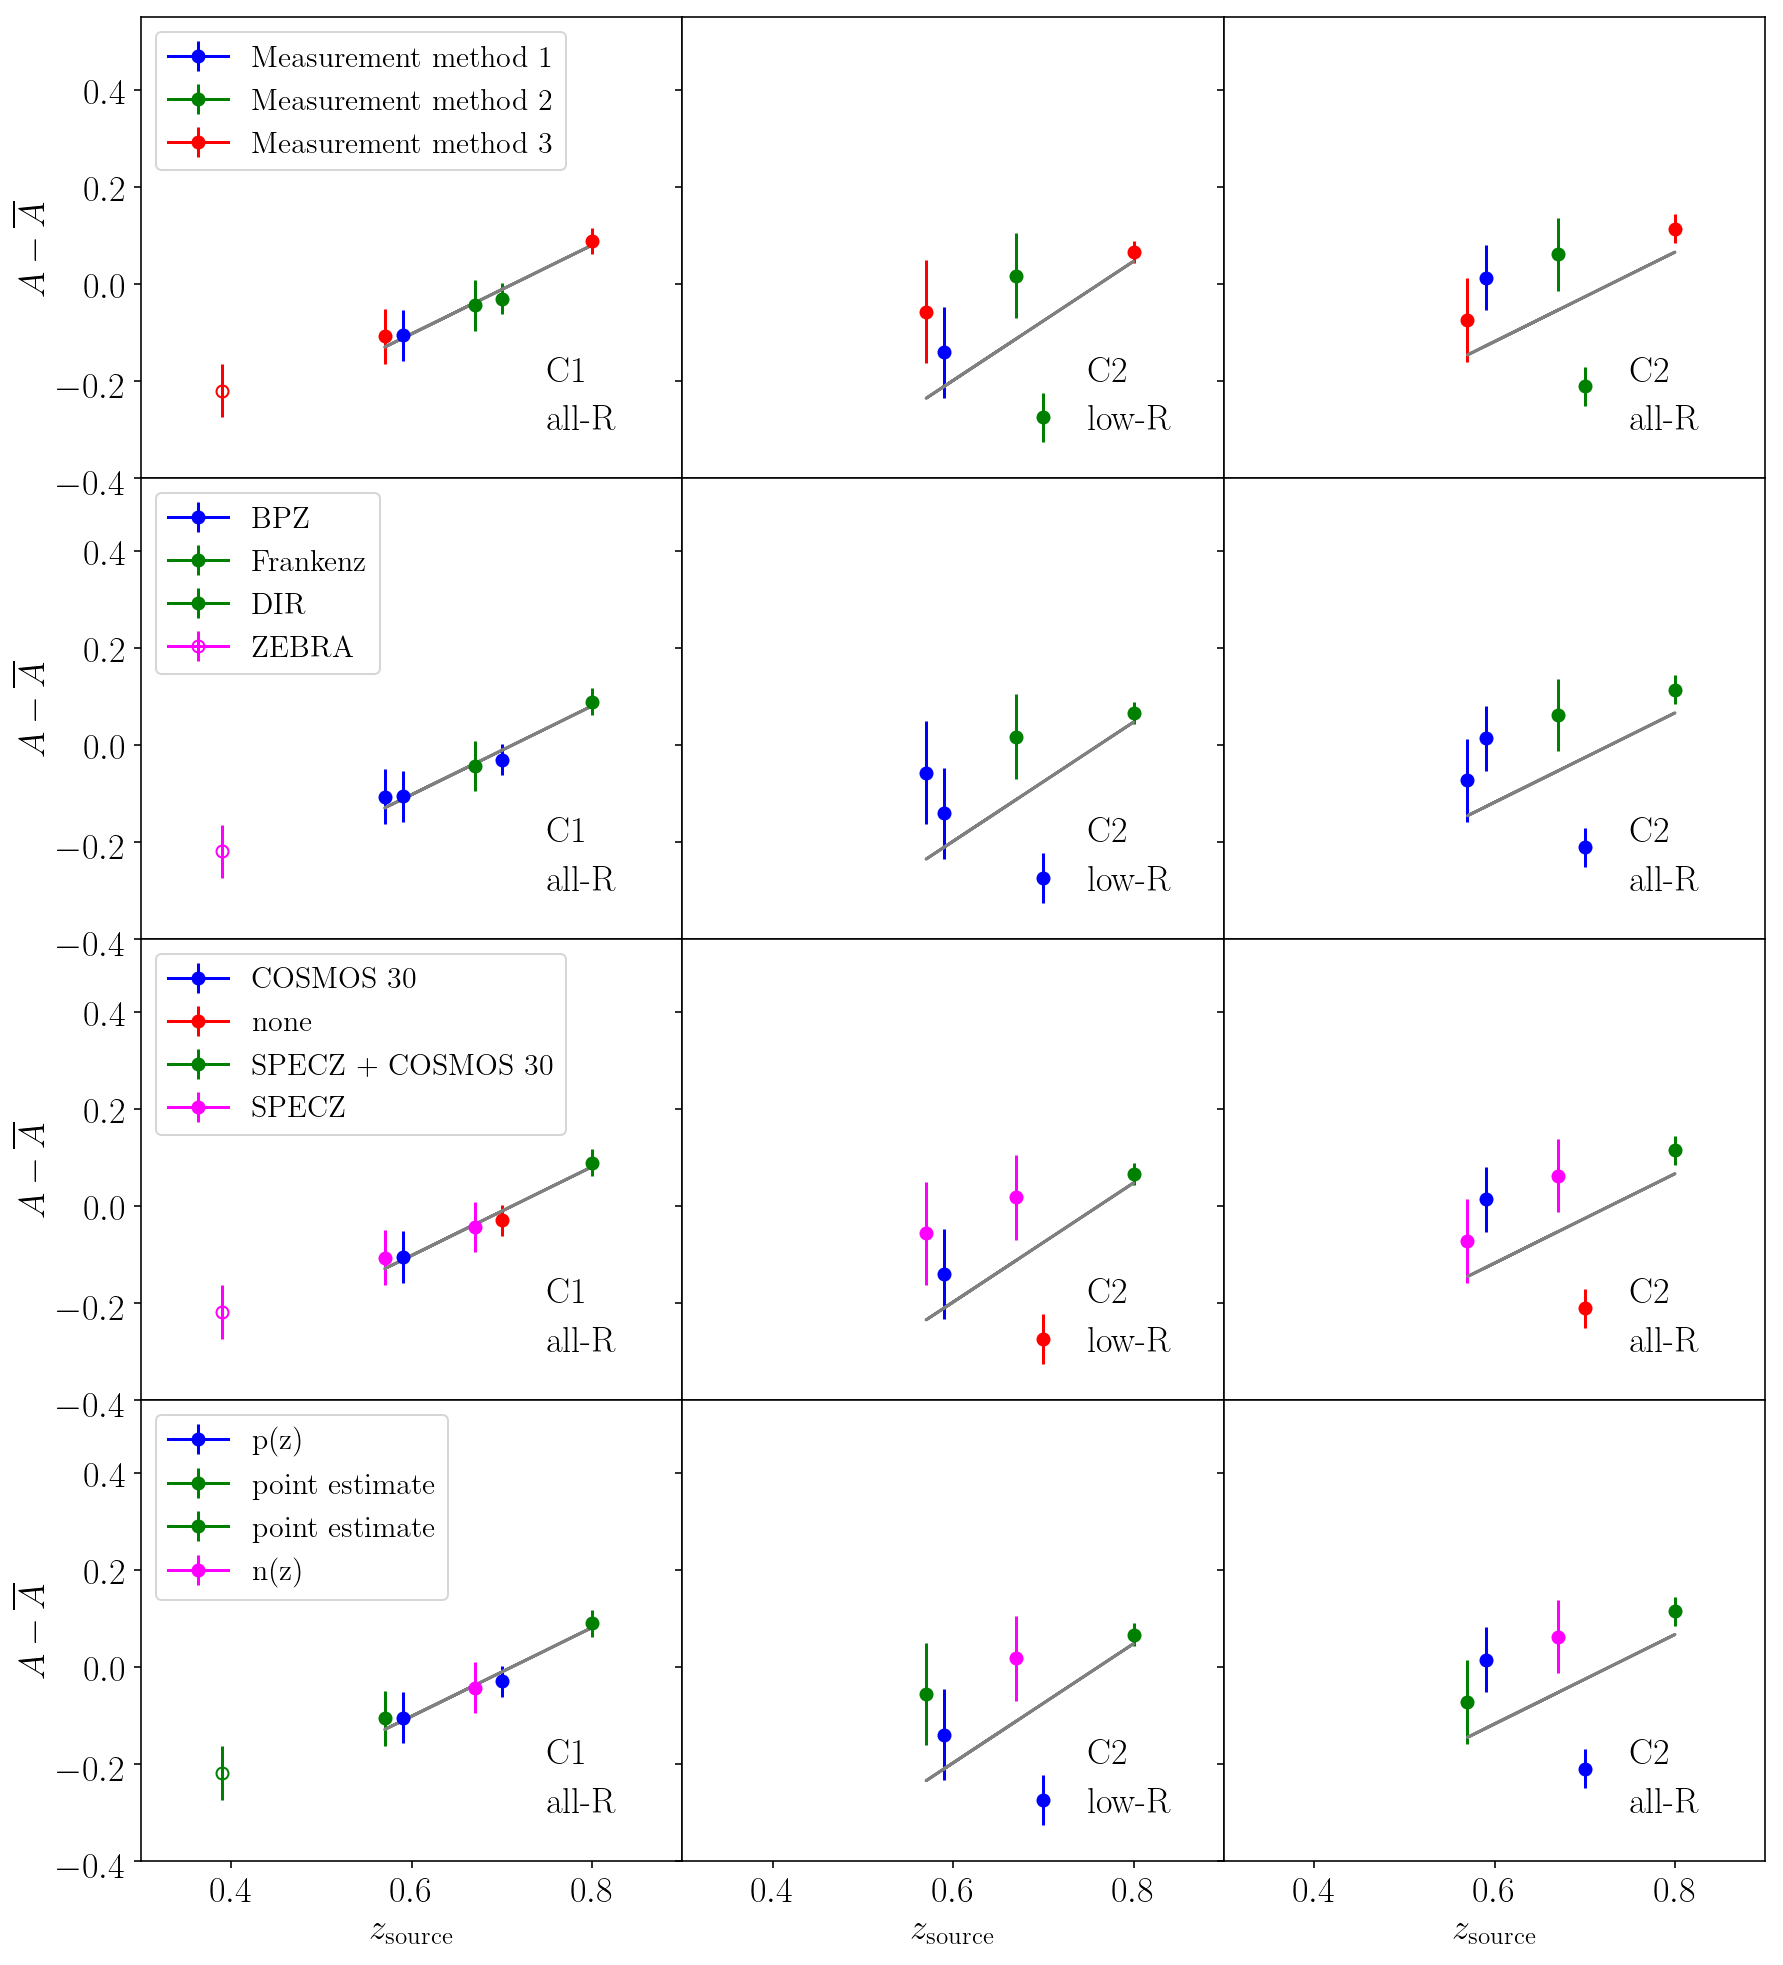

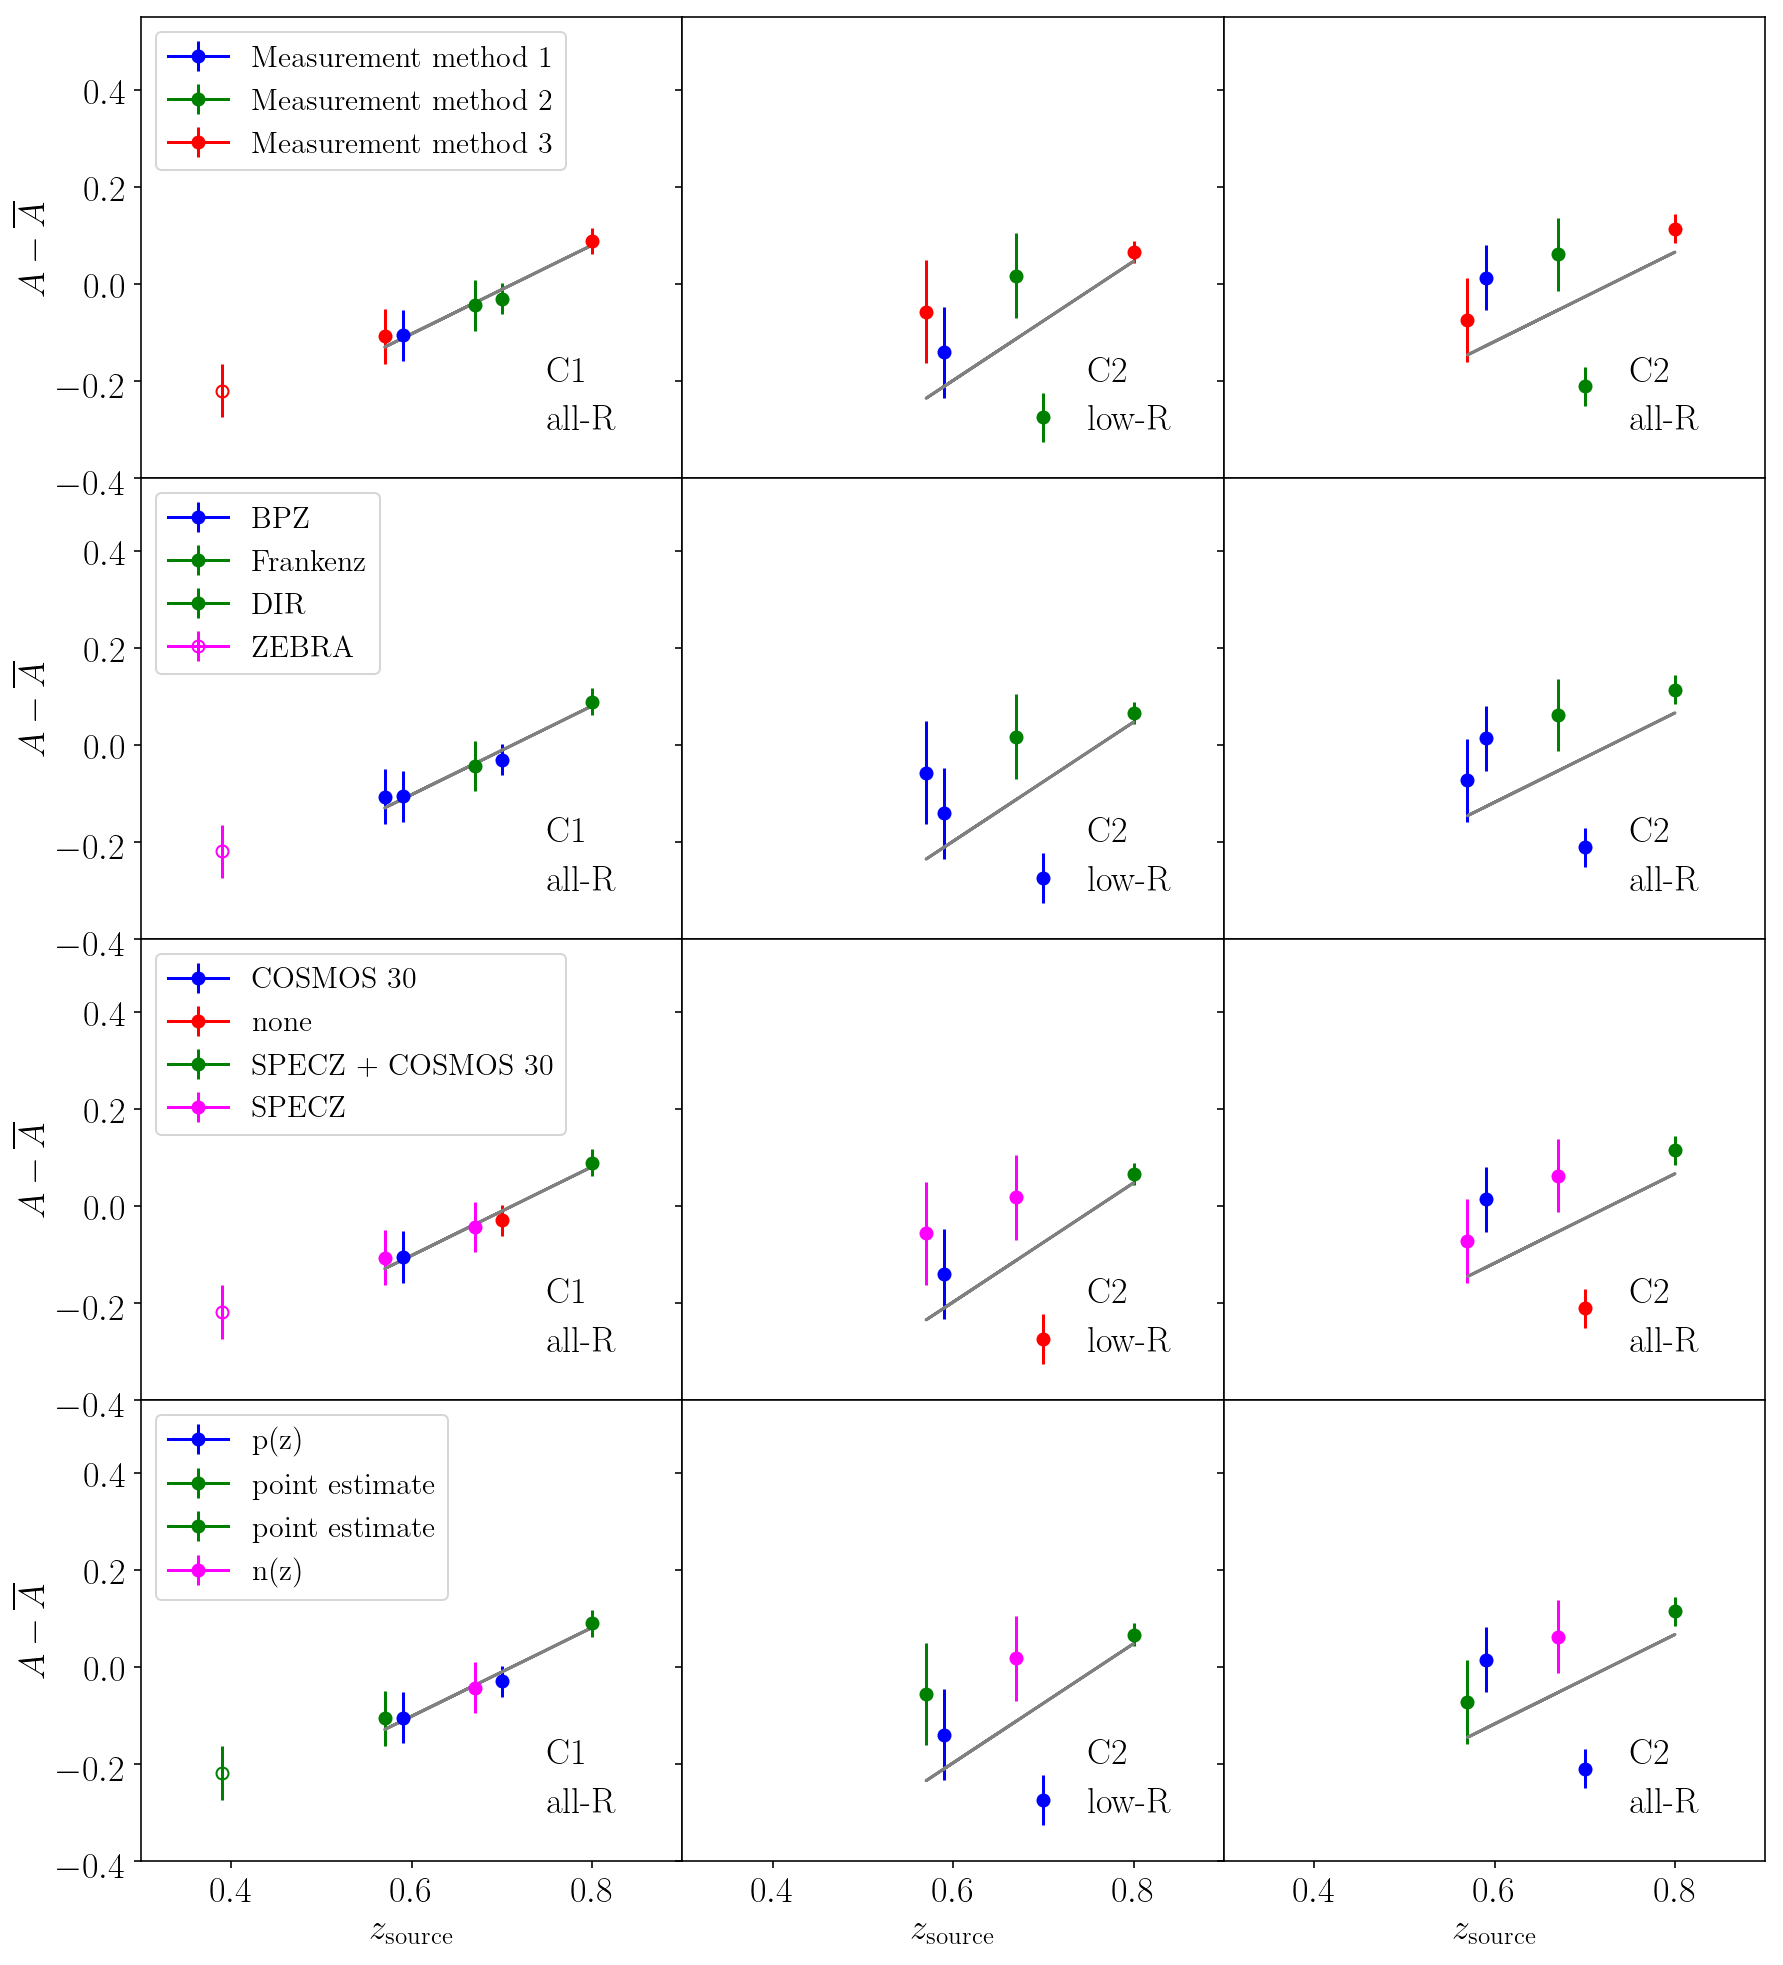

In [34]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one methodology type test
    for c in range(0,3):   # Each colums is one of the z detected bins

        ax = axes[r,c]
    
        # --- C1 and all-R ---
        if(c==0):
            newr = 2 # C1
            newc = 2 # all-R
        # --- C2 and low-R ---
        if(c==1):
            newr = 3 # C2
            newc = 0 # low-R
        # --- C2 and low-R ---
        if(c==2):
            newr = 3 # C2
            newc = 2 # all-R

        allamp = np.loadtxt(amparray_wtot[newr])
        allamp_errs = np.loadtxt(amparray_errs_wtot[newr])
        allamp_now = np.loadtxt(amparray_now[newr])
        allamp_errs_now = np.loadtxt(amparray_errs_now[newr])
  
        data=allamp[newc,:] # C determines which radial range
        errs=allamp_errs[newc,:]
        wht = 1.0/(allamp_errs[newc,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        
        sdssamp = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes.txt")
        sdssamperr = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes_errs.txt")
            
        # Main methodology
        if(r==0):
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
            ax.errorbar(zsource[0],allamp[newc,0]-meanamp,yerr=allamp_errs[newc,0],color="blue",label="Measurement method 1",marker='o')
            ax.errorbar(zsource[1],allamp[newc,1]-meanamp,yerr=allamp_errs[newc,1],color="green",label="Measurement method 2",marker='o') 
            ax.errorbar(zsource[2],allamp[newc,2]-meanamp,yerr=allamp_errs[newc,2],color="red",label="Measurement method 3",marker='o')
            ax.errorbar(zsource[3],allamp[newc,3]-meanamp,yerr=allamp_errs[newc,3],color="red",marker='o')
            ax.errorbar(zsource[4],allamp[newc,4]-meanamp,yerr=allamp_errs[newc,4],color="green",marker='o')
            if(c==0):
                ax.errorbar(zsource[5],sdssamp[newc]-meanamp,yerr=sdssamperr[newc],color="red",marker='o',fillstyle='none') 

        # Z-name
        if(r==1):
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
            
            ax.errorbar(zsource[0],allamp[newc,0]-meanamp,yerr=allamp_errs[newc,0],color="blue",label="BPZ",marker='o') #DES
            ax.errorbar(zsource[1],allamp[newc,1]-meanamp,yerr=allamp_errs[newc,1],color="blue",marker='o') #CFHT
            ax.errorbar(zsource[2],allamp[newc,2]-meanamp,yerr=allamp_errs[newc,2],color="green",label="Frankenz",marker='o') # HSC
            ax.errorbar(zsource[3],allamp[newc,3]-meanamp,yerr=allamp_errs[newc,3],color="blue",marker='o') # CS82
            ax.errorbar(zsource[4],allamp[newc,4]-meanamp,yerr=allamp_errs[newc,4],color="green",label='DIR',marker='o') #KIDS
            if(c==0):
                ax.errorbar(zsource[5],sdssamp[newc]-meanamp,yerr=sdssamperr[newc],color="magenta",label='ZEBRA',marker='o',fillstyle='none') #SDSS
            
        # Z-reference
        if(r==2):
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
            
            ax.errorbar(zsource[0],allamp[newc,0]-meanamp,yerr=allamp_errs[newc,0],color="blue",label="COSMOS 30",marker='o') #DES
            ax.errorbar(zsource[1],allamp[newc,1]-meanamp,yerr=allamp_errs[newc,1],color="red",label="none", marker='o') #CFHT
            ax.errorbar(zsource[2],allamp[newc,2]-meanamp,yerr=allamp_errs[newc,2],color="green",label="SPECZ + COSMOS 30",marker='o') # HSC
            ax.errorbar(zsource[3],allamp[newc,3]-meanamp,yerr=allamp_errs[newc,3],color="magenta",label="SPECZ",marker='o') # CS82
            ax.errorbar(zsource[4],allamp[newc,4]-meanamp,yerr=allamp_errs[newc,4],color="magenta",marker='o') #KIDS
            if(c==0):
                ax.errorbar(zsource[5],sdssamp[newc]-meanamp,yerr=sdssamperr[newc],color="magenta",marker='o',fillstyle='none') #SDSS
          
        # Sigma crit
        if(r==3):
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
            
            ax.errorbar(zsource[0],allamp[newc,0]-meanamp,yerr=allamp_errs[newc,0],color="blue",label="p(z)",marker='o') #DES
            ax.errorbar(zsource[1],allamp[newc,1]-meanamp,yerr=allamp_errs[newc,1],color="blue", marker='o') #CFHT
            ax.errorbar(zsource[2],allamp[newc,2]-meanamp,yerr=allamp_errs[newc,2],color="green",label="point estimate",marker='o') # HSC
            ax.errorbar(zsource[3],allamp[newc,3]-meanamp,yerr=allamp_errs[newc,3],color="green",label="point estimate",marker='o') # CS82
            ax.errorbar(zsource[4],allamp[newc,4]-meanamp,yerr=allamp_errs[newc,4],color="magenta",label='n(z)',marker='o') #KIDS
            if(c==0):
                ax.errorbar(zsource[5],sdssamp[newc]-meanamp,yerr=sdssamperr[newc],color="green",marker='o',fillstyle='none') #SDSS
        
        popt, pcov = optimize.curve_fit(linfunc, zsource[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
        perr = np.sqrt(np.diag(pcov))       
        p = np.poly1d(popt)
        ax.plot(zsource[:5],p(zsource[:5]),'gray')               
    
        if(c==0):
            ax.set_ylabel('$A-\overline{A}$')
            
        if(c==0):          
            ax.text(0.75, -0.2, 'C1', fontsize=18)
            ax.text(0.75, -0.3, 'all-R', fontsize=18)        
            
        if(c==1):          
            ax.text(0.75, -0.2, 'C2', fontsize=18)
            ax.text(0.75, -0.3, 'low-R', fontsize=18) 
            
        if(c==2):          
            ax.text(0.75, -0.2, 'C2', fontsize=18)
            ax.text(0.75, -0.3, 'all-R', fontsize=18)          
            
        if(r==3):
            ax.set_xlabel(r'$z_{source}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.3,0.9)
        ax.set_ylim(-0.4,0.55)
        
        if (c==0):
            ax.legend(fontsize=15,loc='upper left')   
            
        ax.set_xlabel(r'$z_{\rm source}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.3,0.9)
        ax.set_ylim(-0.4,0.55)          
                
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_zsource_methods.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# North versus South

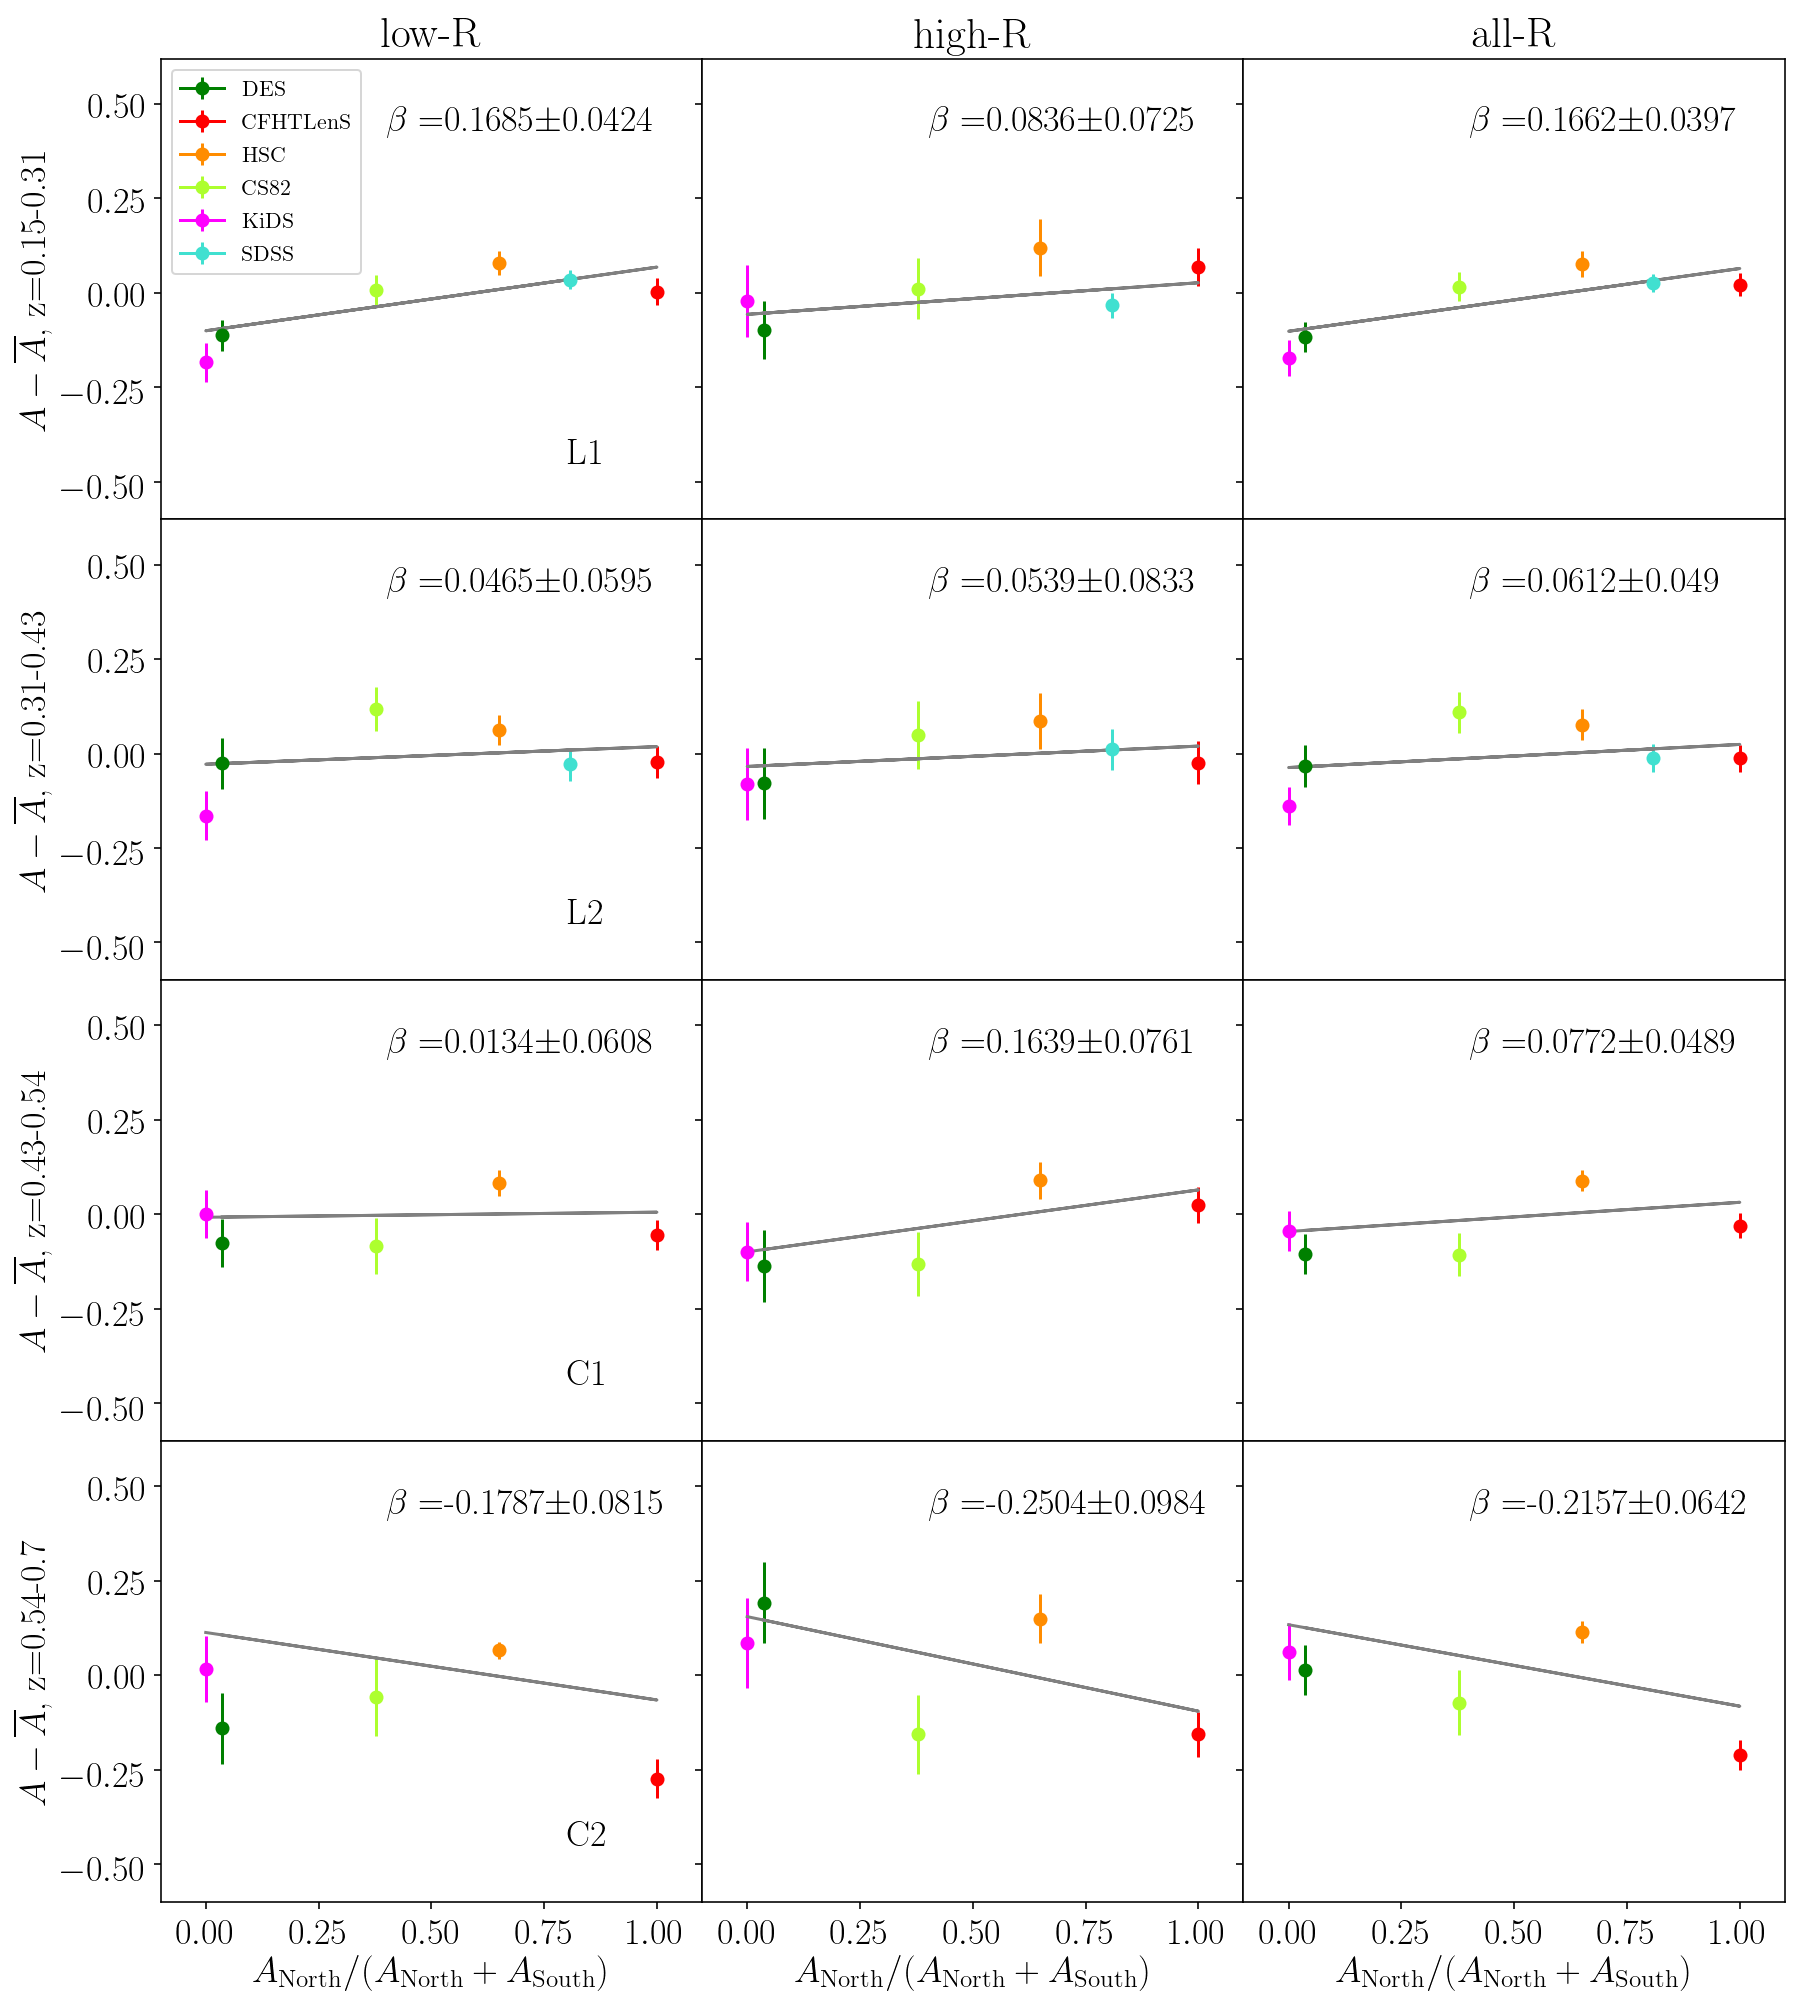

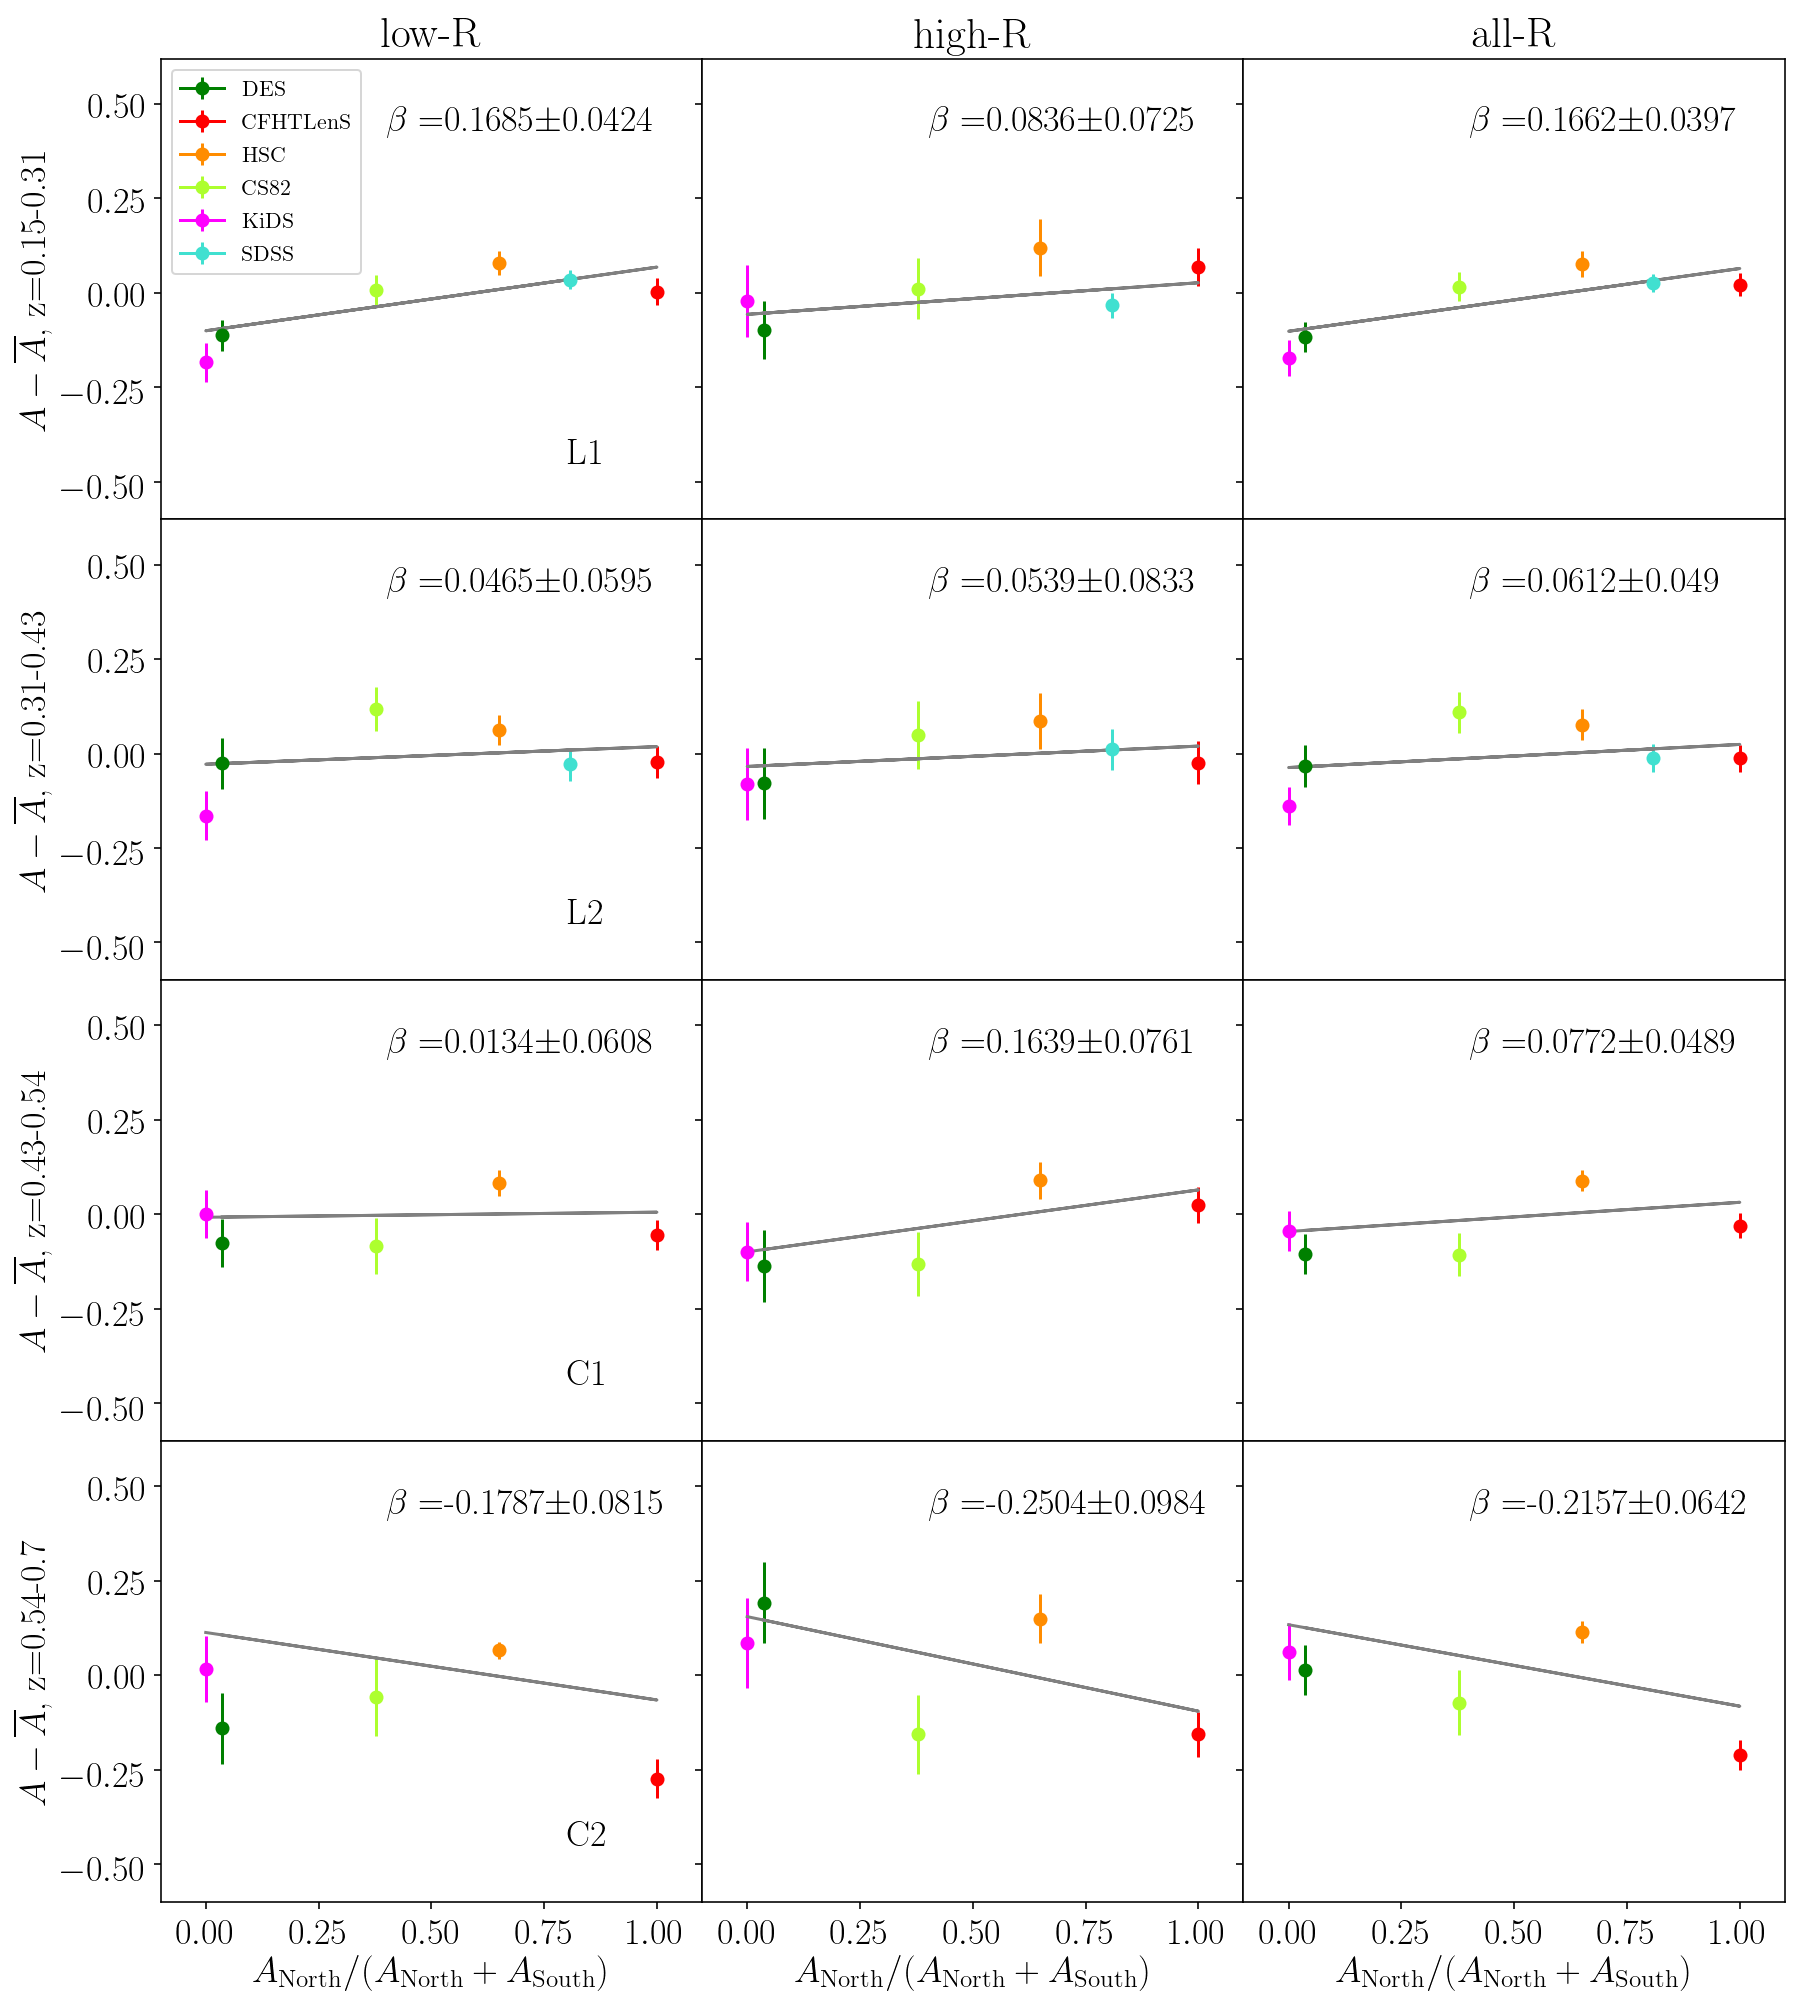

In [35]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(frac_area[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(frac_area[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(frac_area[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(frac_area[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(frac_area[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(frac_area[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
        
        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, frac_area[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(frac_area[:5],p(frac_area[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, frac_area , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(frac_area,p(frac_area),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        #print("")
        #print("data sample", r, "radial range",c)
        #print("beta",beta)
        #print("betaerr",betaerr)
        #print("beta sig",betasig)
        
        if (r==0):
            ax.text(0.4, 0.43, r'$\beta=$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
        
        if (r>=1):
            ax.text(0.4, 0.43, r'$\beta=$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
       
    
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(0.8, -0.45, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(0.8, -0.45, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(0.8, -0.45, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(0.8, -0.45, 'C2', fontsize=18) 
            
        if(r==3):
            ax.set_xlabel(r'$A_{\rm North}/(A_{\rm North}+A_{\rm South})$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(-0.1,1.1)
        ax.set_ylim(-0.6,0.62)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    

        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_northsouth.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# Estimates and reported Systematic Errors

------- Sample number 0
> sigma 0.09 minus 0.02 plus 0.06
 One and two sigma upper limits: 0.155 0.251
   Mean Stat error : 0.037
> sigma 0.04 minus 0.04 plus 0.06
 One and two sigma upper limits: 0.097 0.176
   Mean Stat error : 0.069
> sigma 0.09 minus 0.02 plus 0.06
 One and two sigma upper limits: 0.15 0.242
   Mean Stat error : 0.036
------- Sample number 1
> sigma 0.08 minus 0.03 plus 0.06
 One and two sigma upper limits: 0.138 0.23
   Mean Stat error : 0.053
------- Sample number 0
> sigma 0.09 minus 0.02 plus 0.06
 One and two sigma upper limits: 0.155 0.251
   Mean Stat error : 0.037
> sigma 0.04 minus 0.04 plus 0.06
 One and two sigma upper limits: 0.097 0.176
   Mean Stat error : 0.069
> sigma 0.09 minus 0.02 plus 0.06
 One and two sigma upper limits: 0.15 0.242
   Mean Stat error : 0.036
------- Sample number 1
> sigma 0.08 minus 0.03 plus 0.06
 One and two sigma upper limits: 0.138 0.23
   Mean Stat error : 0.053
0.06
 One and two sigma upper limits: 0.062 0.14200000000000

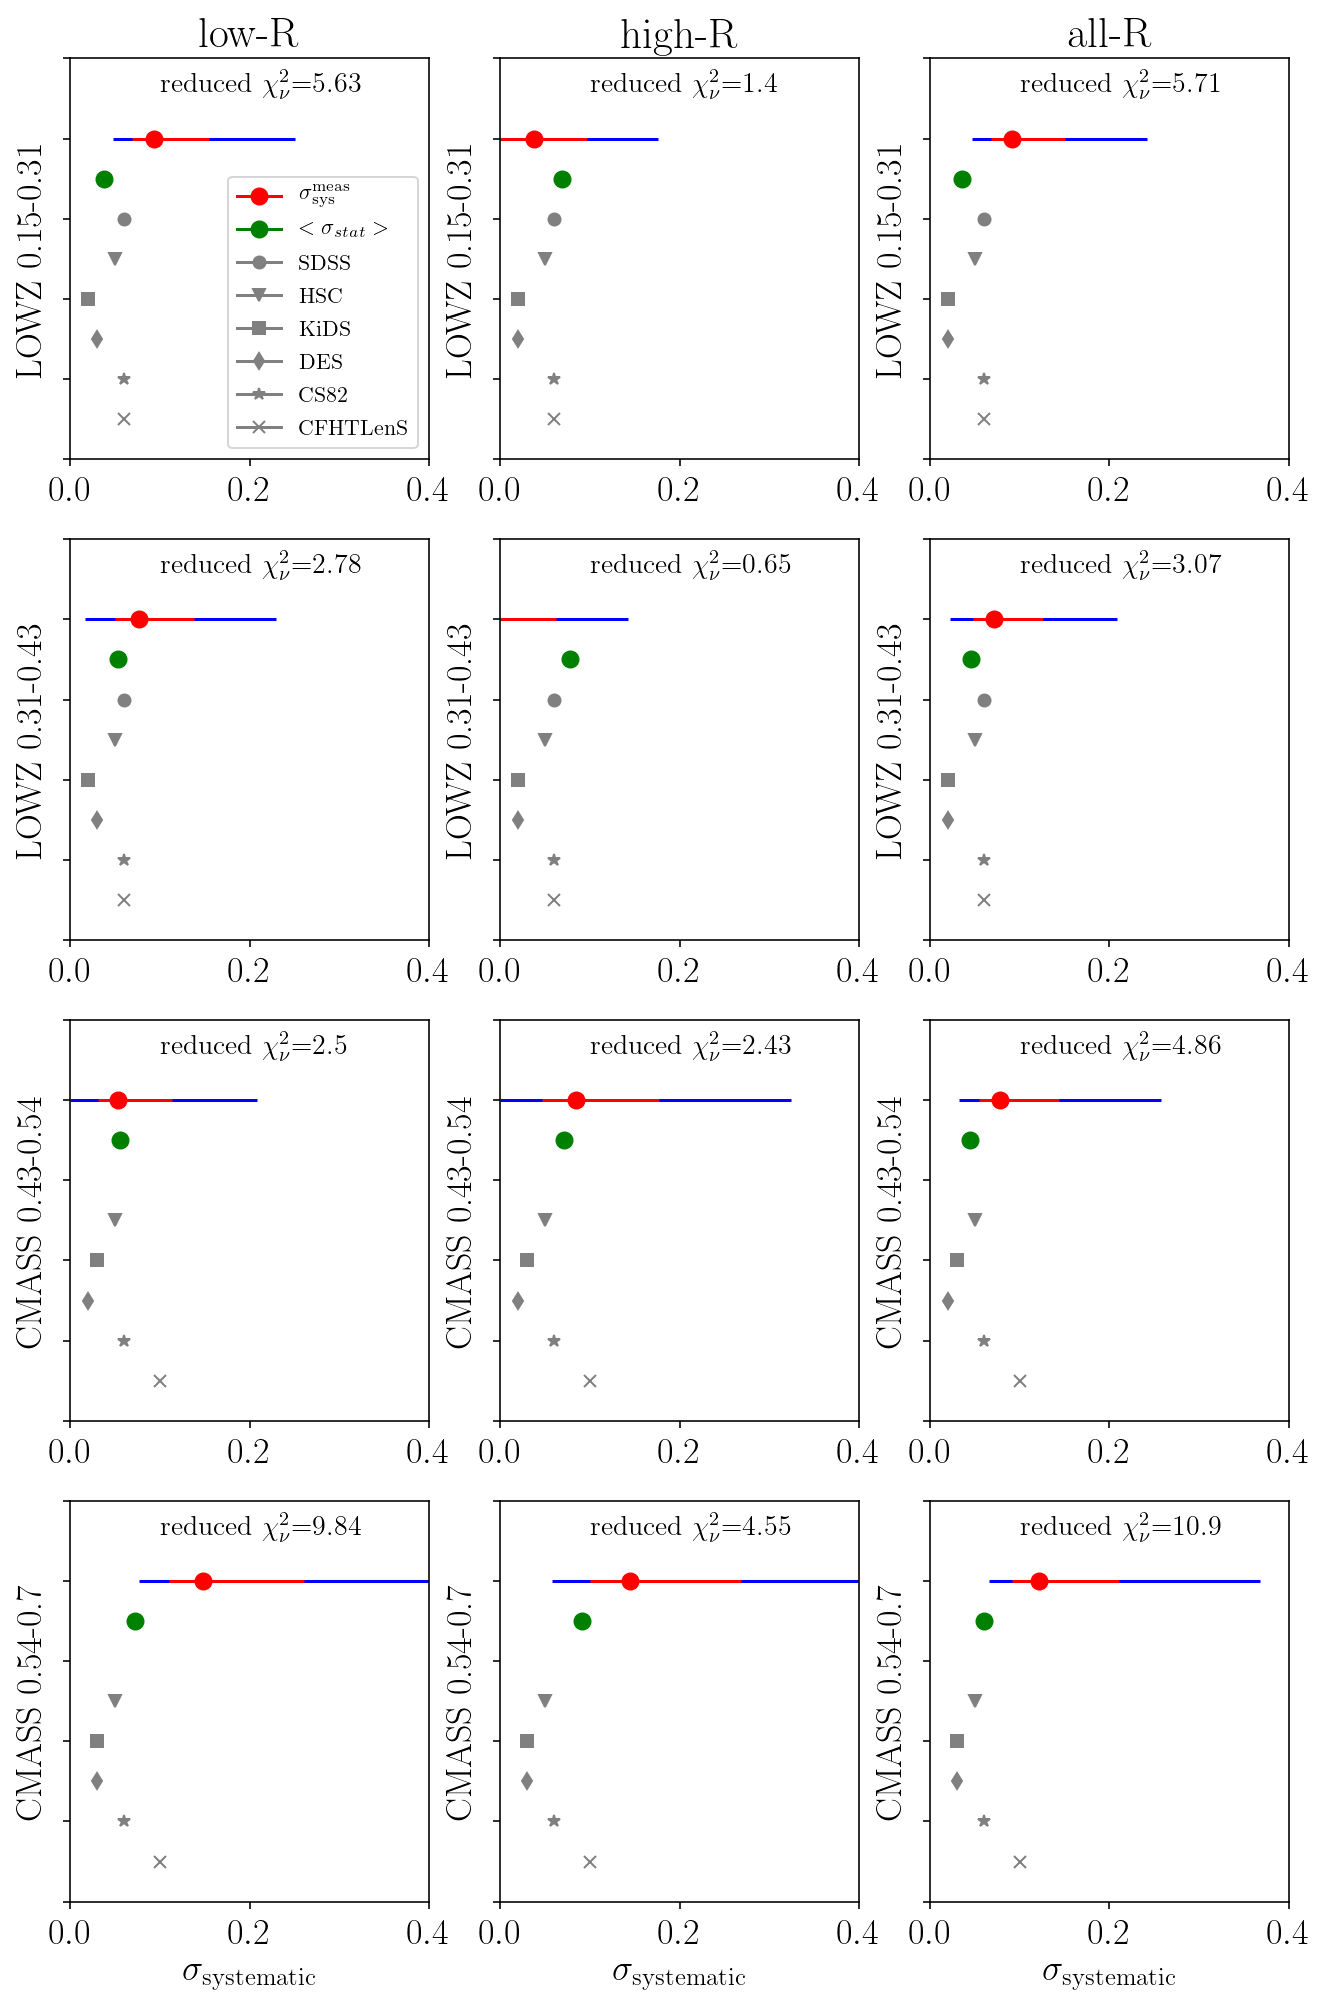

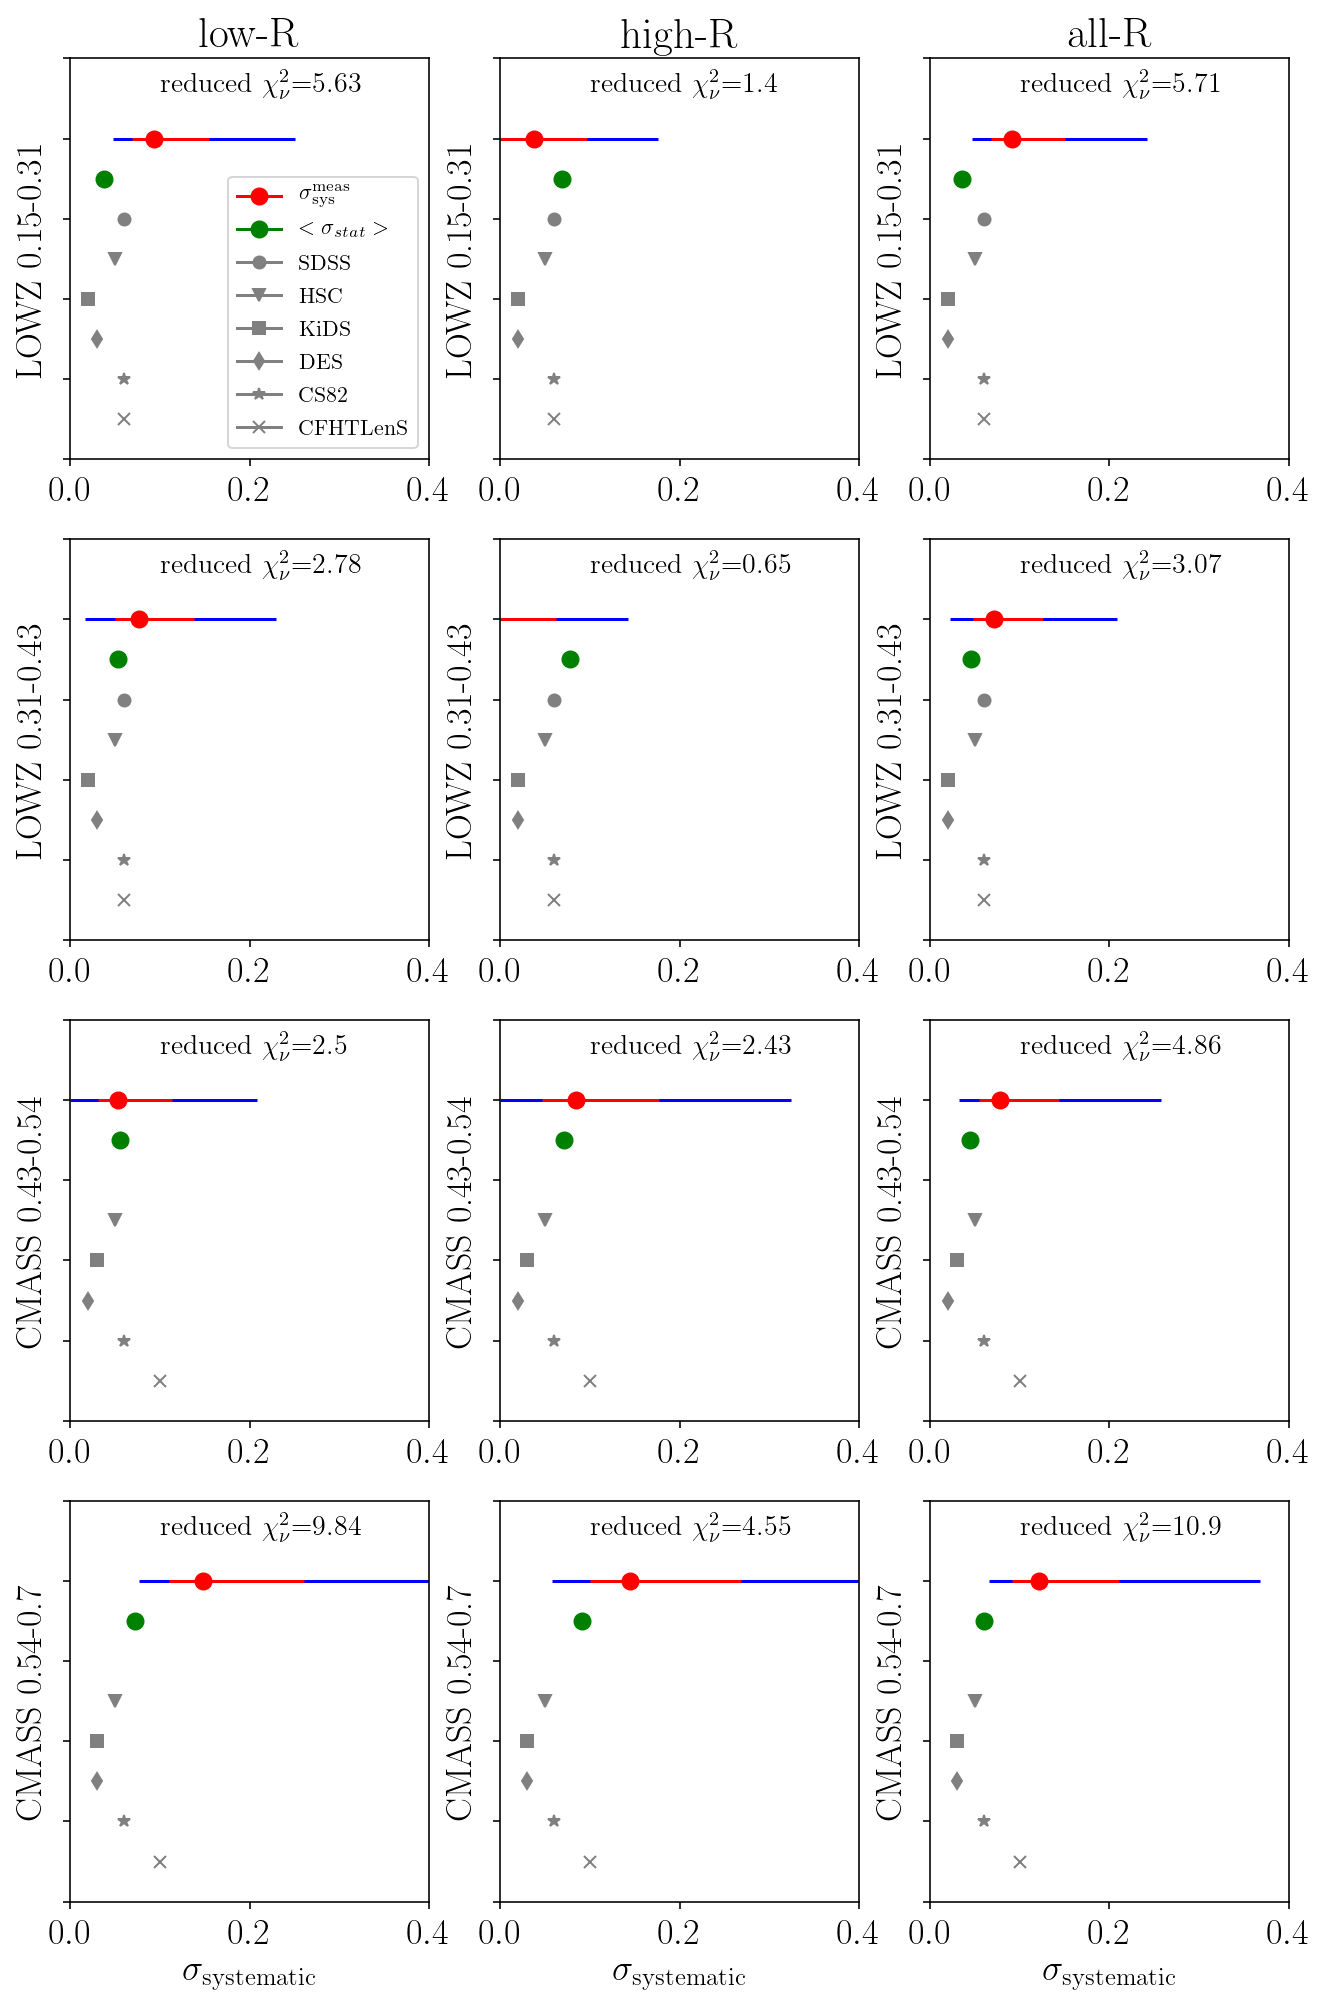

In [36]:
# Do Not Detrend for Nstar here

Fig, axes = plt.subplots(4,3,figsize=(9,16))

yt=[]
yt.append('LOWZ     0.15-0.31')
yt.append('LOWZ     0.31-0.43')
yt.append('CMASS     0.43-0.54')
yt.append('CMASS     0.54-0.7')

for r in range(0,4):       # One row is one data sample
    
    print('------- Sample number',r)
        
    #Reported sys err array
    # L1
    if(r==0):
        des_syserr=np.array([0.03,0.02,0.02])
        cfht_syserr=np.array([0.06,0.06,0.06])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.02,0.02,0.02])
        sdss_syserr=np.array([0.06,0.06,0.06])
        
    # L2
    if(r==1):
        des_syserr=np.array([0.03,0.02,0.02])
        cfht_syserr=np.array([0.06,0.06,0.06])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.02,0.02,0.02])
        sdss_syserr=np.array([0.06,0.06,0.06])
              
    # C1
    if(r==2):
        des_syserr=np.array([0.02,0.02,0.02])
        cfht_syserr=np.array([0.1,0.1,0.1])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.03,0.03,0.03])
        
    # C2
    if(r==3):
        des_syserr=np.array([0.03,0.03,0.03])
        cfht_syserr=np.array([0.1,0.1,0.1])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.03,0.03,0.03])
        
         
    for c in range(0,3):   # Each colums is a different radial range
                  
        #print('=======')
        ax = axes[r,c]
            
        # Read in the files
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])   
        
        # ----- DETREND HERE FOR NSTAR -------
        # this is where the detrending happens, in the last bin only
        # Comment out to get these numbers
        #if(r==3) :
            # DES, CFHT, HSC,CS82,KiDS,SDSS 
        #    allamp[c,0]=allamp[c,0]-des_nstardelta
        #    allamp[c,1]=allamp[c,1]-cfht_nstardelta
        #    allamp[c,2]=allamp[c,2]-hsc_nstardelta
        #    allamp[c,3]=allamp[c,3]-cs82_nstardelta
        #    allamp[c,4]=allamp[c,4]-kids_nstardelta       
            
        # Compute the weighted mean
        # inverse variance mean     
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht) # inverse variance mean
            
        n=len(data)
        data2 = np.zeros(n)
        errs2 = np.zeros(n) 
        
        #Compute reduced chi2
        chi2=0.0

        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        #print("Reduced chi2: ", rchi2)
    
        meanstaterr = np.mean(errs)
    
        # This is the Sigma SYS part
        # Sigmasys is value that sets chi=1
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
        
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root            
                
        # --------------------------     
        # Confidence interval for sigma_sys
        # this is a frequentist thing -- at what values of sigma_sys 
        # (including 0) do the differences we find between the surveys produce a chi^2 that is within the central
        # one and two sigma of the distribution
        #--------------------------

        ndof = len(data)-1 # should be chi^2-distributed with this ndof, since fitting for mean

        Dsigma_sys = np.arange(0,0.6,0.001) # range of sigma_sys to probe

        Dchisq = np.zeros(len(Dsigma_sys)) 
        # the chi^2 we would have if we included sigma_sys mutually independent systematic error
        for i in range(len(Dsigma_sys)):
            Dchisq[i] = np.sum((data-wmean)**2/(errs**2+(Dsigma_sys[i])**2))
    
        # ---- 2 Sigma Limits -----
        # inverse of 1-CDF 
        xx=(1.0-0.95)/2.0 # 95 confidence
        # inverse survival function
        limits = scipy.stats.chi2.isf(q=[1.0-xx,xx],df=ndof)
        #print("95% confidence interval for chi^2 (in chi2 space) is", limits)

        # Confidene interval for the observed chi2
        ok ,= np.where(np.logical_and(Dchisq>limits[0],Dchisq<limits[1]))
 
        # Plot the errors
        # ok[-1] is like ok[n-1] and so gives the upper limit
        ax.hlines(8.0,Dsigma_sys[ok[0]] , Dsigma_sys[ok[-1]],color="blue")
        #print("95% confidence interval on sigma sys is",Dsigma_sys[ok[0]],Dsigma_sys[ok[-1]])
        twosiglim = Dsigma_sys[ok[-1]]
            
        # ---- 1 Sigma Limits -----
        # inverse of 1-CDF 
        xx=(1.0-0.68)/2.0 # 68 confidence
        # inverse survival function
        limits = scipy.stats.chi2.isf(q=[1.0-xx,xx],df=ndof)
        #print("68% confidence interval for chi^2 (in chi2 space) is", limits)

        # Confidene interval for the observed chi2
        ok ,= np.where(np.logical_and(Dchisq>limits[0],Dchisq<limits[1]))
 
        # Plot the errors
        # ok[-1] is like ok[n-1] and so gives the upper limit
        ax.hlines(8.0,Dsigma_sys[ok[0]] , Dsigma_sys[ok[-1]],color="red")
        #print("68% confidence interval on sigma sys is",Dsigma_sys[ok[0]],Dsigma_sys[ok[-1]])
        
        # To go in the Table :
        # Note: subtract of the middel value to get 1 sigma
        if (rchi2>1):
            print("> sigma", np.round(sigmasys,2),"minus",np.round(sigmasys-Dsigma_sys[ok[0]],2),"plus",np.round(Dsigma_sys[ok[-1]]-sigmasys,2))
        else :
            print(np.round(Dsigma_sys[ok[-1]],2))
        
        print(" One and two sigma upper limits:", Dsigma_sys[ok[-1]], twosiglim)
        
        # Bounds
        if (rchi2>1):
            # plot the values that makes chi2=1
            ax.plot(sigmasys,8.0,color="red",marker='o',markersize=8.0,label=r'$\sigma_{\rm sys}^{\rm meas}$')       

        ax.text(0.1, 9, r'reduced $\chi^2_{\nu}$='+str(np.round(rchi2, 2)), fontsize=14,fontweight="bold")
        
        ax.plot(meanstaterr,7.0,color="green",marker='o',markersize=8.0,label=r'$<\sigma_{stat}>$')     # Mean stat error   
        print("   Mean Stat error :",np.round(meanstaterr,3))
        
        
        if(r < 2):
            ax.plot(sdss_syserr[c],6.0,color="grey",marker='o',label='SDSS')  
            
        # Plot the reported systematic errors
        ax.plot(hsc_syserr[c],5.0,color="grey",marker='v',label='HSC')    #HSC
        ax.plot(kids_syserr[c],4.0,color="grey",marker='s',label='KiDS')   #KIDS
        ax.plot(des_syserr[c],3.0,color="grey",marker='d',label='DES')    #DES
        ax.plot(cs82_syserr[c],2.0,color="grey",marker='*',label='CS82')     #CS82
        ax.plot(cfht_syserr[c],1.0,color="grey",marker='x',label='CFHTLenS')  #CFHTLENS  
            
        ax.yaxis.tick_left()      
        ax.set_yticklabels([])
        ax.set_ylabel(yt[r])

        ax.set_xlim(0, 0.4)

        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='lower right')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")
                
        if (r < 2):
            ax.set_ylim(0, 10.0)
        else:
            ax.set_ylim(0, 10.0) 
            
        # With SDSS
        #if (c==2 and r<2): 
        #    ax.yaxis.tick_right()
        #    plt.yticks(np.arange(0, 10, 1)) 
        #    ax.set_yticklabels([".","CFHTLenS", "CS82", "DES" ,"KiDS", "HSC", "SDSS",".","."])           
        #if (c==2 and r>1): 
            #ax.yaxis.tick_right()
            #ax.set_yticklabels(["","CFHTLenS", "CS82", "DES" ,"KiDS", "HSC"])
        if (r==3):
            ax.set_xlabel(r'$\sigma_{\rm systematic}$')
            
        #-------------------------------------------------------
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)
filename="./Figures/sigma_sys_compare"+str(weight_type)+".pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# without CFHTLenS

In [37]:
allamp = np.loadtxt(amparray_wtot[r])
allamp

array([[0.768 , 0.6341, 0.9745, 0.852 , 0.9261],
       [1.0509, 0.7025, 1.0078, 0.7017, 0.9426],
       [0.8909, 0.6664, 0.9915, 0.8041, 0.9392]])

array([[0.768 , 0.6341, 0.9745, 0.852 , 0.9261],
       [1.0509, 0.7025, 1.0078, 0.7017, 0.9426],
       [0.8909, 0.6664, 0.9915, 0.8041, 0.9392]])

---------------------
With CFHTLenS Removed
------- Sample number 2
> sigma 0.07 minus 0.03 plus 0.09
 One and two sigma upper limits: 0.16 0.335
   Mean Stat error : 0.06
> sigma 0.1 minus 0.04 plus 0.12
 One and two sigma upper limits: 0.223 0.461
   Mean Stat error : 0.077
> sigma 0.1 minus 0.03 plus 0.1
 One and two sigma upper limits: 0.20400000000000001 0.41100000000000003
   Mean Stat error : 0.047
------- Sample number 3
> sigma 0.08 minus 0.06 plus 0.14
 One and two sigma upper limits: 0.217 0.458
   Mean Stat error : 0.077
> sigma 0.12 minus 0.06 plus 0.16
---------------------
With CFHTLenS Removed
------- Sample number 2
> sigma 0.07 minus 0.03 plus 0.09
 One and two sigma upper limits: 0.16 0.335
   Mean Stat error : 0.06
> sigma 0.1 minus 0.04 plus 0.12
 One and two sigma upper limits: 0.223 0.461
   Mean Stat error : 0.077
> sigma 0.1 minus 0.03 plus 0.1
 One and two sigma upper limits: 0.20400000000000001 0.41100000000000003
   Mean Stat error : 0.047
------- Sample num

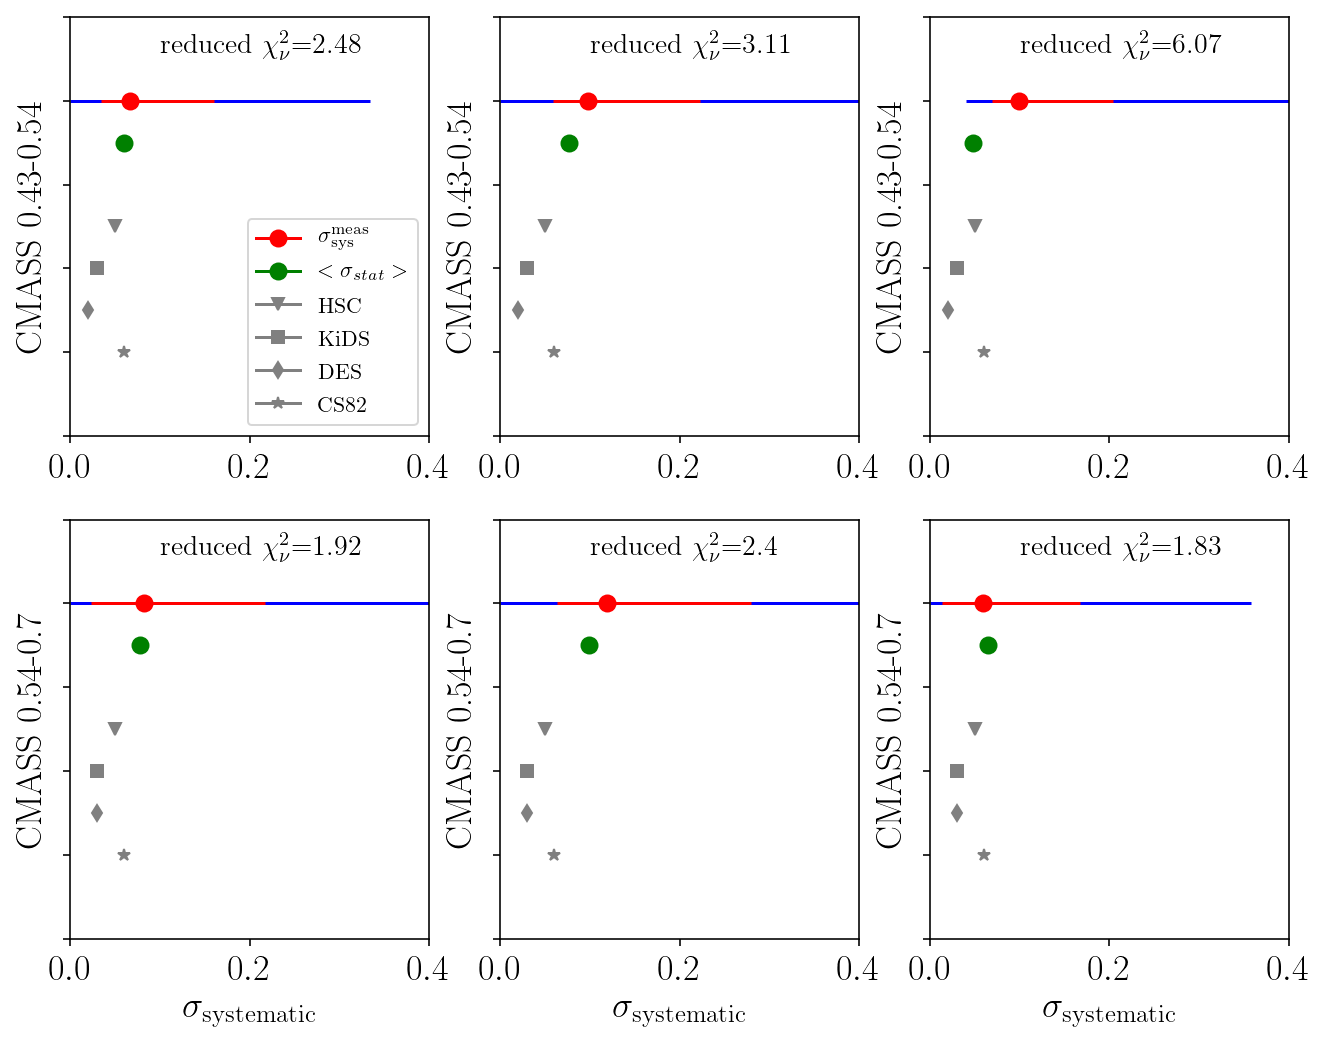

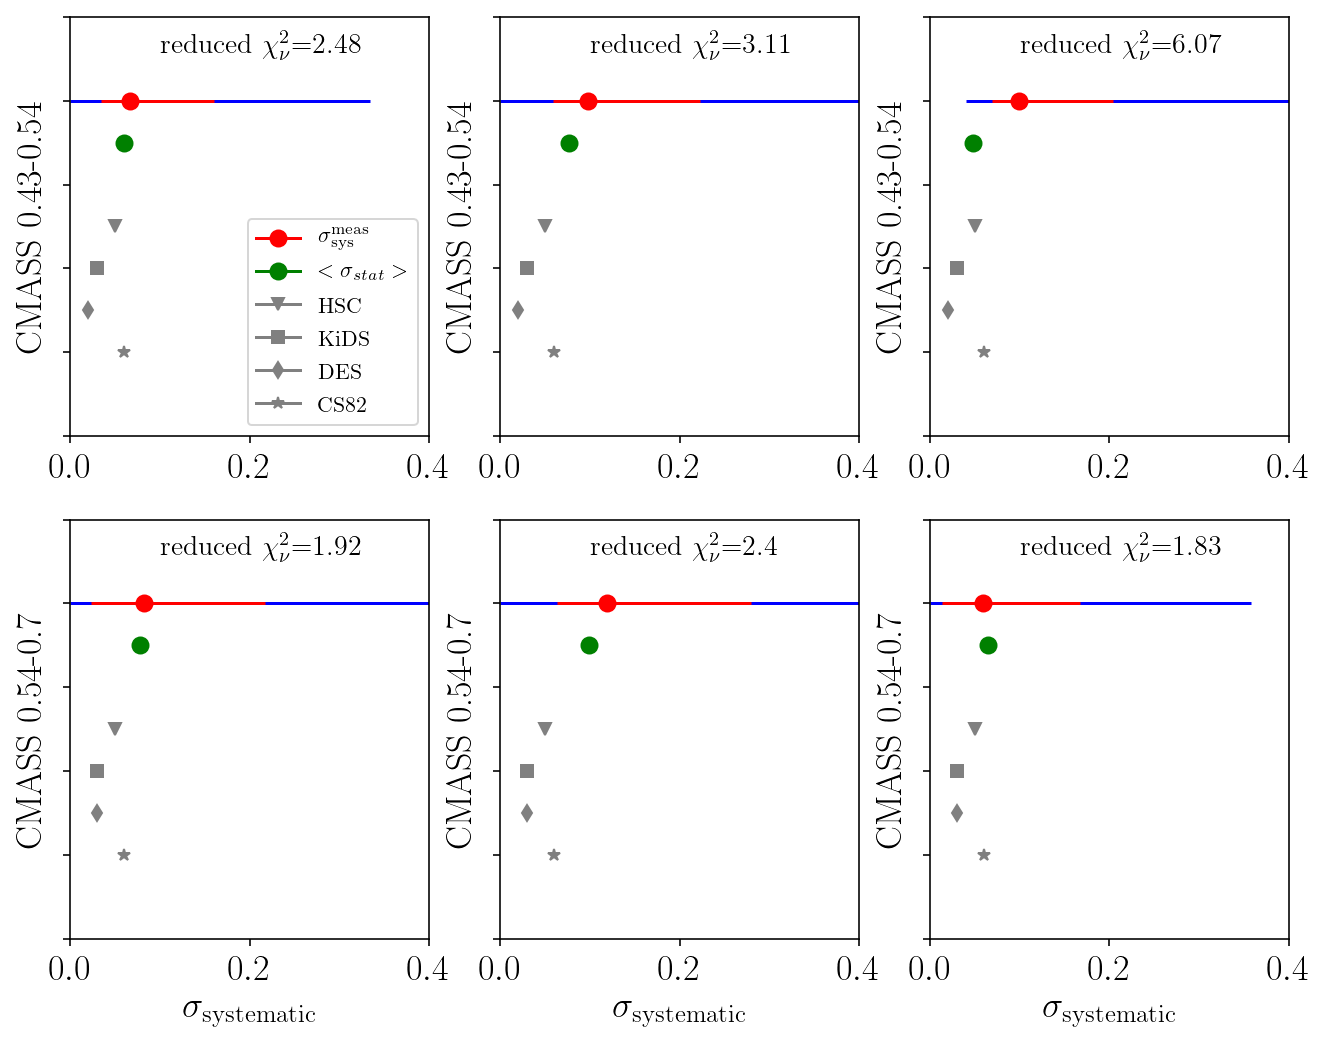

In [38]:
Fig, axes = plt.subplots(2,3,figsize=(9,8))

yt=[]
yt.append('LOWZ     0.15-0.31')
yt.append('LOWZ     0.31-0.43')
yt.append('CMASS     0.43-0.54')
yt.append('CMASS     0.54-0.7')

print('---------------------')
print('With CFHTLenS Removed')
    
for r in range(2,4):       # One row is one data sample
    
    print('------- Sample number',r)
        
    #Reported sys err array
    # L1
    if(r==0):
        des_syserr=np.array([0.03,0.02,0.02])
        cfht_syserr=np.array([0.06,0.06,0.06])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.02,0.02,0.02])
        sdss_syserr=np.array([0.06,0.06,0.06])
        
    # L2
    if(r==1):
        des_syserr=np.array([0.03,0.02,0.02])
        cfht_syserr=np.array([0.06,0.06,0.06])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.02,0.02,0.02])
        sdss_syserr=np.array([0.06,0.06,0.06])
              
    # C1
    if(r==2):
        des_syserr=np.array([0.02,0.02,0.02])
        cfht_syserr=np.array([0.1,0.1,0.1])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.03,0.03,0.03])
        
    # C2
    if(r==3):
        des_syserr=np.array([0.03,0.03,0.03])
        cfht_syserr=np.array([0.1,0.1,0.1])
        hsc_syserr=np.array([0.05,0.05,0.05])
        cs82_syserr=np.array([0.06,0.06,0.06])
        kids_syserr=np.array([0.03,0.03,0.03])
        
         
    for c in range(0,3):   # Each colums is a different radial range
                  
        #print('=======')
        h=r-2
        ax = axes[h,c]
            
        # Read in the files
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])   
        
        # Remove CFHTLENS HERE
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        data=np.array([allamp[c,0],allamp[c,2],allamp[c,3],allamp[c,4]])
        errs=np.array([allamp_errs[c,0],allamp_errs[c,2],allamp_errs[c,3],allamp_errs[c,4]]) 
        n=len(data)
        wht = np.zeros(n)
        for i in range(0, n):
            wht[i]= 1.0/(errs[i]**2)
        
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht) # inverse variance mean

        data2 = np.zeros(n)
        errs2 = np.zeros(n) 
        
        #Compute reduced chi2
        chi2=0.0

        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        #print("Reduced chi2: ", rchi2)
    
        meanstaterr = np.mean(errs)
    
        # This is the Sigma SYS part
        # Sigmasys is value that sets chi=1
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
        
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root            
                
        # --------------------------     
        # Confidence interval for sigma_sys
        # this is a frequentist thing -- at what values of sigma_sys 
        # (including 0) do the differences we find between the surveys produce a chi^2 that is within the central
        # one and two sigma of the distribution
        #--------------------------

        ndof = len(data)-1 # should be chi^2-distributed with this ndof, since fitting for mean

        Dsigma_sys = np.arange(0,0.6,0.001) # range of sigma_sys to probe

        Dchisq = np.zeros(len(Dsigma_sys)) 
        # the chi^2 we would have if we included sigma_sys mutually independent systematic error
        for i in range(len(Dsigma_sys)):
            Dchisq[i] = np.sum((data-wmean)**2/(errs**2+(Dsigma_sys[i])**2))
    
        # ---- 2 Sigma Limits -----
        # inverse of 1-CDF 
        xx=(1.0-0.95)/2.0 # 95 confidence
        # inverse survival function
        limits = scipy.stats.chi2.isf(q=[1.0-xx,xx],df=ndof)
        #print("95% confidence interval for chi^2 (in chi2 space) is", limits)

        # Confidene interval for the observed chi2
        ok ,= np.where(np.logical_and(Dchisq>limits[0],Dchisq<limits[1]))
 
        # Plot the errors
        # ok[-1] is like ok[n-1] and so gives the upper limit
        ax.hlines(8.0,Dsigma_sys[ok[0]] , Dsigma_sys[ok[-1]],color="blue")
        #print("95% confidence interval on sigma sys is",Dsigma_sys[ok[0]],Dsigma_sys[ok[-1]])
        twosiglim = Dsigma_sys[ok[-1]]
            
        # ---- 1 Sigma Limits -----
        # inverse of 1-CDF 
        xx=(1.0-0.68)/2.0 # 68 confidence
        # inverse survival function
        limits = scipy.stats.chi2.isf(q=[1.0-xx,xx],df=ndof)
        #print("68% confidence interval for chi^2 (in chi2 space) is", limits)

        # Confidene interval for the observed chi2
        ok ,= np.where(np.logical_and(Dchisq>limits[0],Dchisq<limits[1]))
 
        # Plot the errors
        # ok[-1] is like ok[n-1] and so gives the upper limit
        ax.hlines(8.0,Dsigma_sys[ok[0]] , Dsigma_sys[ok[-1]],color="red")
        #print("68% confidence interval on sigma sys is",Dsigma_sys[ok[0]],Dsigma_sys[ok[-1]])
        
        # To go in the Table :
        # Note: subtract of the middel value to get 1 sigma
        if (rchi2>1):
            print("> sigma", np.round(sigmasys,2),"minus",np.round(sigmasys-Dsigma_sys[ok[0]],2),"plus",np.round(Dsigma_sys[ok[-1]]-sigmasys,2))
        else :
            print(np.round(Dsigma_sys[ok[-1]],2))
        
        print(" One and two sigma upper limits:", Dsigma_sys[ok[-1]], twosiglim)
        
        # Bounds
        if (rchi2>1):
            # plot the values that makes chi2=1
            ax.plot(sigmasys,8.0,color="red",marker='o',markersize=8.0,label=r'$\sigma_{\rm sys}^{\rm meas}$')       

        ax.text(0.1, 9, r'reduced $\chi^2_{\nu}$='+str(np.round(rchi2, 2)), fontsize=14,fontweight="bold")
        
        ax.plot(meanstaterr,7.0,color="green",marker='o',markersize=8.0,label=r'$<\sigma_{stat}>$')     # Mean stat error   
        print("   Mean Stat error :",np.round(meanstaterr,3))
        
        
        if(r < 2):
            ax.plot(sdss_syserr[c],6.0,color="grey",marker='o',label='SDSS')  
            
        # Plot the reported systematic errors
        ax.plot(hsc_syserr[c],5.0,color="grey",marker='v',label='HSC')    #HSC
        ax.plot(kids_syserr[c],4.0,color="grey",marker='s',label='KiDS')   #KIDS
        ax.plot(des_syserr[c],3.0,color="grey",marker='d',label='DES')    #DES
        ax.plot(cs82_syserr[c],2.0,color="grey",marker='*',label='CS82')     #CS82
        #ax.plot(cfht_syserr[c],1.0,color="grey",marker='x',label='CFHTLenS')  #CFHTLENS  
            
        ax.yaxis.tick_left()      
        ax.set_yticklabels([])
        ax.set_ylabel(yt[r])

        ax.set_xlim(0, 0.4)

        if (r==2 and c==0):
            ax.legend(fontsize=11,loc='lower right')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")
                
        if (r < 2):
            ax.set_ylim(0, 10.0)
        else:
            ax.set_ylim(0, 10.0) 
            
        # With SDSS
        #if (c==2 and r<2): 
        #    ax.yaxis.tick_right()
        #    plt.yticks(np.arange(0, 10, 1)) 
        #    ax.set_yticklabels([".","CFHTLenS", "CS82", "DES" ,"KiDS", "HSC", "SDSS",".","."])           
        #if (c==2 and r>1): 
            #ax.yaxis.tick_right()
            #ax.set_yticklabels(["","CFHTLenS", "CS82", "DES" ,"KiDS", "HSC"])
        if (r==3):
            ax.set_xlabel(r'$\sigma_{\rm systematic}$')
            
        #-------------------------------------------------------
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)
filename="./Figures/sigma_sys_compare"+str(weight_type)+"_nocfhtlens.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# Make the Amplitude Multi panel figure

0 0
Reduced chi2:  5.632659945283376
0 1
Reduced chi2:  1.4009543633731942
0 2
Reduced chi2:  5.705033901917352
1 0
Reduced chi2:  2.778861468666316
1 1
Reduced chi2:  0.6521365947854917
1 2
Reduced chi2:  3.069063028407494
2 0
Reduced chi2:  2.4954500619908093
0 0
Reduced chi2:  5.632659945283376
0 1
Reduced chi2:  1.4009543633731942
0 2
Reduced chi2:  5.705033901917352
1 0
Reduced chi2:  2.778861468666316
1 1
Reduced chi2:  0.6521365947854917
1 2
Reduced chi2:  3.069063028407494
2 0
Reduced chi2:  2.4954500619908093
2 1
Reduced chi2:  2.4279968016585967
2 2
Reduced chi2:  4.861354755385338
3 0
Reduced chi2:  9.837314033159876
3 1
Reduced chi2:  4.551230310784808
3 2
Reduced chi2:  10.897045430010728
2 1
Reduced chi2:  2.4279968016585967
2 2
Reduced chi2:  4.861354755385338
3 0
Reduced chi2:  9.837314033159876
3 1
Reduced chi2:  4.551230310784808
3 2
Reduced chi2:  10.897045430010728


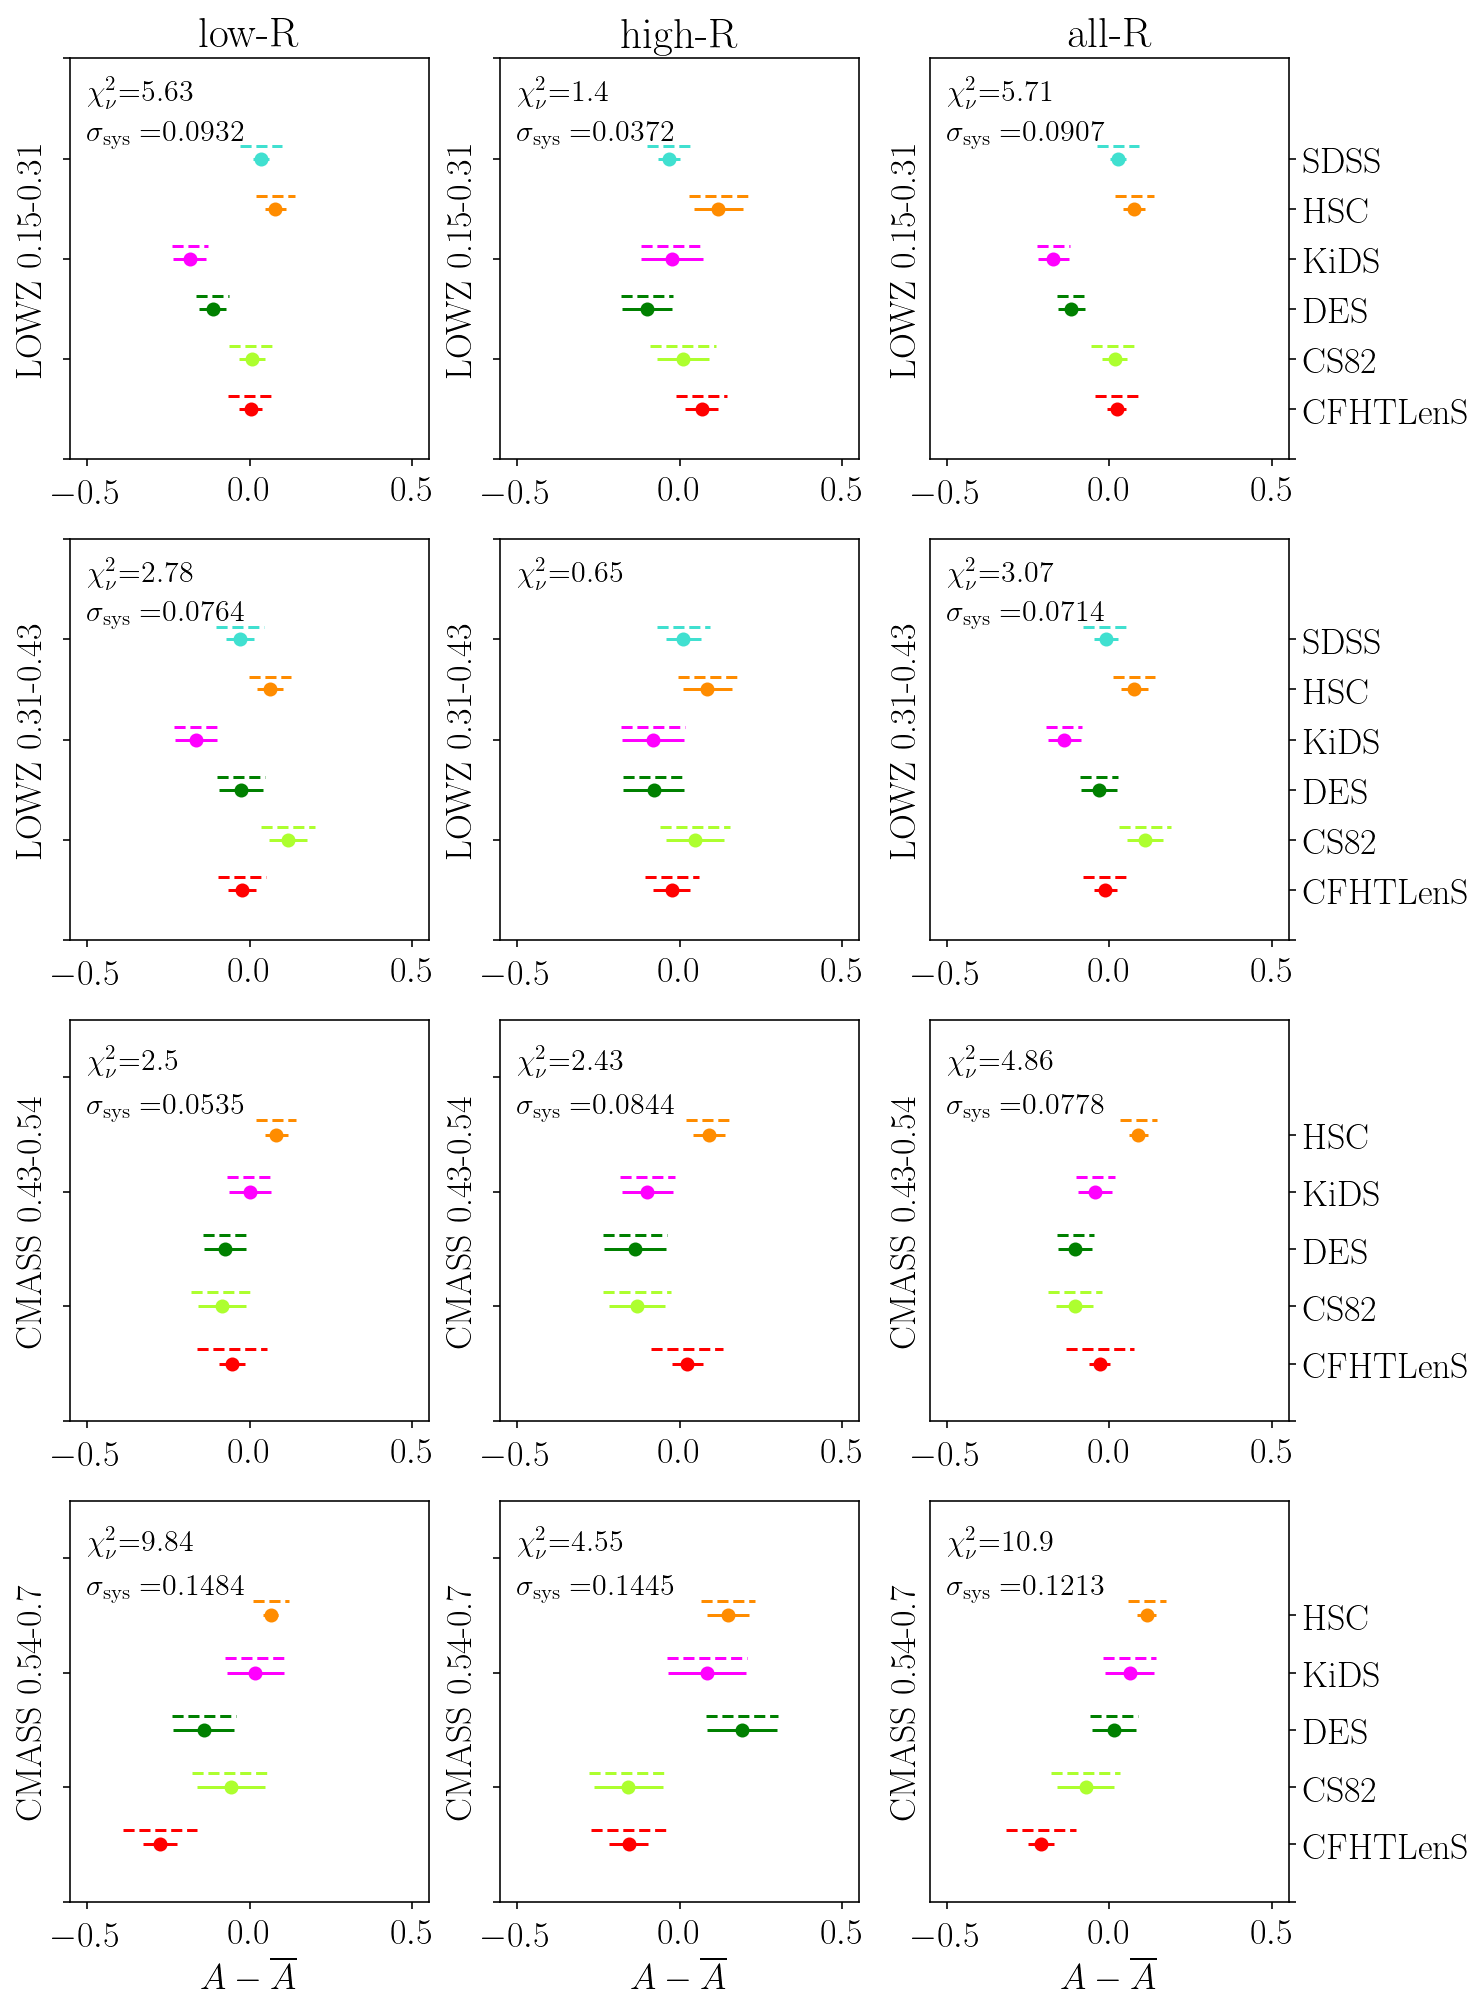

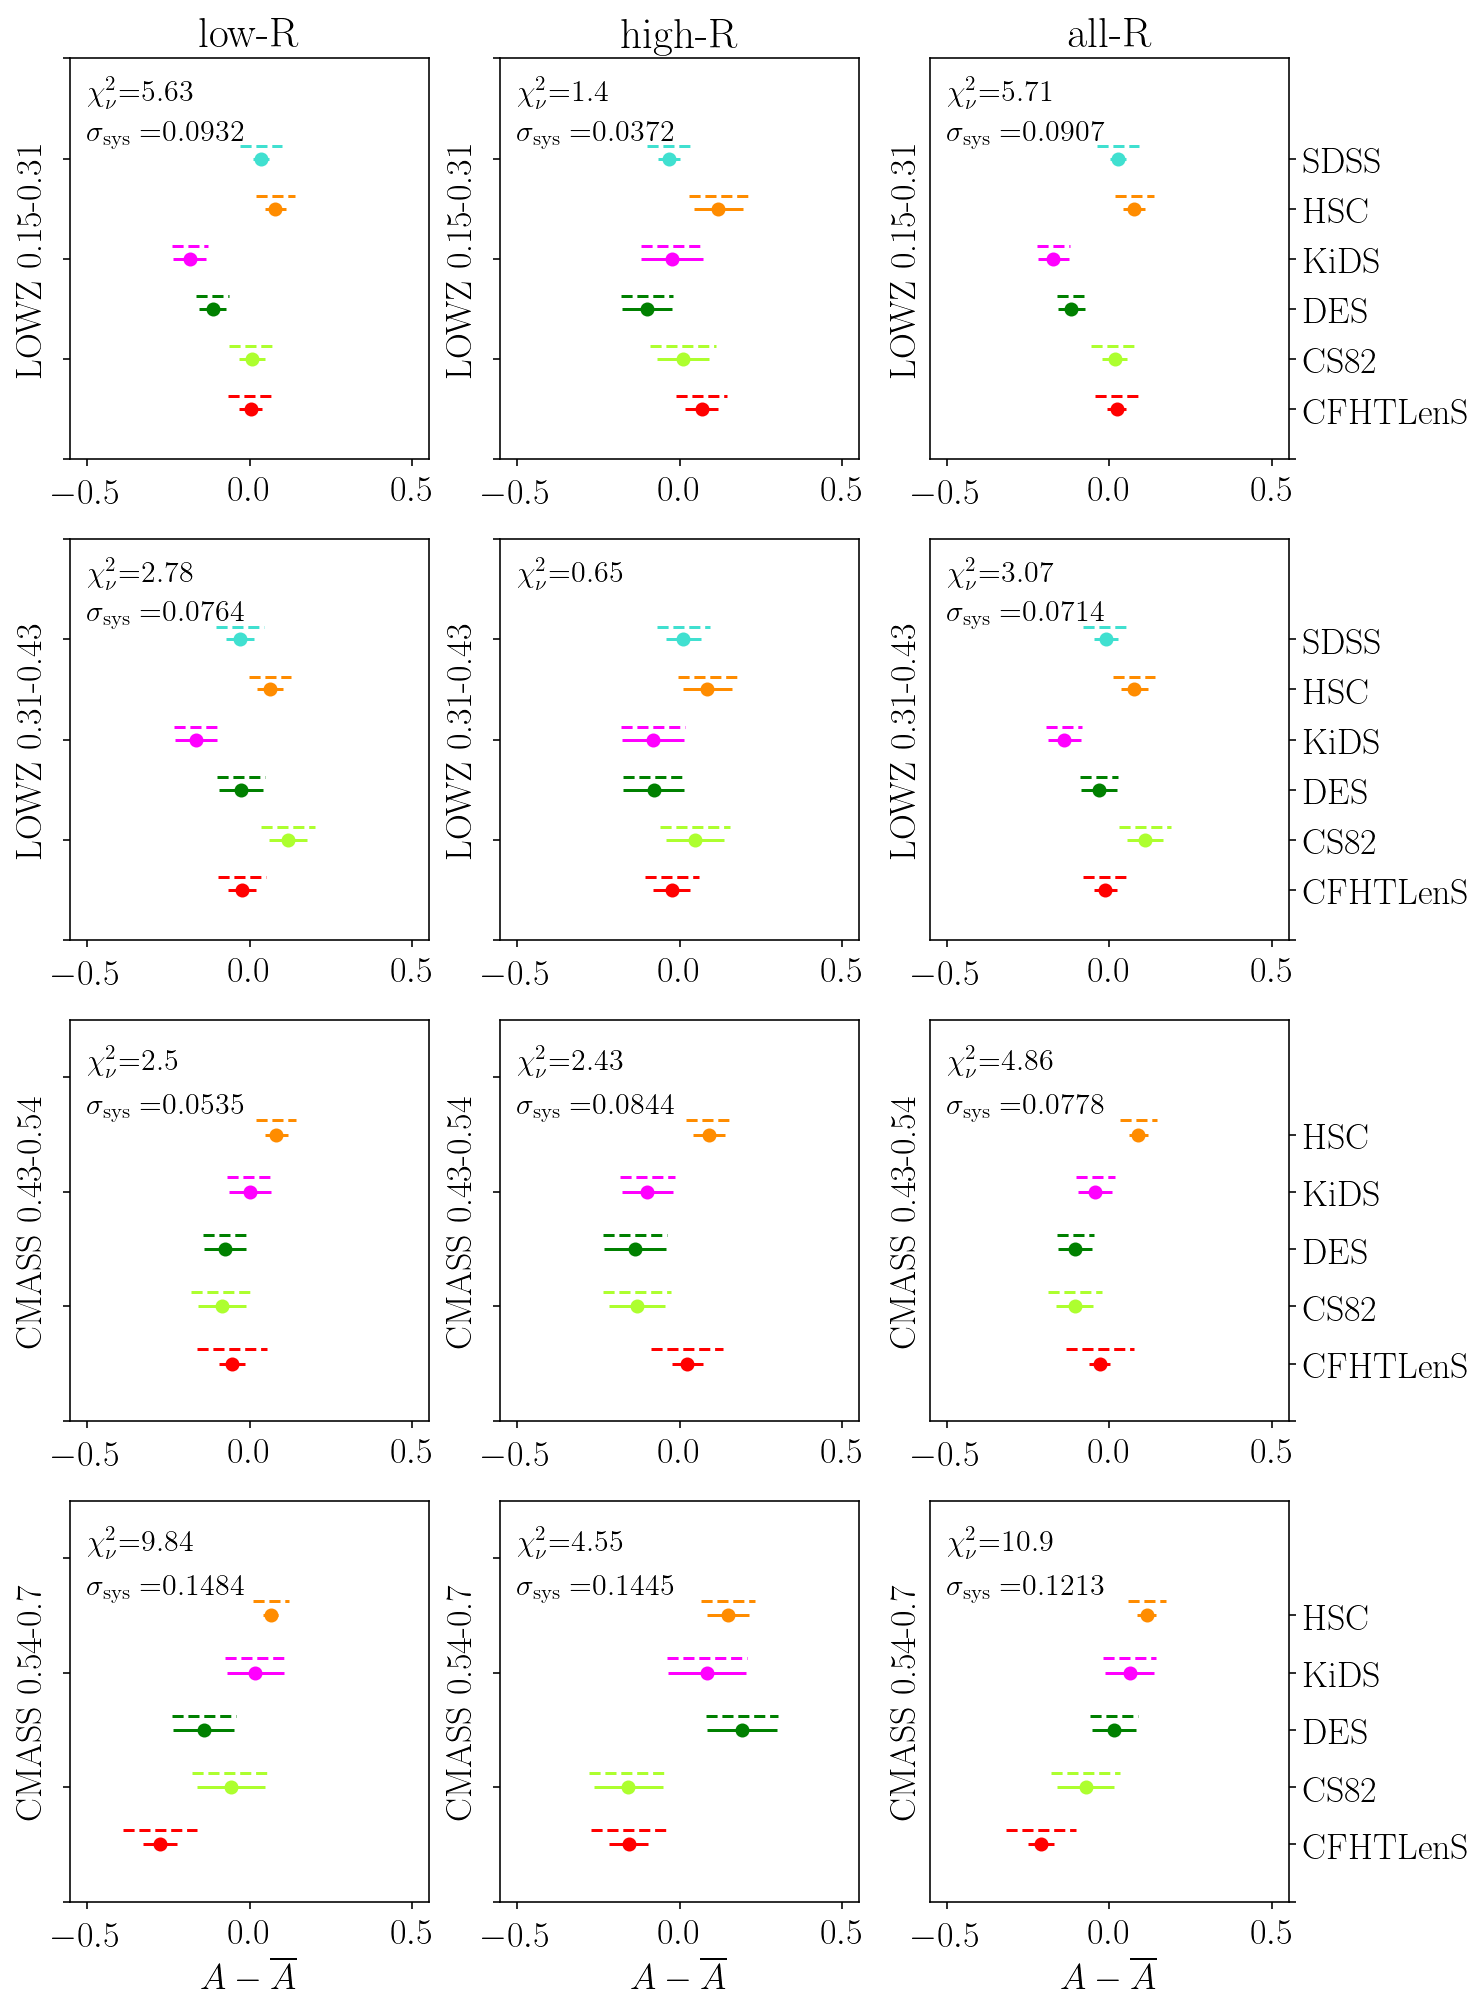

In [43]:
Fig, axes = plt.subplots(4,3,figsize=(9,16))

yt=[]
yt.append('LOWZ     0.15-0.31')
yt.append('LOWZ     0.31-0.43')
yt.append('CMASS     0.43-0.54')
yt.append('CMASS     0.54-0.7')

xmin=-0.55
xmax=0.55

for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        #Reported sys err array
        # L1
        if(r==0):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.06,0.06,0.06])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.02,0.02,0.02])
            sdss_syserr=np.array([0.06,0.06,0.06])
        
        # L2
        if(r==1):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.06,0.06,0.06])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.02,0.02,0.02])
            sdss_syserr=np.array([0.06,0.06,0.06])
              
        # C1
        if(r==2):
            des_syserr=np.array([0.02,0.02,0.02])
            cfht_syserr=np.array([0.1,0.1,0.1])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
        
        # C2
        if(r==3):
            des_syserr=np.array([0.03,0.03,0.03])
            cfht_syserr=np.array([0.1,0.1,0.1])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
        
        ax = axes[r,c]
            
        print(r,c)
        # Read in the files
           
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht)
            
        n=len(data)
        data2 = np.zeros(n)
        errs2 = np.zeros(n)
    
        w = np.zeros(n)
        for i in range(0, n):
            w[i]=1.0/(errs[i]**2)
        
        #Compute reduced chi2
        chi2=0.0
        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        print("Reduced chi2: ", rchi2)
    
        meanstaterr = np.mean(errs)
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root
            

        #-------------------------------------------------------
            
        # LOW R
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(allamp[c,0]-meanamp,3.0, xerr=allamp_errs[c,0],color="green",marker='o')      #DES
        ax.errorbar(allamp[c,1]-meanamp,1.0, xerr=allamp_errs[c,1],color="red",marker='o')         #CFHTLENS  
        ax.errorbar(allamp[c,2]-meanamp,5.0, xerr=allamp_errs[c,2],color="darkorange",marker='o')  #HSC 
        ax.errorbar(allamp[c,3]-meanamp,2.0, xerr=allamp_errs[c,3],color="greenyellow",marker='o') #CS82
        ax.errorbar(allamp[c,4]-meanamp,4.0, xerr=allamp_errs[c,4],color="magenta",marker='o')     #KIDS
                
        if(r < 2):
            ax.errorbar(allamp[c,5]-meanamp,6.0, xerr=allamp_errs[c,5],color="turquoise",marker='o')  #SDSS
            
        # Systematic error lines
        stot = np.sqrt(allamp_errs[c,0]**2 + des_syserr[c]**2)
        eb1=ax.errorbar(allamp[c,0]-meanamp,3.25, xerr=stot,color="green") 
        eb1[-1][0].set_linestyle('--')
        
        stot = np.sqrt(allamp_errs[c,1]**2 + cfht_syserr[c]**2)
        eb1=ax.errorbar(allamp[c,1]-meanamp,1.25, xerr=stot,color="red") 
        eb1[-1][0].set_linestyle('--')
        
        stot = np.sqrt(allamp_errs[c,2]**2 + hsc_syserr[c]**2)
        eb1=ax.errorbar(allamp[c,2]-meanamp,5.25, xerr=stot,color="darkorange") 
        eb1[-1][0].set_linestyle('--')
       
        stot = np.sqrt(allamp_errs[c,3]**2 + cs82_syserr[c]**2)
        eb1=ax.errorbar(allamp[c,3]-meanamp,2.25, xerr=stot,color="greenyellow") 
        eb1[-1][0].set_linestyle('--')
        
        stot = np.sqrt(allamp_errs[c,4]**2 + kids_syserr[c]**2)
        eb1=ax.errorbar(allamp[c,4]-meanamp,4.25, xerr=stot,color="magenta") 
        eb1[-1][0].set_linestyle('--')
        
        if(r < 2):
            stot = np.sqrt(allamp_errs[c,5]**2 + sdss_syserr[c]**2)
            eb1=ax.errorbar(allamp[c,5]-meanamp,6.25, xerr=stot,color="turquoise") 
            eb1[-1][0].set_linestyle('--')
        
        # Pairwise lines
        #pamp = np.loadtxt(pamparraycfht[r])
        #pamperr = np.loadtxt(pamparray_errs_cfht[r])
        #eb1=ax.errorbar(pamp[c,0]-meanamp,1.25, xerr=pamperr[c,0],color="red") 
        #eb1[-1][0].set_linestyle('--')
        
        #pamp = np.loadtxt(pamparraycs82[r])
        #pamperr = np.loadtxt(pamparray_errs_cs82[r])
        #eb1=ax.errorbar(pamp[c,0]-meanamp,2.25, xerr=pamperr[c,0],color="greenyellow") 
        #eb1[-1][0].set_linestyle('--')
        
        #pamp = np.loadtxt(pamparraydes[r])
        #pamperr = np.loadtxt(pamparray_errs_des[r])
        #eb1=ax.errorbar(pamp[c,0]-meanamp,3.25, xerr=pamperr[c,0],color="green") 
        #eb1[-1][0].set_linestyle('--')
        
        #pamp = np.loadtxt(pamparraykids[r])
        #pamperr = np.loadtxt(pamparray_errs_kids[r])
        #eb1=ax.errorbar(pamp[c,0]-meanamp,4.25, xerr=pamperr[c,0],color="magenta") 
        #eb1[-1][0].set_linestyle('--')
        
        #if(r < 2):
        #    pamp = np.loadtxt(pamparrayhsc[r])
        #    pamperr = np.loadtxt(pamparray_errs_hsc[r])
        #    eb1=ax.errorbar(pamp[c,0]-meanamp,5.25, xerr=pamperr[c,0],color="darkorange") 
        #    eb1[-1][0].set_linestyle('--')
        
        if (r < 2):
            rr=7.0
        else:
            rr=6.0
            
        dd=0.7
        
        # Sys errors
        ax.text(-0.5, rr, r'$\chi^2_{\nu}$='+str(np.round(rchi2,2)), fontsize=15)

        if (rchi2>1):
            ax.text(-0.5, rr-dd, r'$\sigma_{\rm sys}=$'+str(np.round(sigmasys,4)), fontsize=15)
            
        ax.set_yticklabels([])
        ax.set_ylabel(yt[r])
        ax.set_xlim(xmin, xmax)

        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")
                
        if (r < 2):
            ax.set_ylim(0, 8.0)
        else:
            ax.set_ylim(0, 7.0) 
            
        names=["","CFHTLenS", "CS82", "DES" ,"KiDS", "HSC", "SDSS"]
        
        if(r==3):
            ax.set_xlabel('$A-\overline{A}$')
        
        if(c==2 and r<2): 
            ax.set_yticks([0,1,2,3,4,5,6])
            ax.set_yticklabels(names)
            ax.yaxis.tick_right()
            #print(locs,labels)
            
        if(c==2 and r>1): 
            ax.set_yticks([0,1,2,3,4,5])
            ax.set_yticklabels(names[:-1])
            ax.yaxis.tick_right()
            #print(locs,labels)
    
                  
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)
filename="./Figures/results_lowzcmass"+str(weight_type)+".pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()